## **Code : Result Ver.1(3kW)**
- Writer : Donghyeon Kim
- Date : 2022.10.06.
- 대상 : 통합 데이터(태양광 사용 3kW & 미사용)
- 주택형태 : 단독주택

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_root_use2 : 태양광 사용자 이름 호출(단독주택 한정)
# get_name_root_not2 : 태양광 미사용자 이름 호출(단독주택 한정)
from pack_utils import get_project_root, get_name_root, get_name_root_use3, get_name_root_not2

### **Data**
#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_hour_3kw.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244432 entries, 0 to 244431
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    244432 non-null  int64  
 1   연도                      244432 non-null  int64  
 2   월                       244432 non-null  int64  
 3   일                       244432 non-null  int64  
 4   시간                      244432 non-null  int64  
 5   설비용량(kW)                78276 non-null   object 
 6   발전량(kWh)                78276 non-null   float64
 7   전력소비량(kWh)              244432 non-null  float64
 8   수전전력량(kWh)              244432 non-null  float64
 9   잉여전력량(kWh)              78276 non-null   float64
 10  잉여전력량/발전량               38468 non-null   float64
 11  자가소비율                   78275 non-null   float64
 12  자가공급률                   78276 non-null   float64
 13  temperature             244432 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_day_3kw.xlsx')
df_all_day = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        10545 non-null  int64  
 1   연도          10545 non-null  int64  
 2   월           10545 non-null  int64  
 3   일           10545 non-null  int64  
 4   설비용량(kW)    3343 non-null   object 
 5   발전량(kWh)    3343 non-null   float64
 6   발전시간        3343 non-null   float64
 7   이용률         3343 non-null   float64
 8   전력소비량(kWh)  10545 non-null  float64
 9   수전전력량(kWh)  10545 non-null  float64
 10  잉여전력량(kWh)  3343 non-null   float64
 11  잉여전력량/발전량   3340 non-null   float64
 12  자가소비율       3340 non-null   float64
 13  자가공급률       3343 non-null   float64
 14  type        10545 non-null  object 
 15  owner       10545 non-null  object 
 16  ym          10545 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.4+ MB


<hr>

## **<평균>**

### **1. 월간/계절별/1년 가구당 평균 전력 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [7]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['전력소비량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['전력소비량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   347.9  243.3
2021/6   336.9  233.1
2021/7   490.2  340.2
2021/8   473.1  323.1
2021/9   370.9  268.4
2021/10  382.4  244.0
2021/11  405.8  262.6
2021/12  450.8  293.9
2022/1   525.6  309.9
2022/2   423.1  294.2
2022/3   399.9  260.0
2022/4   361.0  233.9

In [8]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['전력소비량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['전력소비량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['전력소비량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['전력소비량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['전력소비량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['전력소비량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['전력소비량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

use    not
spring  369.6  241.4
summer  433.4  298.8
autumn  386.3  258.4
winter  466.5  299.3

In [9]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['전력소비량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 414.0, 'not': 274.5}

<hr>

### **2. 월간/계절별/1년 평균 가구당 전력 생산량(발전량)**
- 태양광 사용 가구

In [10]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['발전량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['발전량(kWh)'].append(use_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

발전량(kWh)
2021/5      370.8
2021/6      363.2
2021/7      360.1
2021/8      287.6
2021/9      291.4
2021/10     320.9
2021/11     259.8
2021/12     256.0
2022/1      290.4
2022/2      320.3
2022/3      330.5
2022/4      417.2

In [11]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['발전량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['발전량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['발전량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['발전량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['발전량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

발전량(kWh)
spring     372.8
summer     336.9
autumn     290.7
winter     288.9

In [12]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['발전량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['발전량(kWh)'] = use_consum_year_mean

result

{'발전량(kWh)': 322.4}

<hr>

### **3. 월간/계절별/1년 평균 가구당 전력 수출량(잉여전력량)**
- 태양광 사용 가구

In [13]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_export = np.sum(df_all_day_use_f['잉여전력량(kWh)'])
    
    # 3) 평균 구하기
    use_export_mean = round(use_export / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['잉여전력량(kWh)'].append(use_export_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

잉여전력량(kWh)
2021/5        254.2
2021/6        233.1
2021/7        192.6
2021/8        150.2
2021/9        178.7
2021/10       212.9
2021/11       167.9
2021/12       154.2
2022/1        163.2
2022/2        197.4
2022/3        218.7
2022/4        292.1

In [14]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['잉여전력량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['잉여전력량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['잉여전력량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['잉여전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['잉여전력량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

잉여전력량(kWh)
spring       255.0
summer       192.0
autumn       186.5
winter       171.6

In [15]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['잉여전력량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['잉여전력량(kWh)'] = use_consum_year_mean

result

{'잉여전력량(kWh)': 201.3}

<hr>

### **4. SSR, SCR, 설비이용률, 발전시간**
- 태양광 사용 가구

In [16]:
# Result Dictionary
result = {}
result['SSR'] = []
result['SCR'] = []
result['설비이용률'] = []
result['발전시간'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    ssr = np.sum(df_all_day_use_f['자가공급률'])
    scr = np.sum(df_all_day_use_f['자가소비율'])
    use_rate = np.sum(df_all_day_use_f['이용률'])
    use_hour = np.sum(df_all_day_use_f['발전시간'])
    
    # 3) 평균 구하기
    ssr_mean = round(ssr / len(df_all_day_use_f), 2)
    scr_mean = round(scr / len(df_all_day_use_f), 2)
    use_rate_mean = round(use_rate / len(df_all_day_use_f), 2)
    use_hour_mean = round(use_hour / len(df_all_day_use_f), 2)
    
    # 4) 값 넣기
    result['SSR'].append(ssr_mean)
    result['SCR'].append(scr_mean)
    result['설비이용률'].append(use_rate_mean)
    result['발전시간'].append(use_hour_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

SSR   SCR  설비이용률  발전시간
2021/5   0.35  0.40  16.61  3.99
2021/6   0.39  0.41  16.81  4.04
2021/7   0.36  0.50  16.13  3.87
2021/8   0.31  0.55  12.89  3.09
2021/9   0.32  0.47  13.49  3.24
2021/10  0.29  0.41  14.38  3.45
2021/11  0.23  0.42  12.03  2.89
2021/12  0.23  0.45  11.47  2.75
2022/1   0.24  0.48  13.01  3.12
2022/2   0.29  0.42  15.89  3.81
2022/3   0.29  0.44  14.81  3.55
2022/4   0.35  0.35  19.32  4.64

<hr>

### **5. 월간/계절별/1년 평균 가구당 전력 그리드 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [17]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['수전전력량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['수전전력량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   231.4  243.3
2021/6   206.8  233.1
2021/7   322.8  340.2
2021/8   335.6  323.1
2021/9   258.1  268.4
2021/10  274.4  244.0
2021/11  313.8  262.6
2021/12  349.0  293.9
2022/1   398.4  309.9
2022/2   300.3  294.2
2022/3   288.1  260.0
2022/4   235.9  233.9

In [18]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['수전전력량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['수전전력량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['수전전력량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['수전전력량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['수전전력량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['수전전력량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['수전전력량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

use    not
spring  251.8  241.4
summer  288.4  298.8
autumn  282.1  258.4
winter  349.2  299.3

In [19]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['수전전력량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 292.9, 'not': 274.5}

<hr>

### **6. SCR(자가소비율)**
- 태양광 사용 가구

In [20]:
# Result Dictionary
result = {}
result['김풍옥'] = []
result['서구자'] = []
result['송순단'] = []
result['오미옥'] = []
result['이재철(김정겸)'] = []
result['임명란'] = []
result['조완숙'] = []
result['최영해'] = []

# Fill Dictionary
user_name = get_name_root_use3()
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_ym = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) User 필터링
    for j in range(len(user_name)):
        df_all_day_use_f = df_all_day_use_ym[df_all_day_use_ym.owner == user_name[j]]
        
        # 3) 사용자별 평균 구하기
        scr = np.sum(df_all_day_use_f['자가소비율'])
        scr_mean = round(scr / len(df_all_day_use_f), 2)
        
        # 4) 값 넣기
        result[f'{user_name[j]}'].append(scr_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

김풍옥   서구자   송순단   오미옥  이재철(김정겸)   임명란   조완숙   최영해
2021/5   0.30  0.25  0.62  0.56      0.33  0.38  0.37  0.44
2021/6   0.31  0.25  0.60  0.58      0.34  0.36  0.41  0.44
2021/7   0.53  0.35  0.71  0.64      0.37  0.42  0.46  0.52
2021/8   0.52  0.31  0.76  0.74      0.46  0.50  0.53  0.56
2021/9   0.30  0.34  0.63  0.67      0.33  0.49  0.50  0.51
2021/10  0.31  0.23  0.61  0.56      0.27  0.38  0.39  0.50
2021/11  0.29  0.26  0.64  0.52      0.29  0.35  0.47  0.53
2021/12  0.31  0.25  0.59  0.49      0.35  0.47  0.59  0.56
2022/1   0.58  0.28  0.61  0.47      0.30  0.48  0.62  0.53
2022/2   0.42  0.25  0.55  0.47      0.25  0.41  0.53  0.45
2022/3   0.28  0.30  0.62  0.51      0.37  0.42  0.51  0.48
2022/4   0.23  0.23  0.54  0.49      0.22  0.34  0.38  0.36

<hr>

### **7. SSR(자가공급률)**
- 태양광 사용 가구

In [21]:
# Result Dictionary
result = {}
result['김풍옥'] = []
result['서구자'] = []
result['송순단'] = []
result['오미옥'] = []
result['이재철(김정겸)'] = []
result['임명란'] = []
result['조완숙'] = []
result['최영해'] = []

# Fill Dictionary
user_name = get_name_root_use3()
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_ym = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) User 필터링
    for j in range(len(user_name)):
        df_all_day_use_f = df_all_day_use_ym[df_all_day_use_ym.owner == user_name[j]]
        
        # 3) 사용자별 평균 구하기
        ssr = np.sum(df_all_day_use_f['자가공급률'])
        ssr_mean = round(ssr / len(df_all_day_use_f), 2)
        
        # 4) 값 넣기
        result[f'{user_name[j]}'].append(ssr_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

김풍옥   서구자   송순단   오미옥  이재철(김정겸)   임명란   조완숙   최영해
2021/5   0.41  0.35  0.30  0.32      0.27  0.33  0.44  0.36
2021/6   0.43  0.40  0.34  0.36      0.38  0.38  0.45  0.41
2021/7   0.31  0.36  0.32  0.30      0.43  0.35  0.40  0.37
2021/8   0.28  0.35  0.24  0.25      0.36  0.29  0.35  0.33
2021/9   0.38  0.33  0.28  0.27      0.32  0.26  0.35  0.32
2021/10  0.34  0.33  0.26  0.26      0.23  0.27  0.37  0.29
2021/11  0.27  0.25  0.21  0.23      0.17  0.22  0.27  0.23
2021/12  0.28  0.22  0.20  0.24      0.18  0.24  0.21  0.25
2022/1   0.24  0.24  0.25  0.23      0.22  0.26  0.23  0.26
2022/2   0.31  0.26  0.29  0.29      0.25  0.31  0.28  0.31
2022/3   0.35  0.28  0.25  0.28      0.24  0.26  0.33  0.29
2022/4   0.42  0.33  0.33  0.35      0.31  0.28  0.40  0.38

<hr>

## **<월>**

### 2021.05

In [22]:
df_all_hour_21_5 = df_all_hour[df_all_hour.ym == '2021/5']

In [23]:
# 총 전력 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   506.0  0.342491  0.203213  0.050003  0.200012  0.300003  0.419983   
     1   503.0  0.316790  0.278273  0.049988  0.190002  0.279968  0.369995   
     2   504.0  0.297241  0.200089  0.050003  0.179993  0.250000  0.352524   
     3   508.0  0.283978  0.187114  0.049988  0.179993  0.250000  0.329956   
     4   511.0  0.281723  0.201576  0.049988  0.175018  0.239990  0.319992   
     5   507.0  0.306351  0.489827  0.040009  0.170044  0.239990  0.330017   
     6   510.0  0.324020  0.330623  0.039993  0.190002  0.269989  0.390015   
     7   507.0  0.400513  0.329755  0.029999  0.250000  0.339996  0.460022   
     8   510.0  0.344570  0.216777  0.039993  0.209991  0.289978  0.419983   
     9   503.0  0.319780  0.302139  0.029999  0.180008  0.270020  0.360016   
     10  509.0  0.332908  0.516927  0.049988  0.179993  0.250000  0.349976   
     11  497.0  0.310684  0.261226  0.039993  0.170013  0.250000  0.369995   
     12  504.0  0.352520  0.544922  0.020004  0.179993  0.260010  0.369995   
     13  500.0  0.300200  0.312132  0.049988  0.170013  0.250000  0.339966   
     14  505.0  0.297307  0.272733  0.029999  0.170013  0.250000  0.340027   
     15  501.0  0.315469  0.317062  0.049988  0.179993  0.250000  0.359985   
     16  497.0  0.331952  0.647553  0.029999  0.179993  0.269989  0.360016   
     17  499.0  0.357215  0.280763  0.029999  0.200012  0.280029  0.419983   
     18  499.0  0.404610  0.350082  0.029999  0.210022  0.299988  0.460022   
     19  503.0  0.441014  0.332017  0.039993  0.250000  0.350037  0.529999   
     20  501.0  0.475172  0.316963  0.049988  0.290009  0.399963  0.580017   
     21  508.0  0.529545  0.732950  0.049988  0.309998  0.399994  0.570007   
     22  508.0  0.432521  0.225613  0.050003  0.287491  0.389969  0.520020   
     23  511.0  0.397105  0.404885  0.050003  0.229980  0.320007  0.464996   
use  0   245.0  0.467442  0.245159  0.150024  0.259979  0.440002  0.599976   
     1   240.0  0.443521  0.527405  0.140015  0.239990  0.390015  0.532524   
     2   241.0  0.394771  0.183553  0.130005  0.230011  0.369995  0.510010   
     3   244.0  0.389836  0.224959  0.130005  0.220001  0.360016  0.489990   
     4   239.0  0.365047  0.159191  0.130005  0.229980  0.340027  0.479980   
     5   243.0  0.395414  0.193780  0.129944  0.250015  0.370056  0.510010   
     6   242.0  0.433040  0.266080  0.119995  0.239990  0.380005  0.547455   
     7   238.0  0.519219  0.317308  0.159943  0.299988  0.439972  0.650017   
     8   240.0  0.587597  0.641394  0.100037  0.327484  0.519958  0.702560   
     9   240.0  0.473086  0.336779  0.120056  0.249985  0.394958  0.619995   
     10  242.0  0.418216  0.262905  0.119934  0.220001  0.340012  0.569977   
     11  240.0  0.408883  0.249081  0.109985  0.217491  0.339966  0.553177   
     12  242.0  0.427030  0.270625  0.079956  0.219986  0.350067  0.559990   
     13  241.0  0.428736  0.255381  0.099976  0.230103  0.379944  0.550110   
     14  240.0  0.406105  0.219171  0.026428  0.229980  0.370010  0.540016   
     15  241.0  0.441025  0.550654  0.100037  0.219971  0.349976  0.500061   
     16  246.0  0.473256  0.616501  0.109985  0.239967  0.369995  0.567467   
     17  245.0  0.466631  0.290378  0.119995  0.270020  0.400146  0.590027   
     18  245.0  0.558892  0.322047  0.159973  0.319977  0.509979  0.710022   
     19  245.0  0.634036  0.378794  0.130005  0.380005  0.539978  0.750000   
     20  240.0  0.640791  0.347771  0.170044  0.409973  0.560013  0.799942   
     21  242.0  0.627171  0.294966  0.149994  0.390015  0.580017  0.837502   
     22  242.0  0.575413  0.257735  0.179993  0.370003  0.524994  0.777466   
     23  242.0  0.530540  0.267839  0.140015  0.302513  0.480042  0.697525   

               max  
type 시간             
not  0    1.380005  
     1    5.089996  
     2    2.390015  
   

In [24]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   243.0  0.004735  0.008461  0.000000  0.000000  0.000000   
         6   242.0  0.105064  0.108130  0.000000  0.039932  0.085022   
         7   238.0  0.350606  0.291816  0.000000  0.130005  0.289978   
         8   240.0  0.740804  0.515155  0.000000  0.277435  0.684998   
         9   240.0  1.070004  0.669998  0.010010  0.430054  1.085022   
         10  242.0  1.405169  0.821539  0.010010  0.599991  1.525024   
         11  240.0  1.544505  0.818879  0.000000  0.717484  1.774994   
         12  242.0  1.609280  0.822713  0.087585  0.849991  1.873993   
         13  241.0  1.527154  0.797066  0.070007  0.750000  1.779968   
         14  240.0  1.407645  0.766618  0.010010  0.682510  1.674988   
         15  241.0  1.170608  0.807455  0.039978  0.589996  1.320007   
         16  246.0  0.861366  1.011079  0.010010  0.402527  0.785004   
         17  245.0  0.374679  0.227620  0.010010  0.179993  0.340027   
         18  245.0  0.095007  0.098915  0.000000  0.040039  0.089966   
         19  245.0  0.004068  0.015491  0.000000  0.000000  0.000000   
         20  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.010010   0.050903  
         6   0.137421   0.750000  
         7   0.517517   1.449951  
         8   1.139969   2.059998  
         9   1.662506   3.239990  
         10  2.040039   4.100037  
         11  2.229980   3.400024  
         12  2.285034   4.200012  
         13  2.179993   4.000000  
         14  1.969971   4.799988  
         15  1.630005   9.350037  
         16  1.130005  11.000000  
         17  0.560059   1.336426  
         18  0.130005   1.336487  
         19  0.009888   0.226501  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [25]:
# 총 전력 수출량
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   242.0  0.014174  0.043042  0.0  0.000000  0.000000  0.010010   
         7   238.0  0.117649  0.195015  0.0  0.000000  0.030014  0.150009   
         8   240.0  0.377332  0.397036  0.0  0.010010  0.279999  0.592514   
         9   240.0  0.716791  0.599944  0.0  0.100021  0.669983  1.182495   
         10  242.0  1.064339  0.767891  0.0  0.182541  1.169998  1.684975   
         11  240.0  1.201455  0.801953  0.0  0.289978  1.364975  1.880005   
         12  242.0  1.246258  0.804739  0.0  0.479996  1.419983  1.940002   
         13  241.0  1.163026  0.768066  0.0  0.399963  1.319977  1.809998   
         14  240.0  1.057872  0.722300  0.0  0.367493  1.170029  1.585007   
         15  241.0  0.819087  0.688626  0.0  0.190002  0.829956  1.289978   
         16  246.0  0.509573  0.700222  0.0  0.110001  0.360016  0.720032   
         17  245.0  0.126674  0.170079  0.0  0.000000  0.040009  0.190002   
         18  245.0  0.005004  0.012883  0.0  0.000000  0.000000  0.000000   
         19  245.0  0.000024  0.000380  0.0  0.000000  0.000000  0.000000   
         20  240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.349976  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  3.070007  
         12  3.770020  
         13  3.570007  
         14  4.059998  
         15  6.670013  
         16  6.940002  
         17  0.769958  
         18  0.099976  
         19  0.005951  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [26]:
# 총 그리드 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   506.0  0.342491  0.203213  0.050003  0.200012  0.300003  0.419983   
     1   503.0  0.316790  0.278273  0.049988  0.190002  0.279968  0.369995   
     2   504.0  0.297241  0.200089  0.050003  0.179993  0.250000  0.352524   
     3   508.0  0.283978  0.187114  0.049988  0.179993  0.250000  0.329956   
     4   511.0  0.281723  0.201576  0.049988  0.175018  0.239990  0.319992   
     5   507.0  0.306351  0.489827  0.040009  0.170044  0.239990  0.330017   
     6   510.0  0.324020  0.330623  0.039993  0.190002  0.269989  0.390015   
     7   507.0  0.400513  0.329755  0.029999  0.250000  0.339996  0.460022   
     8   510.0  0.344570  0.216777  0.039993  0.209991  0.289978  0.419983   
     9   503.0  0.319780  0.302139  0.029999  0.180008  0.270020  0.360016   
     10  509.0  0.332908  0.516927  0.049988  0.179993  0.250000  0.349976   
     11  497.0  0.310684  0.261226  0.039993  0.170013  0.250000  0.369995   
     12  504.0  0.352520  0.544922  0.020004  0.179993  0.260010  0.369995   
     13  500.0  0.300200  0.312132  0.049988  0.170013  0.250000  0.339966   
     14  505.0  0.297307  0.272733  0.029999  0.170013  0.250000  0.340027   
     15  501.0  0.315469  0.317062  0.049988  0.179993  0.250000  0.359985   
     16  497.0  0.331952  0.647553  0.029999  0.179993  0.269989  0.360016   
     17  499.0  0.357215  0.280763  0.029999  0.200012  0.280029  0.419983   
     18  499.0  0.404610  0.350082  0.029999  0.210022  0.299988  0.460022   
     19  503.0  0.441014  0.332017  0.039993  0.250000  0.350037  0.529999   
     20  501.0  0.475172  0.316963  0.049988  0.290009  0.399963  0.580017   
     21  508.0  0.529545  0.732950  0.049988  0.309998  0.399994  0.570007   
     22  508.0  0.432521  0.225613  0.050003  0.287491  0.389969  0.520020   
     23  511.0  0.397105  0.404885  0.050003  0.229980  0.320007  0.464996   
use  0   245.0  0.467442  0.245159  0.150024  0.259979  0.440002  0.599976   
     1   240.0  0.432938  0.379187  0.140015  0.239990  0.390015  0.532524   
     2   241.0  0.394771  0.183553  0.130005  0.230011  0.369995  0.510010   
     3   244.0  0.389836  0.224959  0.130005  0.220001  0.360016  0.489990   
     4   239.0  0.365044  0.159178  0.130005  0.229980  0.340027  0.479980   
     5   243.0  0.390679  0.193024  0.129944  0.240021  0.360016  0.500000   
     6   242.0  0.342150  0.277253  0.010010  0.140015  0.285004  0.459984   
     7   238.0  0.286261  0.318761  0.000000  0.060028  0.194992  0.390015   
     8   240.0  0.224125  0.581559  0.000000  0.010010  0.089981  0.299995   
     9   240.0  0.119872  0.255026  0.000000  0.000000  0.010010  0.119995   
     10  242.0  0.077386  0.187368  0.000000  0.000000  0.000000  0.027435   
     11  240.0  0.065833  0.184723  0.000000  0.000000  0.000000  0.030029   
     12  242.0  0.064008  0.159132  0.000000  0.000000  0.000000  0.030022   
     13  241.0  0.064608  0.144121  0.000000  0.000000  0.000000  0.040039   
     14  240.0  0.056332  0.127117  0.000000  0.000000  0.000000  0.042503   
     15  241.0  0.089504  0.342565  0.000000  0.000000  0.000000  0.040039   
     16  246.0  0.121462  0.302527  0.000000  0.000000  0.020020  0.117508   
     17  245.0  0.218626  0.266820  0.000000  0.039978  0.140015  0.290039   
     18  245.0  0.468890  0.330314  0.039978  0.220001  0.399994  0.630005   
     19  245.0  0.629993  0.380078  0.130005  0.369995  0.530029  0.750000   
     20  240.0  0.640791  0.347771  0.170044  0.409973  0.560013  0.799942   
     21  242.0  0.627171  0.294966  0.149994  0.390015  0.580017  0.837502   
     22  242.0  0.575413  0.257735  0.179993  0.370003  0.524994  0.777466   
     23  242.0  0.530540  0.267839  0.140015  0.302513  0.480042  0.697525   

               max  
type 시간             
not  0    1.380005  
     1    5.089996  
     2    2.390015  
   

In [27]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   243.0  0.325103  0.469380  0.000000  0.000000  0.000000   
         6   242.0  0.864772  0.275150  0.000000  0.874809  1.000000   
         7   238.0  0.795260  0.238717  0.000000  0.638400  0.898929   
         8   240.0  0.632291  0.285643  0.000000  0.381196  0.631867   
         9   240.0  0.480914  0.311958  0.082361  0.200832  0.423901   
         10  242.0  0.386627  0.313951  0.066329  0.132502  0.268503   
         11  240.0  0.352237  0.303953  0.000000  0.121219  0.213553   
         12  242.0  0.340913  0.287911  0.038257  0.126000  0.232693   
         13  241.0  0.359201  0.286279  0.046433  0.136101  0.252090   
         14  240.0  0.368165  0.285041  0.004795  0.160063  0.260224   
         15  241.0  0.421007  0.289416  0.062526  0.171176  0.331411   
         16  246.0  0.535943  0.286447  0.090928  0.291165  0.522277   
         17  245.0  0.768328  0.253885  0.179499  0.600081  0.871038   
         18  245.0  0.894562  0.263162  0.000000  0.928509  1.000000   
         19  245.0  0.254716  0.435461  0.000000  0.000000  0.000000   
         20  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   1.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.941118  1.0  
         9   0.735788  1.0  
         10  0.567416  1.0  
         11  0.515301  1.0  
         12  0.445410  1.0  
         13  0.517820  1.0  
         14  0.472202  1.0  
         15  0.610148  1.0  
         16  0.725641  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  1.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [28]:
# SSR(자가공급률)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   243.0  0.012850  0.023547  0.000000  0.000000  0.000000   
         6   242.0  0.270258  0.232814  0.000000  0.074854  0.217401   
         7   238.0  0.531687  0.317479  0.000000  0.247098  0.553888   
         8   240.0  0.703376  0.311104  0.000000  0.441188  0.836157   
         9   240.0  0.817047  0.273019  0.029438  0.708725  0.971413   
         10  242.0  0.878451  0.239421  0.019249  0.910996  1.000000   
         11  240.0  0.899855  0.212593  0.000000  0.909111  1.000000   
         12  242.0  0.904083  0.187730  0.081280  0.906536  1.000000   
         13  241.0  0.894021  0.199935  0.086974  0.895383  1.000000   
         14  240.0  0.893772  0.205337  0.014099  0.876654  1.000000   
         15  241.0  0.876877  0.225092  0.098521  0.885615  1.000000   
         16  246.0  0.817135  0.259061  0.013000  0.737549  0.943687   
         17  245.0  0.617760  0.297289  0.014098  0.386349  0.649358   
         18  245.0  0.221474  0.201306  0.000000  0.067412  0.162811   
         19  245.0  0.009071  0.029229  0.000000  0.000000  0.000000   
         20  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.020462  0.123886  
         6   0.400175  0.975588  
         7   0.805769  1.000000  
         8   0.968720  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.882427  1.000000  
         18  0.326587  0.917613  
         19  0.007360  0.392906  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

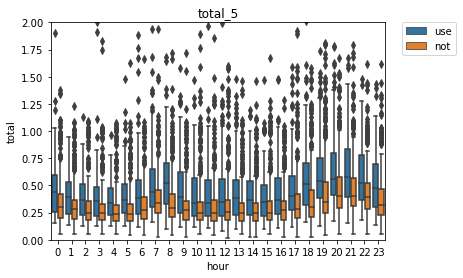

In [29]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

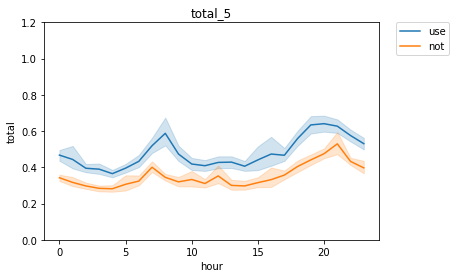

In [30]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

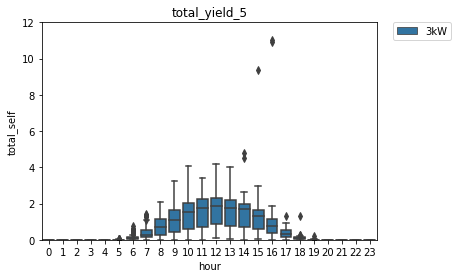

In [31]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

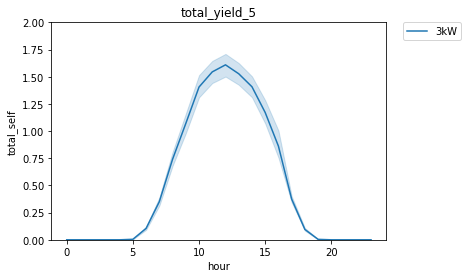

In [32]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

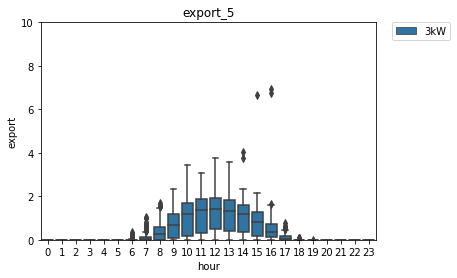

In [33]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

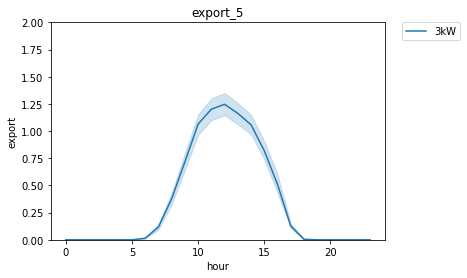

In [34]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

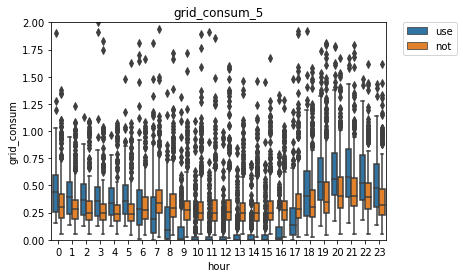

In [35]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

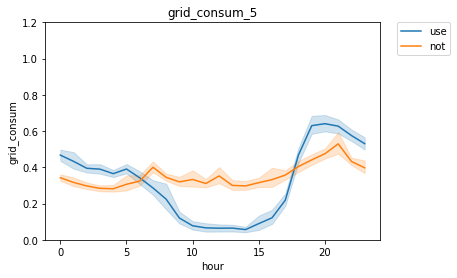

In [36]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

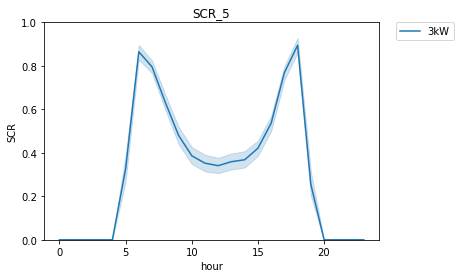

In [37]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_5')
plt.show()

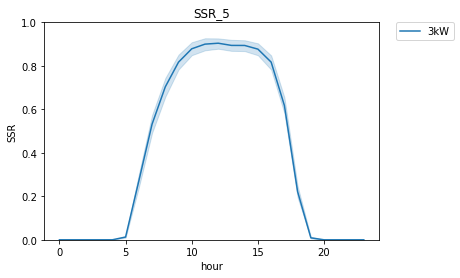

In [38]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_5')
plt.show()

<hr>

### 2021.06

In [39]:
df_all_hour_21_6 = df_all_hour[df_all_hour.ym == '2021/6']

In [40]:
# 총 전력 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   489.0  0.390653  0.528171  0.069977  0.219971  0.299988  0.420044   
     1   490.0  0.333470  0.217830  0.049988  0.192490  0.260010  0.390015   
     2   490.0  0.303225  0.204766  0.059998  0.179993  0.239990  0.349976   
     3   489.0  0.300962  0.261223  0.059998  0.170044  0.239990  0.349976   
     4   493.0  0.277211  0.176887  0.059998  0.169983  0.230011  0.320068   
     5   479.0  0.285157  0.185164  0.049988  0.169983  0.239990  0.320007   
     6   473.0  0.318646  0.201582  0.059998  0.190002  0.270020  0.400024   
     7   470.0  0.399150  0.243075  0.059998  0.250000  0.340027  0.489990   
     8   472.0  0.354491  0.334517  0.049988  0.200012  0.290009  0.429993   
     9   482.0  0.334793  0.308724  0.059998  0.160034  0.279968  0.400017   
     10  476.0  0.312586  0.316581  0.059998  0.160034  0.260010  0.369995   
     11  482.0  0.307073  0.281988  0.059998  0.162506  0.250000  0.367508   
     12  480.0  0.323501  0.467802  0.059998  0.169983  0.260010  0.369995   
     13  482.0  0.320196  0.323722  0.059998  0.159973  0.250000  0.370056   
     14  486.0  0.330865  0.426177  0.059998  0.170021  0.260010  0.359985   
     15  487.0  0.335337  0.423998  0.049988  0.179993  0.260010  0.380005   
     16  482.0  0.319273  0.230397  0.059998  0.179993  0.270020  0.380005   
     17  483.0  0.335943  0.250184  0.059998  0.179993  0.280029  0.404968   
     18  482.0  0.407655  0.353114  0.059998  0.190002  0.299988  0.479980   
     19  485.0  0.466866  0.670702  0.059998  0.210022  0.330017  0.510010   
     20  486.0  0.505228  0.552238  0.079987  0.270020  0.399994  0.570007   
     21  488.0  0.499161  0.338555  0.119995  0.309998  0.410034  0.599983   
     22  490.0  0.462734  0.308486  0.089996  0.280029  0.380005  0.559998   
     23  486.0  0.410659  0.321768  0.089996  0.239990  0.329971  0.470032   
use  0   235.0  0.444188  0.219597  0.159973  0.250000  0.410034  0.559937   
     1   234.0  0.417904  0.234733  0.139984  0.239990  0.389984  0.523773   
     2   233.0  0.375489  0.157473  0.140015  0.250000  0.359985  0.477966   
     3   234.0  0.368891  0.178615  0.140015  0.239990  0.329956  0.470078   
     4   229.0  0.345298  0.150435  0.139984  0.219971  0.309998  0.449951   
     5   226.0  0.355439  0.154431  0.140015  0.239990  0.320007  0.429993   
     6   223.0  0.427438  0.351138  0.129944  0.235001  0.349976  0.509979   
     7   227.0  0.515852  0.331061  0.169952  0.289948  0.410034  0.674988   
     8   227.0  0.516064  0.279145  0.150024  0.320038  0.469910  0.620041   
     9   226.0  0.486744  0.509976  0.110107  0.250038  0.410049  0.600037   
     10  231.0  0.441022  0.368339  0.129944  0.230042  0.400024  0.554947   
     11  231.0  0.441608  0.330399  0.110046  0.224976  0.390015  0.549957   
     12  232.0  0.484218  0.410684  0.109985  0.239990  0.394989  0.622459   
     13  234.0  0.476726  0.363904  0.119934  0.262543  0.429916  0.577484   
     14  235.0  0.463923  0.413274  0.130005  0.240051  0.399963  0.520004   
     15  236.0  0.481160  0.555226  0.120026  0.257492  0.400085  0.539978   
     16  237.0  0.460825  0.299157  0.119873  0.250061  0.420044  0.549988   
     17  235.0  0.490811  0.279517  0.149872  0.289993  0.420044  0.610016   
     18  237.0  0.567241  0.338607  0.160004  0.309937  0.459961  0.759918   
     19  237.0  0.614803  0.353764  0.129944  0.369995  0.539978  0.769897   
     20  238.0  0.633494  0.296520  0.170013  0.410034  0.569946  0.817505   
     21  237.0  0.593860  0.249358  0.188599  0.400024  0.559998  0.740051   
     22  237.0  0.580399  0.349735  0.179993  0.359985  0.500000  0.729980   
     23  232.0  0.515755  0.280780  0.140015  0.279999  0.470001  0.650024   

               max  
type 시간             
not  0   10.599976  
     1    1.390015  
     2    1.979980  
   

In [41]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   226.0  0.010971  0.014136  0.000000  0.000000  0.010010   
         6   223.0  0.141764  0.104782  0.000000  0.070068  0.130005   
         7   227.0  0.406575  0.246187  0.000000  0.240051  0.380005   
         8   227.0  0.755598  0.418967  0.000000  0.444977  0.710022   
         9   226.0  1.127642  0.559957  0.030029  0.709991  1.130005   
         10  231.0  1.383902  0.618567  0.070007  0.894958  1.489990   
         11  231.0  1.508557  0.657841  0.140015  1.054962  1.599976   
         12  232.0  1.602103  0.893808  0.000000  1.119995  1.745026   
         13  234.0  1.529691  0.847248  0.099976  1.039948  1.640015   
         14  235.0  1.455662  1.025041  0.010010  0.929932  1.510010   
         15  236.0  1.144836  0.599384  0.019897  0.767517  1.214996   
         16  237.0  0.807855  0.399851  0.000000  0.530029  0.829956   
         17  235.0  0.423181  0.220705  0.000000  0.270020  0.390015   
         18  237.0  0.151002  0.146233  0.000000  0.089966  0.140015   
         19  237.0  0.015209  0.047451  0.000000  0.000000  0.010010   
         20  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.017426   0.079956  
         6   0.190063   0.760010  
         7   0.535034   1.189941  
         8   1.050049   1.940063  
         9   1.560028   2.510010  
         10  1.854980   3.180420  
         11  2.010010   4.231323  
         12  2.052521   8.669922  
         13  1.989990   9.620117  
         14  1.859985  11.100037  
         15  1.489990   5.750000  
         16  1.050049   2.470093  
         17  0.589996   1.599365  
         18  0.180054   1.599243  
         19  0.020020   0.704712  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [42]:
# 총 전력 수출량
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   226.0  0.000044  0.000666  0.0  0.000000  0.000000  0.000000   
         6   223.0  0.017139  0.042726  0.0  0.000000  0.000000  0.019958   
         7   227.0  0.136079  0.172644  0.0  0.000000  0.080017  0.189972   
         8   227.0  0.385336  0.371831  0.0  0.049988  0.319946  0.595032   
         9   226.0  0.734154  0.537909  0.0  0.235031  0.779999  1.177490   
         10  231.0  0.986762  0.607245  0.0  0.445007  1.089966  1.479980   
         11  231.0  1.103757  0.635143  0.0  0.575043  1.209961  1.599976   
         12  232.0  1.170464  0.796092  0.0  0.607529  1.214981  1.640015   
         13  234.0  1.105353  0.764707  0.0  0.532532  1.130005  1.617523   
         14  235.0  1.038966  0.857419  0.0  0.500000  1.049988  1.459961   
         15  236.0  0.746977  0.515579  0.0  0.320007  0.750000  1.100006   
         16  237.0  0.442606  0.369699  0.0  0.140015  0.399963  0.649963   
         17  235.0  0.132811  0.156903  0.0  0.010010  0.070068  0.199982   
         18  237.0  0.007426  0.019371  0.0  0.000000  0.000000  0.010010   
         19  237.0  0.000549  0.007829  0.0  0.000000  0.000000  0.000000   
         20  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  232.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   0.849976  
         8   1.589966  
         9   2.109985  
         10  2.360046  
         11  2.300049  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  3.030029  
         16  2.080017  
         17  0.619995  
         18  0.120178  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [43]:
# 총 그리드 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   489.0  0.390653  0.528171  0.069977  0.219971  0.299988  0.420044   
     1   490.0  0.333470  0.217830  0.049988  0.192490  0.260010  0.390015   
     2   490.0  0.303225  0.204766  0.059998  0.179993  0.239990  0.349976   
     3   489.0  0.300962  0.261223  0.059998  0.170044  0.239990  0.349976   
     4   493.0  0.277211  0.176887  0.059998  0.169983  0.230011  0.320068   
     5   479.0  0.285157  0.185164  0.049988  0.169983  0.239990  0.320007   
     6   473.0  0.318646  0.201582  0.059998  0.190002  0.270020  0.400024   
     7   470.0  0.399150  0.243075  0.059998  0.250000  0.340027  0.489990   
     8   472.0  0.354491  0.334517  0.049988  0.200012  0.290009  0.429993   
     9   482.0  0.334793  0.308724  0.059998  0.160034  0.279968  0.400017   
     10  476.0  0.312586  0.316581  0.059998  0.160034  0.260010  0.369995   
     11  482.0  0.307073  0.281988  0.059998  0.162506  0.250000  0.367508   
     12  480.0  0.323501  0.467802  0.059998  0.169983  0.260010  0.369995   
     13  482.0  0.320196  0.323722  0.059998  0.159973  0.250000  0.370056   
     14  486.0  0.330865  0.426177  0.059998  0.170021  0.260010  0.359985   
     15  487.0  0.335337  0.423998  0.049988  0.179993  0.260010  0.380005   
     16  482.0  0.319273  0.230397  0.059998  0.179993  0.270020  0.380005   
     17  483.0  0.335943  0.250184  0.059998  0.179993  0.280029  0.404968   
     18  482.0  0.407655  0.353114  0.059998  0.190002  0.299988  0.479980   
     19  485.0  0.466866  0.670702  0.059998  0.210022  0.330017  0.510010   
     20  486.0  0.505228  0.552238  0.079987  0.270020  0.399994  0.570007   
     21  488.0  0.499161  0.338555  0.119995  0.309998  0.410034  0.599983   
     22  490.0  0.462734  0.308486  0.089996  0.280029  0.380005  0.559998   
     23  486.0  0.410659  0.321768  0.089996  0.239990  0.329971  0.470032   
use  0   235.0  0.444700  0.219901  0.159973  0.250000  0.410034  0.559937   
     1   234.0  0.418418  0.235078  0.139984  0.239990  0.389984  0.528732   
     2   233.0  0.375777  0.157723  0.140015  0.250000  0.359985  0.479980   
     3   234.0  0.368891  0.178615  0.140015  0.239990  0.329956  0.470078   
     4   229.0  0.345298  0.150435  0.139984  0.219971  0.309998  0.449951   
     5   226.0  0.344512  0.153263  0.130005  0.229980  0.309998  0.409996   
     6   223.0  0.302813  0.356730  0.010010  0.110031  0.210022  0.380005   
     7   227.0  0.245356  0.303935  0.000000  0.030029  0.140015  0.345032   
     8   227.0  0.145802  0.218959  0.000000  0.000000  0.050018  0.205002   
     9   226.0  0.093256  0.392861  0.000000  0.000000  0.010010  0.059998   
     10  231.0  0.043882  0.190258  0.000000  0.000000  0.000000  0.020020   
     11  231.0  0.036808  0.120370  0.000000  0.000000  0.000000  0.013489   
     12  232.0  0.052579  0.174280  0.000000  0.000000  0.000000  0.029984   
     13  234.0  0.052388  0.140361  0.000000  0.000000  0.000000  0.030029   
     14  235.0  0.047227  0.127223  0.000000  0.000000  0.000000  0.030029   
     15  236.0  0.083301  0.317005  0.000000  0.000000  0.000000  0.040016   
     16  237.0  0.095575  0.178218  0.000000  0.000000  0.020020  0.100037   
     17  235.0  0.200441  0.234263  0.000000  0.025024  0.130005  0.270020   
     18  237.0  0.423665  0.319195  0.029968  0.170013  0.330017  0.589996   
     19  237.0  0.600143  0.350806  0.129944  0.359985  0.530029  0.739990   
     20  238.0  0.633999  0.296419  0.170013  0.410034  0.569977  0.817505   
     21  237.0  0.597560  0.256834  0.188599  0.400024  0.559998  0.740051   
     22  237.0  0.578783  0.322541  0.179993  0.359985  0.500000  0.729980   
     23  232.0  0.520168  0.309678  0.140015  0.279999  0.470001  0.650024   

               max  
type 시간             
not  0   10.599976  
     1    1.390015  
     2    1.979980  
   

In [44]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   226.0  0.587757  0.492704  0.000000  0.000000  1.000000   
         6   223.0  0.877719  0.244992  0.000000  0.849817  1.000000   
         7   227.0  0.759725  0.231687  0.000000  0.581452  0.792492   
         8   227.0  0.605278  0.281523  0.000000  0.346731  0.583344   
         9   226.0  0.454563  0.285201  0.090245  0.199984  0.381196   
         10  231.0  0.369423  0.259763  0.074089  0.155156  0.301644   
         11  231.0  0.340747  0.247256  0.045662  0.138724  0.276887   
         12  232.0  0.345741  0.249892  0.000000  0.147541  0.276705   
         13  234.0  0.353900  0.246423  0.058830  0.167036  0.286410   
         14  235.0  0.361069  0.241150  0.075359  0.167266  0.285748   
         15  236.0  0.435018  0.269419  0.087900  0.211106  0.363387   
         16  237.0  0.537576  0.276409  0.000000  0.290703  0.525799   
         17  235.0  0.754733  0.237839  0.000000  0.594606  0.824992   
         18  237.0  0.930527  0.196321  0.000000  0.937452  1.000000   
         19  237.0  0.619952  0.486137  0.000000  0.000000  1.000000   
         20  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   1.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.859682  1.0  
         9   0.681497  1.0  
         10  0.532704  1.0  
         11  0.454761  1.0  
         12  0.479189  1.0  
         13  0.465880  1.0  
         14  0.499945  1.0  
         15  0.606995  1.0  
         16  0.741928  1.0  
         17  0.964922  1.0  
         18  1.000000  1.0  
         19  1.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [45]:
# SSR(자가공급률)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   226.0  0.032634  0.040894  0.000000  0.000000  0.020853   
         6   223.0  0.367204  0.241098  0.000000  0.168921  0.333333   
         7   227.0  0.627083  0.290516  0.000000  0.360676  0.673746   
         8   227.0  0.780688  0.255326  0.000000  0.631896  0.901401   
         9   226.0  0.885308  0.193406  0.060051  0.878018  0.976776   
         10  231.0  0.939579  0.143263  0.166667  0.951150  1.000000   
         11  231.0  0.945023  0.134966  0.095248  0.970988  1.000000   
         12  232.0  0.929558  0.158434  0.000000  0.945027  1.000000   
         13  234.0  0.924210  0.151885  0.130077  0.946851  1.000000   
         14  235.0  0.934184  0.142917  0.020426  0.938177  1.000000   
         15  236.0  0.895546  0.197927  0.024414  0.911536  1.000000   
         16  237.0  0.846891  0.231811  0.000000  0.776404  0.957403   
         17  235.0  0.668449  0.264816  0.000000  0.471001  0.727248   
         18  237.0  0.310449  0.212820  0.000000  0.142857  0.266743   
         19  237.0  0.029570  0.047234  0.000000  0.000000  0.016145   
         20  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.046430  0.210662  
         6   0.558995  0.947318  
         7   0.896138  1.000000  
         8   1.000000  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.897127  1.000000  
         18  0.463462  0.903533  
         19  0.043519  0.501673  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

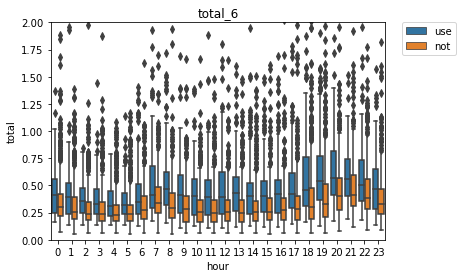

In [46]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

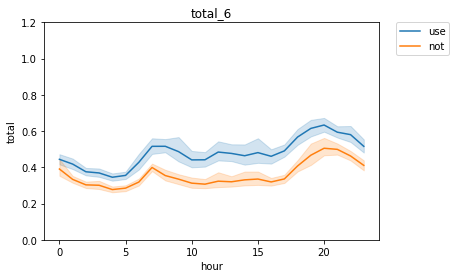

In [47]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

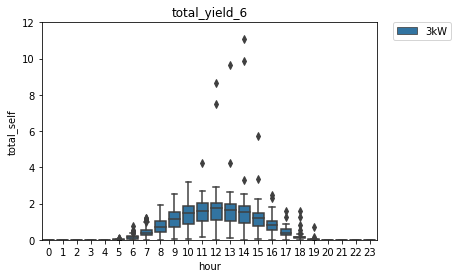

In [48]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

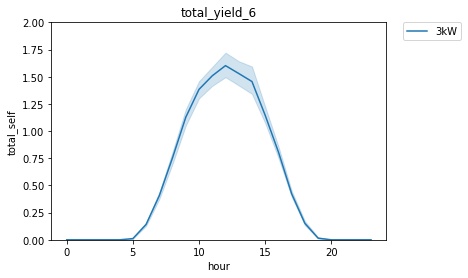

In [49]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

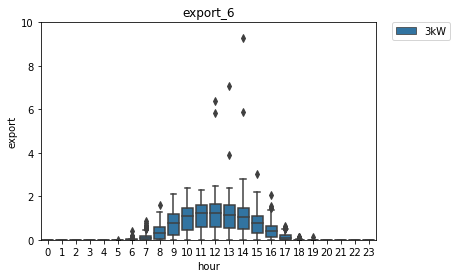

In [50]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

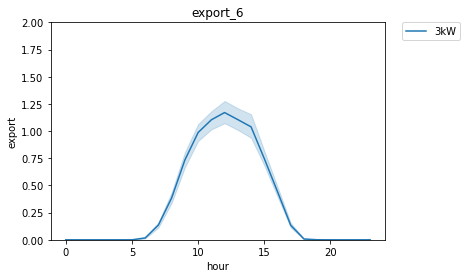

In [51]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

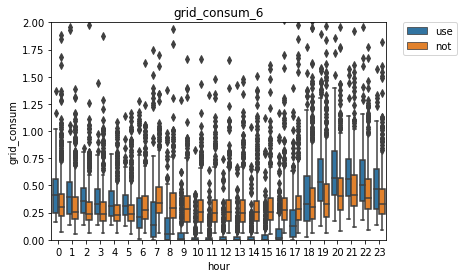

In [52]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

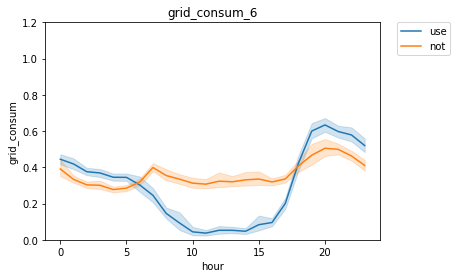

In [53]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

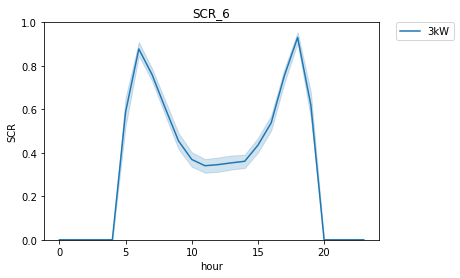

In [54]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_6')
plt.show()

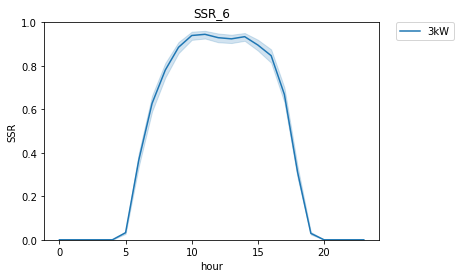

In [55]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_6')
plt.show()

<hr>

### 2021.07

In [56]:
df_all_hour_21_7 = df_all_hour[df_all_hour.ym == '2021/7']

In [57]:
# 총 전력 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.457966  0.284324  0.049988  0.235016  0.380005  0.609985   
     1   530.0  0.423206  0.329400  0.059998  0.220009  0.339996  0.559937   
     2   530.0  0.377777  0.240066  0.059998  0.200012  0.319946  0.507507   
     3   531.0  0.346614  0.221970  0.059998  0.190002  0.300049  0.459961   
     4   530.0  0.317051  0.194629  0.059998  0.180054  0.279938  0.390015   
     5   528.0  0.308939  0.194807  0.049988  0.179993  0.250000  0.390015   
     6   533.0  0.385176  0.332072  0.059998  0.209961  0.320007  0.440063   
     7   534.0  0.459081  0.382177  0.059998  0.279968  0.380005  0.510010   
     8   532.0  0.402632  0.298798  0.059998  0.229980  0.355042  0.469971   
     9   529.0  0.400680  0.324328  0.059998  0.219971  0.329956  0.469971   
     10  529.0  0.384781  0.269721  0.049988  0.220032  0.330017  0.469971   
     11  528.0  0.461746  0.909194  0.049988  0.200012  0.339966  0.489990   
     12  526.0  0.427814  0.365155  0.049988  0.180054  0.340027  0.529999   
     13  528.0  0.456228  0.526466  0.059998  0.187469  0.334991  0.522491   
     14  526.0  0.454561  0.416799  0.059998  0.210022  0.340027  0.530029   
     15  519.0  0.461889  0.427150  0.050049  0.229980  0.339966  0.545044   
     16  522.0  0.540017  1.020013  0.049988  0.239990  0.359985  0.557465   
     17  527.0  0.580059  0.713075  0.059998  0.260010  0.390015  0.670044   
     18  526.0  0.639300  0.709804  0.059998  0.250000  0.429993  0.730072   
     19  526.0  0.623762  0.571863  0.069977  0.279968  0.440033  0.760010   
     20  530.0  0.722132  0.666691  0.059998  0.350037  0.519974  0.840073   
     21  530.0  0.684003  0.530925  0.059998  0.380005  0.539978  0.819992   
     22  532.0  0.618665  0.487605  0.070007  0.329956  0.500000  0.789932   
     23  527.0  0.519279  0.376458  0.059998  0.269989  0.419922  0.690033   
use  0   239.0  0.560128  0.361268  0.169983  0.294983  0.450012  0.719971   
     1   243.0  0.500588  0.297060  0.159973  0.270020  0.410034  0.674988   
     2   244.0  0.436176  0.207340  0.150024  0.250000  0.375031  0.619995   
     3   242.0  0.423835  0.219212  0.159973  0.230042  0.339966  0.600067   
     4   240.0  0.416345  0.219901  0.160034  0.229980  0.339966  0.599976   
     5   239.0  0.423176  0.203034  0.159973  0.239990  0.380005  0.585022   
     6   241.0  0.477647  0.488394  0.179993  0.260010  0.369873  0.619995   
     7   241.0  0.567030  0.702645  0.209961  0.309998  0.450012  0.680115   
     8   242.0  0.642923  0.752235  0.180023  0.382507  0.519989  0.720016   
     9   240.0  0.573443  0.377061  0.150024  0.339966  0.470001  0.719925   
     10  242.0  0.561843  0.350669  0.150024  0.310059  0.464966  0.710022   
     11  241.0  0.704431  0.821717  0.139893  0.320068  0.529968  0.799927   
     12  241.0  0.726944  0.563447  0.159973  0.350098  0.559937  0.879944   
     13  235.0  0.786195  0.679957  0.149902  0.370026  0.579956  0.859894   
     14  235.0  0.790177  0.656256  0.150024  0.365051  0.570068  0.924988   
     15  235.0  0.792495  0.635308  0.140015  0.350067  0.609985  1.005035   
     16  238.0  0.744308  0.593666  0.160034  0.349884  0.540039  0.957489   
     17  240.0  0.772047  0.530863  0.180023  0.380005  0.579987  1.002487   
     18  236.0  0.912062  0.641661  0.200012  0.410034  0.690002  1.262482   
     19  236.0  1.053026  0.776349  0.200012  0.470016  0.750000  1.502502   
     20  235.0  0.982060  0.658681  0.169983  0.509949  0.790039  1.265015   
     21  239.0  0.920378  0.530762  0.219971  0.525024  0.750000  1.165039   
     22  238.0  0.820930  0.519681  0.210022  0.462509  0.669983  1.000000   
     23  237.0  0.646845  0.428953  0.180054  0.380005  0.530029  0.790039   

               max  
type 시간             
not  0    2.150024  
     1    4.840027  
     2    1.969971  
   

In [58]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   239.0  0.003889  0.007004  0.0  0.000000  0.000000  0.010010   
         6   241.0  0.100184  0.089460  0.0  0.040039  0.079956  0.140015   
         7   241.0  0.332644  0.238854  0.0  0.169922  0.310059  0.459961   
         8   242.0  0.687920  0.403572  0.0  0.410034  0.654968  0.957489   
         9   240.0  1.042049  0.553939  0.0  0.707458  0.980042  1.430054   
         10  242.0  1.307220  0.618584  0.0  0.925049  1.349976  1.764923   
         11  241.0  1.474450  0.637364  0.0  1.099976  1.619995  1.979980   
         12  241.0  1.539396  0.658344  0.0  1.169922  1.580078  2.069946   
         13  235.0  1.526878  0.642254  0.0  1.155029  1.660034  1.969971   
         14  235.0  1.378970  0.666391  0.0  0.954956  1.539917  1.820068   
         15  235.0  1.170408  0.912632  0.0  0.744995  1.250000  1.489990   
         16  238.0  0.784036  0.428736  0.0  0.512512  0.784973  1.070007   
         17  240.0  0.426413  0.321899  0.0  0.239990  0.390015  0.599976   
         18  236.0  0.133799  0.077427  0.0  0.070068  0.140015  0.180054   
         19  236.0  0.014109  0.021846  0.0  0.000000  0.010010  0.020020   
         20  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.040039  
         6    0.520020  
         7    1.309937  
         8    1.760010  
         9    3.270020  
         10   3.660034  
         11   3.069946  
         12   4.169922  
         13   4.550049  
         14   5.600098  
         15  11.300049  
         16   2.819946  
         17   3.869995  
         18   0.349976  
         19   0.190063  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [59]:
# 총 전력 수출량
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   241.0  0.007345  0.028988  0.0  0.000000  0.000000  0.000000   
         7   241.0  0.079193  0.142332  0.0  0.000000  0.020020  0.090088   
         8   242.0  0.293142  0.303768  0.0  0.032501  0.239990  0.430023   
         9   240.0  0.586861  0.466267  0.0  0.170044  0.524994  0.885010   
         10  242.0  0.831787  0.572733  0.0  0.352524  0.810028  1.237503   
         11  241.0  0.919112  0.602710  0.0  0.410034  0.869995  1.410034   
         12  241.0  0.949096  0.617736  0.0  0.489990  0.900024  1.380005   
         13  235.0  0.912475  0.599361  0.0  0.409973  0.930054  1.385010   
         14  235.0  0.773052  0.602613  0.0  0.265015  0.679932  1.229980   
         15  235.0  0.606018  0.743301  0.0  0.150024  0.510010  0.950012   
         16  238.0  0.329749  0.340716  0.0  0.050049  0.235016  0.527481   
         17  240.0  0.094416  0.157101  0.0  0.000000  0.020020  0.132507   
         18  236.0  0.003769  0.012702  0.0  0.000000  0.000000  0.000000   
         19  236.0  0.000090  0.001305  0.0  0.000000  0.000000  0.000000   
         20  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.290039  
         7   0.890015  
         8   1.390015  
         9   1.680054  
         10  3.140015  
         11  2.100098  
         12  3.260010  
         13  3.359985  
         14  4.000000  
         15  8.160034  
         16  2.239990  
         17  1.410034  
         18  0.109985  
         19  0.020020  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [60]:
# 총 그리드 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.457966  0.284324  0.049988  0.235016  0.380005  0.609985   
     1   530.0  0.423206  0.329400  0.059998  0.220009  0.339996  0.559937   
     2   530.0  0.377777  0.240066  0.059998  0.200012  0.319946  0.507507   
     3   531.0  0.346614  0.221970  0.059998  0.190002  0.300049  0.459961   
     4   530.0  0.317051  0.194629  0.059998  0.180054  0.279938  0.390015   
     5   528.0  0.308939  0.194807  0.049988  0.179993  0.250000  0.390015   
     6   533.0  0.385176  0.332072  0.059998  0.209961  0.320007  0.440063   
     7   534.0  0.459081  0.382177  0.059998  0.279968  0.380005  0.510010   
     8   532.0  0.402632  0.298798  0.059998  0.229980  0.355042  0.469971   
     9   529.0  0.400680  0.324328  0.059998  0.219971  0.329956  0.469971   
     10  529.0  0.384781  0.269721  0.049988  0.220032  0.330017  0.469971   
     11  528.0  0.461746  0.909194  0.049988  0.200012  0.339966  0.489990   
     12  526.0  0.427814  0.365155  0.049988  0.180054  0.340027  0.529999   
     13  528.0  0.456228  0.526466  0.059998  0.187469  0.334991  0.522491   
     14  526.0  0.454561  0.416799  0.059998  0.210022  0.340027  0.530029   
     15  519.0  0.461889  0.427150  0.050049  0.229980  0.339966  0.545044   
     16  522.0  0.540017  1.020013  0.049988  0.239990  0.359985  0.557465   
     17  527.0  0.580059  0.713075  0.059998  0.260010  0.390015  0.670044   
     18  526.0  0.639300  0.709804  0.059998  0.250000  0.429993  0.730072   
     19  526.0  0.623762  0.571863  0.069977  0.279968  0.440033  0.760010   
     20  530.0  0.722132  0.666691  0.059998  0.350037  0.519974  0.840073   
     21  530.0  0.684003  0.530925  0.059998  0.380005  0.539978  0.819992   
     22  532.0  0.618665  0.487605  0.070007  0.329956  0.500000  0.789932   
     23  527.0  0.519279  0.376458  0.059998  0.269989  0.419922  0.690033   
use  0   239.0  0.561093  0.362694  0.169983  0.294983  0.450012  0.719971   
     1   243.0  0.500594  0.297064  0.159973  0.270020  0.410034  0.674988   
     2   244.0  0.436181  0.207348  0.150024  0.250000  0.375031  0.619995   
     3   242.0  0.423835  0.219212  0.159973  0.230042  0.339966  0.600067   
     4   240.0  0.416345  0.219901  0.160034  0.229980  0.339966  0.599976   
     5   239.0  0.419286  0.202105  0.159973  0.235016  0.380005  0.580017   
     6   241.0  0.384808  0.494076  0.039978  0.180054  0.269958  0.520020   
     7   241.0  0.313578  0.701958  0.000000  0.070007  0.210022  0.390015   
     8   242.0  0.248145  0.719957  0.000000  0.010010  0.079987  0.287491   
     9   240.0  0.118256  0.210622  0.000000  0.000000  0.020020  0.140015   
     10  242.0  0.086410  0.183715  0.000000  0.000000  0.000000  0.079956   
     11  241.0  0.149093  0.579261  0.000000  0.000000  0.000000  0.099976   
     12  241.0  0.136644  0.303137  0.000000  0.000000  0.000000  0.140015   
     13  235.0  0.171792  0.389360  0.000000  0.000000  0.000000  0.124969   
     14  235.0  0.184259  0.358045  0.000000  0.000000  0.010010  0.200012   
     15  235.0  0.228106  0.408095  0.000000  0.000000  0.039917  0.294952   
     16  238.0  0.290021  0.490782  0.000000  0.000000  0.085022  0.377502   
     17  240.0  0.440049  0.463895  0.000000  0.090073  0.255005  0.707458   
     18  236.0  0.782032  0.635715  0.050049  0.290031  0.579987  1.082458   
     19  236.0  1.039007  0.778113  0.179993  0.457474  0.734985  1.487488   
     20  235.0  0.982065  0.658679  0.169983  0.509949  0.790039  1.265015   
     21  239.0  0.920383  0.530761  0.219971  0.525024  0.750000  1.165039   
     22  238.0  0.820935  0.519680  0.210022  0.462509  0.669983  1.000000   
     23  237.0  0.646850  0.428954  0.180054  0.380005  0.530029  0.790039   

               max  
type 시간             
not  0    2.150024  
     1    4.840027  
     2    1.969971  
   

In [61]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   239.0  0.297071  0.457927  0.0  0.000000  0.000000  1.000000  1.0
         6   241.0  0.878693  0.295359  0.0  0.942645  1.000000  1.000000  1.0
         7   241.0  0.792752  0.262961  0.0  0.692332  0.884977  1.000000  1.0
         8   242.0  0.637201  0.271532  0.0  0.440975  0.623846  0.894879  1.0
         9   240.0  0.499444  0.279974  0.0  0.270761  0.435597  0.729224  1.0
         10  242.0  0.433111  0.270998  0.0  0.208700  0.341795  0.640003  1.0
         11  241.0  0.436086  0.280276  0.0  0.214278  0.339550  0.632460  1.0
         12  241.0  0.435731  0.267720  0.0  0.222222  0.353762  0.598424  1.0
         13  235.0  0.444379  0.272741  0.0  0.224177  0.352380  0.659333  1.0
         14  235.0  0.502969  0.292830  0.0  0.251304  0.402410  0.750868  1.0
         15  235.0  0.561443  0.290188  0.0  0.311248  0.544632  0.800846  1.0
         16  238.0  0.650469  0.272803  0.0  0.413321  0.666650  0.902333  1.0
         17  240.0  0.824659  0.227334  0.0  0.698146  0.920800  1.000000  1.0
         18  236.0  0.936546  0.213626  0.0  1.000000  1.000000  1.000000  1.0
         19  236.0  0.634887  0.481815  0.0  0.000000  1.000000  1.000000  1.0
         20  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [62]:
# SSR(자가공급률)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   239.0  0.009872  0.019207  0.0  0.000000  0.000000  0.014301   
         6   241.0  0.240472  0.200366  0.0  0.090825  0.187679  0.363838   
         7   241.0  0.542205  0.303766  0.0  0.298668  0.588963  0.809302   
         8   242.0  0.724611  0.301286  0.0  0.552686  0.831326  0.977252   
         9   240.0  0.832922  0.268858  0.0  0.808089  0.959203  1.000000   
         10  242.0  0.878905  0.235942  0.0  0.892776  1.000000  1.000000   
         11  241.0  0.881381  0.222534  0.0  0.886790  1.000000  1.000000   
         12  241.0  0.881035  0.215551  0.0  0.832455  1.000000  1.000000   
         13  235.0  0.876532  0.223591  0.0  0.854516  1.000000  1.000000   
         14  235.0  0.848188  0.240706  0.0  0.770613  0.981404  1.000000   
         15  235.0  0.803456  0.268367  0.0  0.678508  0.952897  1.000000   
         16  238.0  0.730026  0.294104  0.0  0.546018  0.860865  1.000000   
         17  240.0  0.533016  0.298417  0.0  0.276477  0.516320  0.780961   
         18  236.0  0.208557  0.179035  0.0  0.078243  0.147991  0.301003   
         19  236.0  0.022227  0.039967  0.0  0.000000  0.008716  0.025024   
         20  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.103535  
         6   0.846136  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.807512  
         19  0.320820  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

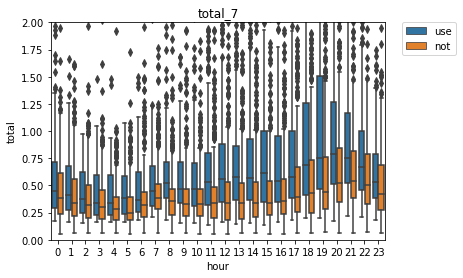

In [63]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

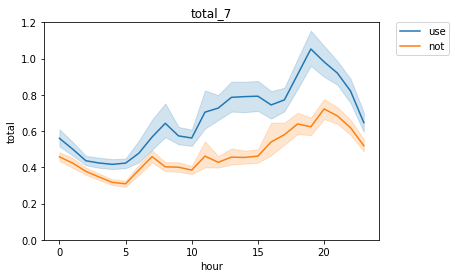

In [64]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

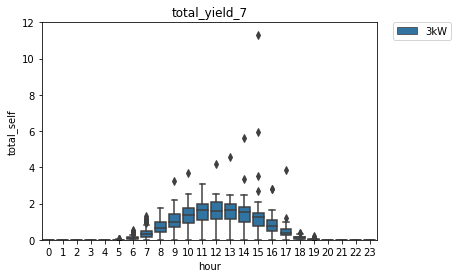

In [65]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

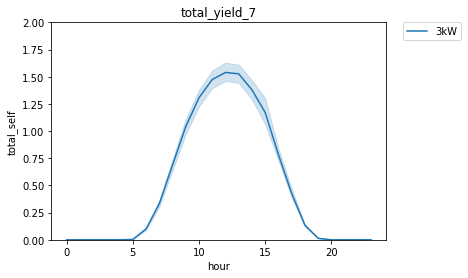

In [66]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

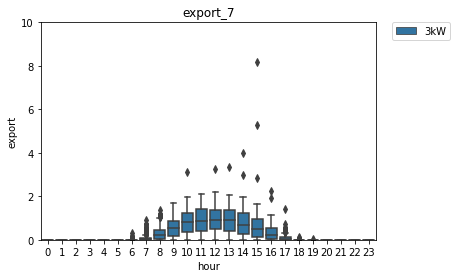

In [67]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

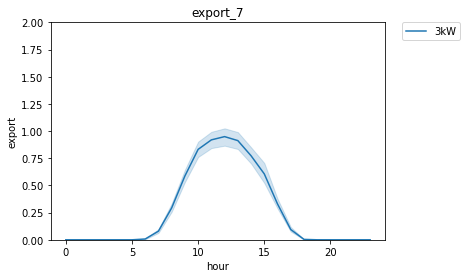

In [68]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

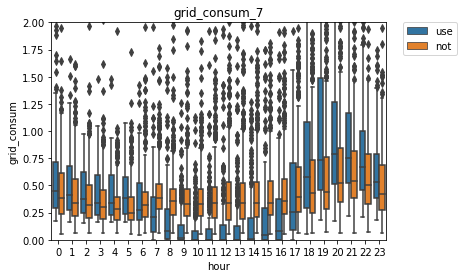

In [69]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

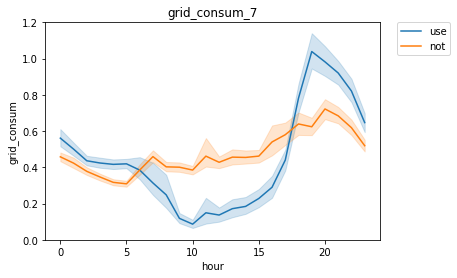

In [70]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

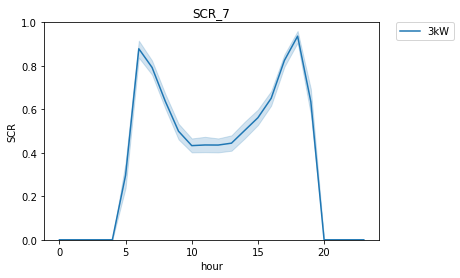

In [71]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_7')
plt.show()

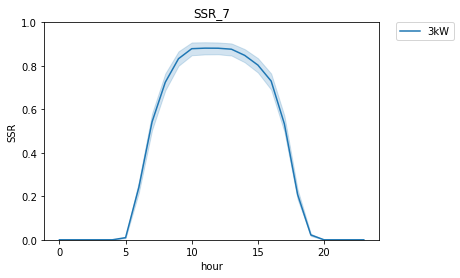

In [72]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_7')
plt.show()

<hr>

### 2021.08

In [73]:
df_all_hour_21_8 = df_all_hour[df_all_hour.ym == '2021/8']

In [74]:
# 총 전력 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.456194  0.534713  0.079956  0.219971  0.359985  0.560059   
     1   539.0  0.398076  0.269208  0.070007  0.200043  0.320068  0.530029   
     2   533.0  0.356849  0.224887  0.059998  0.189941  0.309937  0.479980   
     3   532.0  0.329267  0.206660  0.059998  0.170044  0.280029  0.420044   
     4   534.0  0.317208  0.210917  0.059998  0.169983  0.269958  0.400024   
     5   535.0  0.306766  0.270120  0.049988  0.160034  0.250000  0.390015   
     6   533.0  0.341407  0.263417  0.049988  0.190063  0.289917  0.419922   
     7   533.0  0.430338  0.617187  0.059998  0.230042  0.330078  0.459961   
     8   538.0  0.405279  0.361871  0.049988  0.219971  0.330078  0.479980   
     9   532.0  0.376613  0.299670  0.040039  0.209961  0.335022  0.459961   
     10  536.0  0.412109  0.834104  0.050018  0.217499  0.329956  0.469971   
     11  541.0  0.414378  0.415371  0.049988  0.180054  0.320068  0.479980   
     12  532.0  0.429400  0.413429  0.039978  0.187469  0.320068  0.492493   
     13  536.0  0.461087  0.814662  0.039978  0.190002  0.339966  0.510010   
     14  533.0  0.465305  0.847706  0.039978  0.199951  0.329956  0.469971   
     15  535.0  0.426170  0.400213  0.049988  0.209961  0.330017  0.484985   
     16  537.0  0.468026  0.581578  0.039978  0.229980  0.350098  0.529907   
     17  532.0  0.490733  0.495837  0.059998  0.219971  0.344971  0.579956   
     18  529.0  0.548806  0.615660  0.049988  0.230042  0.380005  0.609985   
     19  536.0  0.606013  0.525972  0.059998  0.260010  0.450073  0.750000   
     20  526.0  0.665035  0.595762  0.069946  0.329956  0.479980  0.760010   
     21  533.0  0.676943  0.798995  0.070007  0.339996  0.500000  0.760010   
     22  531.0  0.550510  0.444134  0.070007  0.280029  0.449951  0.670105   
     23  530.0  0.474530  0.358716  0.079956  0.239990  0.389999  0.609985   
use  0   245.0  0.570553  0.355499  0.160034  0.329956  0.449951  0.720093   
     1   245.0  0.548600  0.371615  0.169983  0.309998  0.430054  0.680176   
     2   244.0  0.479680  0.266635  0.160034  0.290039  0.410034  0.619995   
     3   245.0  0.449029  0.255882  0.159973  0.270020  0.380005  0.579834   
     4   244.0  0.423310  0.207044  0.179993  0.250000  0.364990  0.579987   
     5   241.0  0.444942  0.275633  0.170044  0.239990  0.369995  0.590088   
     6   242.0  0.462932  0.253168  0.150024  0.260010  0.390015  0.620117   
     7   237.0  0.530639  0.333978  0.190063  0.300049  0.420044  0.659912   
     8   241.0  0.641254  0.475455  0.160034  0.359985  0.489990  0.780029   
     9   241.0  0.599134  0.395354  0.150024  0.339966  0.480225  0.739868   
     10  242.0  0.577192  0.404326  0.150024  0.290039  0.450134  0.707581   
     11  238.0  0.620449  0.427963  0.160034  0.319946  0.480042  0.817490   
     12  235.0  0.709507  0.539896  0.144958  0.335022  0.540039  0.879944   
     13  238.0  0.705283  0.498918  0.160034  0.362579  0.534912  0.887436   
     14  239.0  0.672772  0.542199  0.159912  0.330048  0.510010  0.785095   
     15  239.0  0.701330  0.958840  0.139893  0.325012  0.489990  0.795013   
     16  242.0  0.726200  0.614934  0.149963  0.379883  0.510071  0.867401   
     17  242.0  0.825019  0.598647  0.180054  0.430054  0.609894  1.059998   
     18  241.0  0.868864  0.547019  0.219910  0.469971  0.650024  1.189941   
     19  245.0  0.915208  0.586936  0.179993  0.510010  0.710083  1.229980   
     20  245.0  0.868456  0.522765  0.250000  0.520020  0.699951  1.110107   
     21  245.0  0.818529  0.444385  0.169983  0.520020  0.699951  1.069824   
     22  242.0  0.767972  0.442436  0.180054  0.469971  0.639984  1.009979   
     23  246.0  0.673539  0.426148  0.169983  0.402496  0.540009  0.817474   

               max  
type 시간             
not  0   10.520020  
     1    2.330078  
     2    2.070068  
   

In [75]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   241.0  0.001874  0.025258  0.0  0.000000  0.000000  0.000000   
         6   242.0  0.044465  0.052553  0.0  0.010010  0.034912  0.060059   
         7   237.0  0.241608  0.193129  0.0  0.100098  0.209961  0.340088   
         8   241.0  0.537001  0.387270  0.0  0.209961  0.469971  0.790039   
         9   241.0  0.858601  0.559900  0.0  0.360107  0.840088  1.329956   
         10  242.0  1.075498  0.640295  0.0  0.502502  1.119995  1.620117   
         11  238.0  1.202812  0.663393  0.0  0.669952  1.179993  1.717499   
         12  235.0  1.261169  0.679751  0.0  0.660034  1.329956  1.809998   
         13  238.0  1.234160  0.681155  0.0  0.670044  1.299988  1.790039   
         14  239.0  1.088604  0.621675  0.0  0.600098  1.170166  1.595032   
         15  239.0  0.909926  0.633992  0.0  0.454956  0.880127  1.320068   
         16  242.0  0.633776  0.646710  0.0  0.280029  0.559875  0.879974   
         17  242.0  0.335899  0.610667  0.0  0.150024  0.250000  0.399902   
         18  241.0  0.071082  0.078642  0.0  0.020020  0.050049  0.109863   
         19  245.0  0.002939  0.013041  0.0  0.000000  0.000000  0.000000   
         20  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.391602  
         6   0.391602  
         7   1.030029  
         8   1.719971  
         9   2.750000  
         10  2.389893  
         11  2.469971  
         12  2.390015  
         13  3.589966  
         14  2.929932  
         15  6.550049  
         16  8.569946  
         17  9.150024  
         18  0.819946  
         19  0.130005  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [76]:
# 총 전력 수출량
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   242.0  0.001571  0.006697  0.0  0.000000  0.000000  0.000000   
         7   237.0  0.048478  0.093877  0.0  0.000000  0.000000  0.069946   
         8   241.0  0.209916  0.269546  0.0  0.000000  0.090088  0.329956   
         9   241.0  0.467264  0.471453  0.0  0.020020  0.280029  0.840088   
         10  242.0  0.650743  0.569294  0.0  0.062531  0.554993  1.149902   
         11  238.0  0.731957  0.598985  0.0  0.154999  0.645020  1.260010   
         12  235.0  0.749541  0.604497  0.0  0.169983  0.650024  1.265015   
         13  238.0  0.713702  0.585706  0.0  0.160034  0.625000  1.175018   
         14  239.0  0.615525  0.520892  0.0  0.109985  0.559998  1.014954   
         15  239.0  0.452201  0.432541  0.0  0.050049  0.339966  0.784943   
         16  242.0  0.230538  0.334671  0.0  0.010010  0.100037  0.369995   
         17  242.0  0.073433  0.404906  0.0  0.000000  0.009949  0.049973   
         18  241.0  0.002407  0.027895  0.0  0.000000  0.000000  0.000000   
         19  245.0  0.000078  0.000860  0.0  0.000000  0.000000  0.000000   
         20  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.599976  
         8   1.250000  
         9   2.060059  
         10  1.899902  
         11  2.059937  
         12  2.109985  
         13  2.709961  
         14  1.939941  
         15  1.650024  
         16  3.589966  
         17  6.169922  
         18  0.429932  
         19  0.010010  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [77]:
# 총 그리드 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.456194  0.534713  0.079956  0.219971  0.359985  0.560059   
     1   539.0  0.398076  0.269208  0.070007  0.200043  0.320068  0.530029   
     2   533.0  0.356849  0.224887  0.059998  0.189941  0.309937  0.479980   
     3   532.0  0.329267  0.206660  0.059998  0.170044  0.280029  0.420044   
     4   534.0  0.317208  0.210917  0.059998  0.169983  0.269958  0.400024   
     5   535.0  0.306766  0.270120  0.049988  0.160034  0.250000  0.390015   
     6   533.0  0.341407  0.263417  0.049988  0.190063  0.289917  0.419922   
     7   533.0  0.430338  0.617187  0.059998  0.230042  0.330078  0.459961   
     8   538.0  0.405279  0.361871  0.049988  0.219971  0.330078  0.479980   
     9   532.0  0.376613  0.299670  0.040039  0.209961  0.335022  0.459961   
     10  536.0  0.412109  0.834104  0.050018  0.217499  0.329956  0.469971   
     11  541.0  0.414378  0.415371  0.049988  0.180054  0.320068  0.479980   
     12  532.0  0.429400  0.413429  0.039978  0.187469  0.320068  0.492493   
     13  536.0  0.461087  0.814662  0.039978  0.190002  0.339966  0.510010   
     14  533.0  0.465305  0.847706  0.039978  0.199951  0.329956  0.469971   
     15  535.0  0.426170  0.400213  0.049988  0.209961  0.330017  0.484985   
     16  537.0  0.468026  0.581578  0.039978  0.229980  0.350098  0.529907   
     17  532.0  0.490733  0.495837  0.059998  0.219971  0.344971  0.579956   
     18  529.0  0.548806  0.615660  0.049988  0.230042  0.380005  0.609985   
     19  536.0  0.606013  0.525972  0.059998  0.260010  0.450073  0.750000   
     20  526.0  0.665035  0.595762  0.069946  0.329956  0.479980  0.760010   
     21  533.0  0.676943  0.798995  0.070007  0.339996  0.500000  0.760010   
     22  531.0  0.550510  0.444134  0.070007  0.280029  0.449951  0.670105   
     23  530.0  0.474530  0.358716  0.079956  0.239990  0.389999  0.609985   
use  0   245.0  0.570553  0.355499  0.160034  0.329956  0.449951  0.720093   
     1   245.0  0.548600  0.371615  0.169983  0.309998  0.430054  0.680176   
     2   244.0  0.479680  0.266635  0.160034  0.290039  0.410034  0.619995   
     3   245.0  0.449029  0.255882  0.159973  0.270020  0.380005  0.579834   
     4   244.0  0.423310  0.207044  0.179993  0.250000  0.364990  0.579987   
     5   241.0  0.443068  0.273164  0.170044  0.239990  0.369995  0.590088   
     6   242.0  0.420038  0.254331  0.079956  0.229980  0.329987  0.577454   
     7   237.0  0.337509  0.340859  0.000000  0.090027  0.239990  0.440063   
     8   241.0  0.314169  0.448433  0.000000  0.020020  0.180054  0.420044   
     9   241.0  0.207797  0.326250  0.000000  0.000000  0.040039  0.270020   
     10  242.0  0.152437  0.282510  0.000000  0.000000  0.010010  0.189941   
     11  238.0  0.149594  0.308062  0.000000  0.000000  0.020020  0.150024   
     12  235.0  0.197880  0.379756  0.000000  0.000000  0.019897  0.234985   
     13  238.0  0.184825  0.315483  0.000000  0.000000  0.030029  0.239990   
     14  239.0  0.199693  0.372244  0.000000  0.000000  0.030029  0.250000   
     15  239.0  0.243604  0.588497  0.000000  0.000000  0.080078  0.290039   
     16  242.0  0.322962  0.401920  0.000000  0.030029  0.145020  0.470154   
     17  242.0  0.562553  0.543402  0.000000  0.180054  0.390015  0.812469   
     18  241.0  0.800188  0.545730  0.110046  0.399902  0.589966  1.110107   
     19  245.0  0.912347  0.586561  0.179993  0.510010  0.710083  1.229980   
     20  245.0  0.868456  0.522765  0.250000  0.520020  0.699951  1.110107   
     21  245.0  0.818529  0.444385  0.169983  0.520020  0.699951  1.069824   
     22  242.0  0.767972  0.442436  0.180054  0.469971  0.639984  1.009979   
     23  246.0  0.673539  0.426148  0.169983  0.402496  0.540009  0.817474   

               max  
type 시간             
not  0   10.520020  
     1    2.330078  
     2    2.070068  
   

In [78]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   241.0  0.029046  0.168284  0.0  0.000000  0.000000  0.000000  1.0
         6   242.0  0.773853  0.408545  0.0  0.871246  1.000000  1.000000  1.0
         7   237.0  0.805940  0.280617  0.0  0.717507  0.931881  1.000000  1.0
         8   241.0  0.717077  0.273115  0.0  0.493659  0.739990  1.000000  1.0
         9   241.0  0.582519  0.310103  0.0  0.311632  0.552296  0.916582  1.0
         10  242.0  0.500105  0.311736  0.0  0.252136  0.392037  0.803220  1.0
         11  238.0  0.482189  0.291769  0.0  0.234503  0.425096  0.719771  1.0
         12  235.0  0.485603  0.290399  0.0  0.247924  0.439282  0.706241  1.0
         13  238.0  0.501320  0.284764  0.0  0.256868  0.468215  0.711928  1.0
         14  239.0  0.525591  0.296371  0.0  0.283402  0.481055  0.799616  1.0
         15  239.0  0.588550  0.300901  0.0  0.332095  0.578387  0.878768  1.0
         16  242.0  0.706402  0.268585  0.0  0.510781  0.759577  0.961593  1.0
         17  242.0  0.867321  0.224867  0.0  0.843247  0.962929  1.000000  1.0
         18  241.0  0.865811  0.335517  0.0  1.000000  1.000000  1.000000  1.0
         19  245.0  0.130696  0.336791  0.0  0.000000  0.000000  0.000000  1.0
         20  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [79]:
# SSR(자가공급률)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   241.0  0.001979  0.024791  0.0  0.000000  0.000000  0.000000   
         6   242.0  0.109208  0.122804  0.0  0.015762  0.074411  0.153168   
         7   237.0  0.443606  0.300891  0.0  0.170884  0.418003  0.711921   
         8   241.0  0.619693  0.326431  0.0  0.310322  0.673005  0.928758   
         9   241.0  0.742076  0.310736  0.0  0.528367  0.909326  1.000000   
         10  242.0  0.811469  0.283066  0.0  0.709789  0.967527  1.000000   
         11  238.0  0.833898  0.265546  0.0  0.781689  0.965770  1.000000   
         12  235.0  0.819579  0.266779  0.0  0.725059  0.961502  1.000000   
         13  238.0  0.813354  0.260258  0.0  0.724541  0.934920  1.000000   
         14  239.0  0.788273  0.287907  0.0  0.700174  0.937436  1.000000   
         15  239.0  0.752516  0.284509  0.0  0.626916  0.838748  1.000000   
         16  242.0  0.647106  0.304215  0.0  0.418234  0.733360  0.909087   
         17  242.0  0.402062  0.268493  0.0  0.171850  0.388878  0.615947   
         18  241.0  0.105734  0.109715  0.0  0.021293  0.076995  0.153803   
         19  245.0  0.003380  0.013544  0.0  0.000000  0.000000  0.000000   
         20  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.619186  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.684227  
         19  0.124992  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

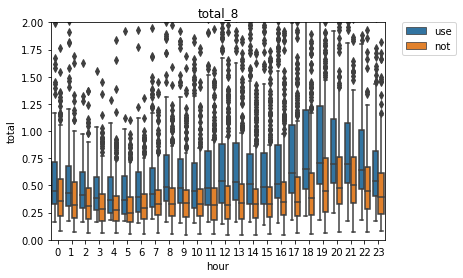

In [80]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

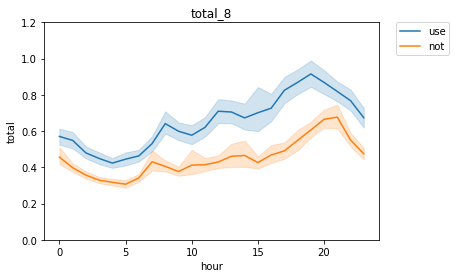

In [81]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

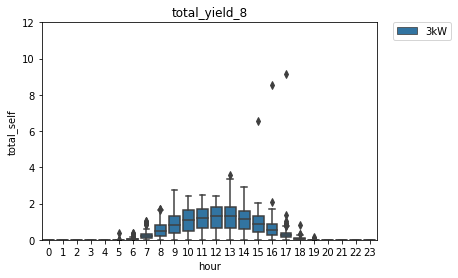

In [82]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

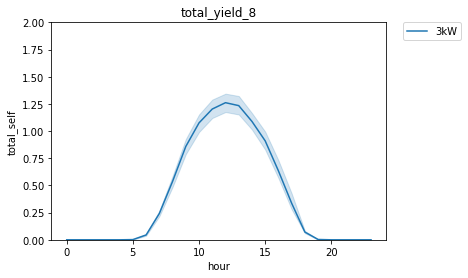

In [83]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

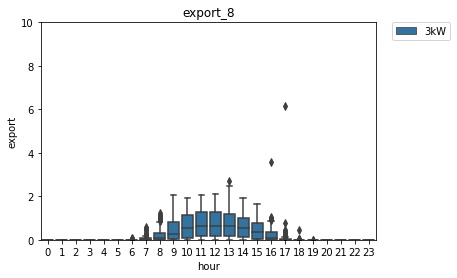

In [84]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

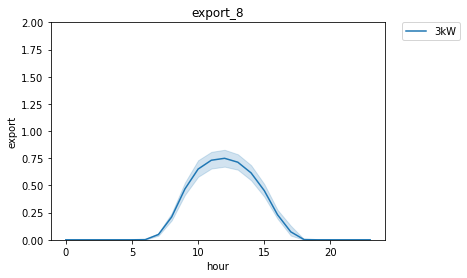

In [85]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

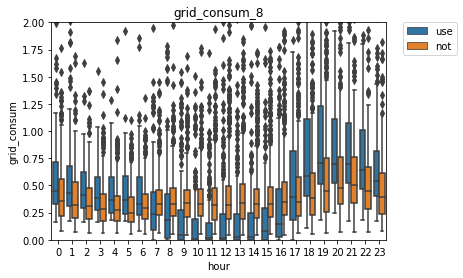

In [86]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

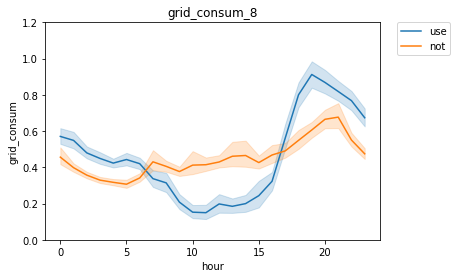

In [87]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

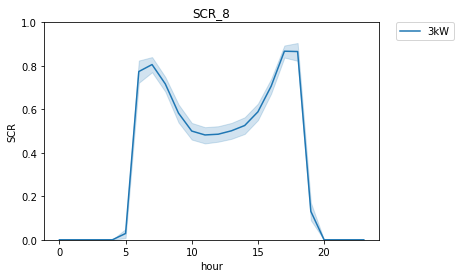

In [88]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_8')
plt.show()

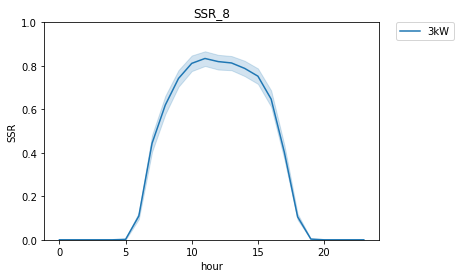

In [89]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_8')
plt.show()

<hr>

### 2021.09

In [90]:
df_all_hour_21_9 = df_all_hour[df_all_hour.ym == '2021/9']

In [91]:
# 총 전력 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   527.0  0.394874  0.594487  0.080017  0.205017  0.300049  0.424988   
     1   530.0  0.341004  0.260027  0.059998  0.190063  0.280029  0.379883   
     2   530.0  0.314795  0.211493  0.059998  0.179932  0.264954  0.359985   
     3   532.0  0.302749  0.202000  0.049988  0.170044  0.260010  0.339966   
     4   529.0  0.290318  0.186799  0.040039  0.170044  0.250000  0.340088   
     5   533.0  0.285387  0.183867  0.049927  0.170044  0.239990  0.340088   
     6   527.0  0.323333  0.235050  0.059998  0.190063  0.279907  0.379883   
     7   527.0  0.401255  0.367659  0.049988  0.239990  0.320068  0.449951   
     8   529.0  0.379507  0.280244  0.049988  0.209961  0.320068  0.449951   
     9   527.0  0.363877  0.475795  0.050049  0.199951  0.309937  0.410034   
     10  526.0  0.332468  0.244740  0.039917  0.189941  0.279907  0.399994   
     11  525.0  0.324115  0.247972  0.039917  0.170166  0.270020  0.379883   
     12  521.0  0.358964  0.296013  0.039917  0.170044  0.280029  0.439941   
     13  521.0  0.339751  0.261017  0.040039  0.170044  0.270020  0.410034   
     14  520.0  0.367583  0.334734  0.049927  0.189941  0.289917  0.410034   
     15  515.0  0.375755  0.400038  0.059998  0.180054  0.290039  0.400024   
     16  523.0  0.375772  0.297390  0.059998  0.195068  0.299927  0.435059   
     17  521.0  0.398847  0.571819  0.049927  0.189941  0.310059  0.429932   
     18  520.0  0.442621  0.361484  0.059998  0.209961  0.340088  0.549957   
     19  522.0  0.546071  0.542525  0.069946  0.272491  0.390015  0.629974   
     20  523.0  0.511070  0.354012  0.070007  0.300049  0.419922  0.614990   
     21  524.0  0.521622  0.373971  0.080017  0.320068  0.419922  0.579956   
     22  529.0  0.491568  0.459161  0.049988  0.290039  0.380005  0.539917   
     23  526.0  0.398747  0.268327  0.079956  0.220093  0.329895  0.460144   
use  0   235.0  0.490169  0.267051  0.160034  0.280029  0.409912  0.624939   
     1   236.0  0.452098  0.266461  0.139954  0.260010  0.349976  0.582520   
     2   237.0  0.420318  0.210177  0.140015  0.260010  0.339966  0.540039   
     3   232.0  0.399113  0.238985  0.140015  0.239990  0.330078  0.500000   
     4   235.0  0.377963  0.189526  0.140015  0.229980  0.320068  0.484985   
     5   233.0  0.382482  0.192421  0.150024  0.229980  0.319946  0.510010   
     6   234.0  0.460276  0.372979  0.179993  0.250000  0.380005  0.560059   
     7   236.0  0.536715  0.389935  0.160034  0.310028  0.414917  0.629822   
     8   233.0  0.543181  0.280860  0.179932  0.320068  0.479858  0.685059   
     9   235.0  0.505066  0.322427  0.119995  0.270081  0.399902  0.664856   
     10  234.0  0.468518  0.276136  0.119995  0.260040  0.370056  0.627533   
     11  234.0  0.466623  0.318379  0.120117  0.260010  0.369873  0.610031   
     12  234.0  0.539270  0.437474  0.119873  0.280029  0.434998  0.639984   
     13  233.0  0.502055  0.282562  0.129883  0.270020  0.460083  0.640076   
     14  236.0  0.517811  0.400731  0.130127  0.269989  0.429932  0.612457   
     15  237.0  0.489398  0.315920  0.130066  0.279907  0.419922  0.609863   
     16  237.0  0.487850  0.301256  0.130005  0.270081  0.419800  0.600220   
     17  234.0  0.602623  0.772817  0.149902  0.310059  0.489990  0.690155   
     18  233.0  0.641990  0.365152  0.199951  0.380005  0.570068  0.780029   
     19  232.0  0.698039  0.363614  0.229980  0.419922  0.609985  0.909973   
     20  231.0  0.676833  0.375865  0.200012  0.420044  0.579956  0.859863   
     21  233.0  0.668491  0.360676  0.200012  0.419922  0.579956  0.830078   
     22  235.0  0.638427  0.338724  0.170044  0.400024  0.550049  0.819885   
     23  236.0  0.560687  0.305854  0.140015  0.319946  0.500000  0.712555   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [92]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   233.0  0.000043  0.000656  0.000000  0.000000  0.000000   
         6   234.0  0.019274  0.032435  0.000000  0.000000  0.010010   
         7   236.0  0.208068  0.184058  0.000000  0.097504  0.169922   
         8   233.0  0.570282  0.406744  0.000000  0.270020  0.489990   
         9   235.0  0.941746  0.595606  0.000000  0.425049  0.909912   
         10  234.0  1.199645  0.644759  0.010010  0.660034  1.270020   
         11  234.0  1.365476  0.724746  0.019897  0.692444  1.482422   
         12  234.0  1.373841  0.736933  0.020020  0.709961  1.429932   
         13  233.0  1.322101  0.736654  0.010010  0.729980  1.330078   
         14  236.0  1.193584  0.713793  0.000000  0.600067  1.190063   
         15  237.0  0.869029  0.527000  0.020020  0.400146  0.810059   
         16  237.0  0.564349  0.393472  0.000000  0.219971  0.479980   
         17  234.0  0.232521  0.824980  0.000000  0.069824  0.150085   
         18  233.0  0.010685  0.021724  0.000000  0.000000  0.000000   
         19  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  231.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.010010  
         6   0.020020   0.270020  
         7   0.270020   1.129883  
         8   0.829834   1.879883  
         9   1.440063   2.510010  
         10  1.657440   3.020020  
         11  1.939941   2.720093  
         12  2.014832   2.560059  
         13  1.919922   4.959961  
         14  1.709991   4.479980  
         15  1.339844   2.040039  
         16  0.890137   2.619873  
         17  0.260010  12.609985  
         18  0.010010   0.260010  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [93]:
# 총 전력 수출량
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   233.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   234.0  0.000811  0.005908  0.0  0.000000  0.000000  0.000000   
         7   236.0  0.037480  0.099245  0.0  0.000000  0.000000  0.040039   
         8   233.0  0.243992  0.305626  0.0  0.009888  0.130005  0.349976   
         9   235.0  0.570936  0.518833  0.0  0.075012  0.449951  0.979980   
         10  234.0  0.810494  0.597080  0.0  0.292511  0.829987  1.227478   
         11  234.0  0.970483  0.692042  0.0  0.322464  1.025024  1.552460   
         12  234.0  0.942526  0.715391  0.0  0.222473  0.889923  1.565063   
         13  233.0  0.902887  0.699725  0.0  0.260010  0.880005  1.449951   
         14  236.0  0.782346  0.668389  0.0  0.237488  0.650024  1.252502   
         15  237.0  0.510564  0.496983  0.0  0.059937  0.350098  0.880005   
         16  237.0  0.257854  0.321880  0.0  0.010010  0.109985  0.449951   
         17  234.0  0.050096  0.315489  0.0  0.000000  0.000000  0.030029   
         18  233.0  0.000172  0.002623  0.0  0.000000  0.000000  0.000000   
         19  232.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  231.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  233.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.750000  
         8   1.419922  
         9   1.949951  
         10  2.289917  
         11  2.310059  
         12  2.250000  
         13  4.299927  
         14  3.829956  
         15  2.630493  
         16  2.270020  
         17  4.760010  
         18  0.040039  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [94]:
# 총 그리드 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   527.0  0.394874  0.594487  0.080017  0.205017  0.300049  0.424988   
     1   530.0  0.341004  0.260027  0.059998  0.190063  0.280029  0.379883   
     2   530.0  0.314795  0.211493  0.059998  0.179932  0.264954  0.359985   
     3   532.0  0.302749  0.202000  0.049988  0.170044  0.260010  0.339966   
     4   529.0  0.290318  0.186799  0.040039  0.170044  0.250000  0.340088   
     5   533.0  0.285387  0.183867  0.049927  0.170044  0.239990  0.340088   
     6   527.0  0.323333  0.235050  0.059998  0.190063  0.279907  0.379883   
     7   527.0  0.401255  0.367659  0.049988  0.239990  0.320068  0.449951   
     8   529.0  0.379507  0.280244  0.049988  0.209961  0.320068  0.449951   
     9   527.0  0.363877  0.475795  0.050049  0.199951  0.309937  0.410034   
     10  526.0  0.332468  0.244740  0.039917  0.189941  0.279907  0.399994   
     11  525.0  0.324115  0.247972  0.039917  0.170166  0.270020  0.379883   
     12  521.0  0.358964  0.296013  0.039917  0.170044  0.280029  0.439941   
     13  521.0  0.339751  0.261017  0.040039  0.170044  0.270020  0.410034   
     14  520.0  0.367583  0.334734  0.049927  0.189941  0.289917  0.410034   
     15  515.0  0.375755  0.400038  0.059998  0.180054  0.290039  0.400024   
     16  523.0  0.375772  0.297390  0.059998  0.195068  0.299927  0.435059   
     17  521.0  0.398847  0.571819  0.049927  0.189941  0.310059  0.429932   
     18  520.0  0.442621  0.361484  0.059998  0.209961  0.340088  0.549957   
     19  522.0  0.546071  0.542525  0.069946  0.272491  0.390015  0.629974   
     20  523.0  0.511070  0.354012  0.070007  0.300049  0.419922  0.614990   
     21  524.0  0.521622  0.373971  0.080017  0.320068  0.419922  0.579956   
     22  529.0  0.491568  0.459161  0.049988  0.290039  0.380005  0.539917   
     23  526.0  0.398747  0.268327  0.079956  0.220093  0.329895  0.460144   
use  0   235.0  0.490169  0.267051  0.160034  0.280029  0.409912  0.624939   
     1   236.0  0.452098  0.266461  0.139954  0.260010  0.349976  0.582520   
     2   237.0  0.420318  0.210177  0.140015  0.260010  0.339966  0.540039   
     3   232.0  0.399113  0.238985  0.140015  0.239990  0.330078  0.500000   
     4   235.0  0.377963  0.189526  0.140015  0.229980  0.320068  0.484985   
     5   233.0  0.382439  0.192327  0.150024  0.229980  0.319946  0.510010   
     6   234.0  0.441814  0.371089  0.160034  0.239990  0.349976  0.537537   
     7   236.0  0.366127  0.387384  0.000000  0.137512  0.250000  0.465012   
     8   233.0  0.216892  0.272470  0.000000  0.020020  0.109985  0.270020   
     9   235.0  0.134256  0.244791  0.000000  0.000000  0.010010  0.169922   
     10  234.0  0.079367  0.168665  0.000000  0.000000  0.004944  0.050049   
     11  234.0  0.071631  0.163566  0.000000  0.000000  0.000000  0.040039   
     12  234.0  0.107955  0.253369  0.000000  0.000000  0.000000  0.060059   
     13  233.0  0.082841  0.182184  0.000000  0.000000  0.010010  0.059937   
     14  236.0  0.106573  0.245421  0.000000  0.000000  0.010010  0.089844   
     15  237.0  0.130934  0.259126  0.000000  0.000000  0.030029  0.149902   
     16  237.0  0.181356  0.237093  0.000000  0.010010  0.080078  0.250000   
     17  234.0  0.420198  0.377801  0.010010  0.150024  0.339966  0.587494   
     18  233.0  0.631486  0.365849  0.199951  0.369995  0.559937  0.770020   
     19  232.0  0.698048  0.363607  0.229980  0.419922  0.609985  0.909973   
     20  231.0  0.676843  0.375859  0.200012  0.420044  0.579956  0.859863   
     21  233.0  0.668501  0.360670  0.200012  0.419922  0.579956  0.830078   
     22  235.0  0.638437  0.338718  0.170044  0.400024  0.550049  0.819885   
     23  236.0  0.560695  0.305851  0.140015  0.319946  0.500000  0.712555   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [95]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   233.0  0.004292  0.065512  0.000000  0.000000  0.000000   
         6   234.0  0.657922  0.471598  0.000000  0.000000  1.000000   
         7   236.0  0.828762  0.275482  0.000000  0.777627  0.949939   
         8   233.0  0.682840  0.276380  0.000000  0.469357  0.705671   
         9   235.0  0.530048  0.299111  0.000000  0.260803  0.473662   
         10  234.0  0.436801  0.284551  0.077368  0.198277  0.359371   
         11  234.0  0.410692  0.295832  0.059912  0.160406  0.317864   
         12  234.0  0.434249  0.296447  0.078136  0.192998  0.319831   
         13  233.0  0.438081  0.289332  0.075484  0.189384  0.355007   
         14  236.0  0.458759  0.288277  0.000000  0.214423  0.394142   
         15  237.0  0.562575  0.300457  0.112733  0.306203  0.539351   
         16  237.0  0.682518  0.286089  0.000000  0.408344  0.742567   
         17  234.0  0.881772  0.214635  0.000000  0.845681  1.000000   
         18  233.0  0.441399  0.497059  0.000000  0.000000  0.000000   
         19  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  231.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.963604  1.0  
         9   0.813738  1.0  
         10  0.594946  1.0  
         11  0.579451  1.0  
         12  0.671244  1.0  
         13  0.663633  1.0  
         14  0.671601  1.0  
         15  0.857143  1.0  
         16  0.962929  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [96]:
# SSR(자가공급률)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   233.0  0.000053  0.000810  0.000000  0.000000  0.000000   
         6   234.0  0.047299  0.067865  0.000000  0.000000  0.029939   
         7   236.0  0.395638  0.267523  0.000000  0.159396  0.384277   
         8   233.0  0.670270  0.308716  0.000000  0.478099  0.761628   
         9   235.0  0.810361  0.280721  0.000000  0.703909  0.963596   
         10  234.0  0.878935  0.227560  0.012061  0.902945  0.995759   
         11  234.0  0.892111  0.217727  0.030331  0.897431  1.000000   
         12  234.0  0.879394  0.216215  0.040039  0.852953  1.000000   
         13  233.0  0.884526  0.210728  0.012206  0.866793  0.986097   
         14  236.0  0.868256  0.219714  0.000000  0.853488  0.970116   
         15  237.0  0.813878  0.252418  0.064997  0.710991  0.934748   
         16  237.0  0.697912  0.285284  0.000000  0.470982  0.777753   
         17  234.0  0.336658  0.257723  0.000000  0.111151  0.271179   
         18  233.0  0.020930  0.035305  0.000000  0.000000  0.000000   
         19  232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  231.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.012357  
         6   0.058882  0.500000  
         7   0.616738  1.000000  
         8   0.933252  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.954520  1.000000  
         17  0.567755  0.961502  
         18  0.033360  0.209511  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

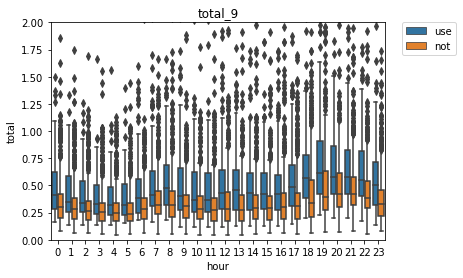

In [97]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

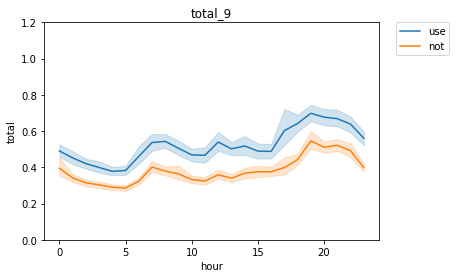

In [98]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

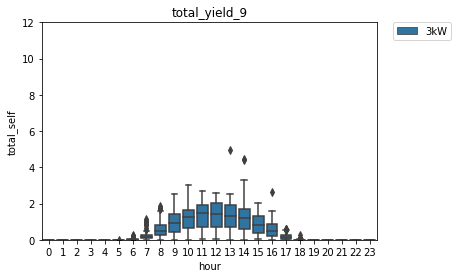

In [99]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

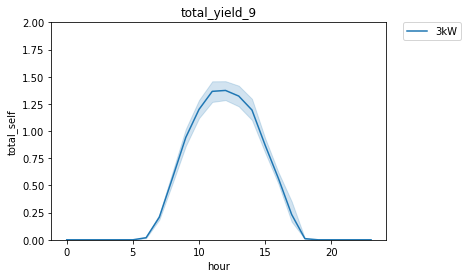

In [100]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

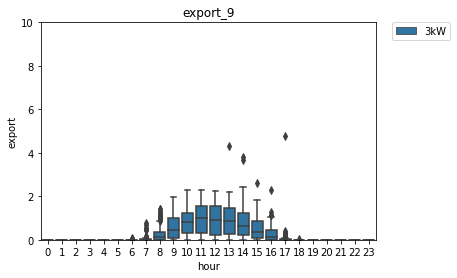

In [101]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

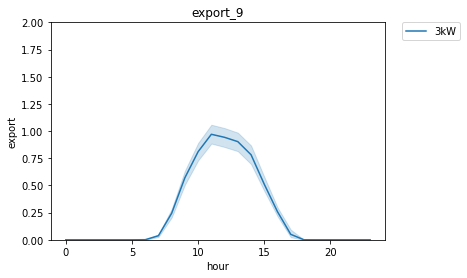

In [102]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

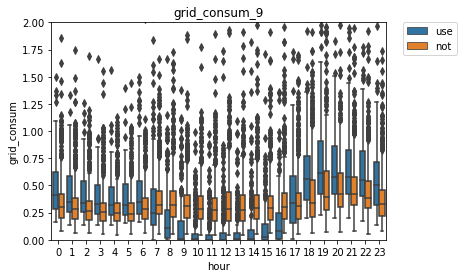

In [103]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

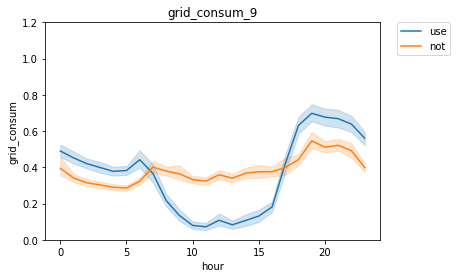

In [104]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

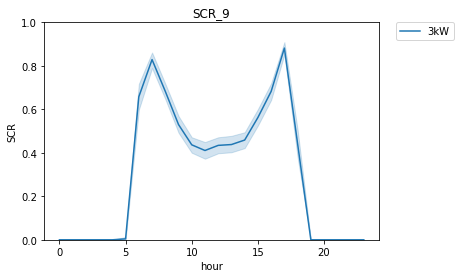

In [105]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_9')
plt.show()

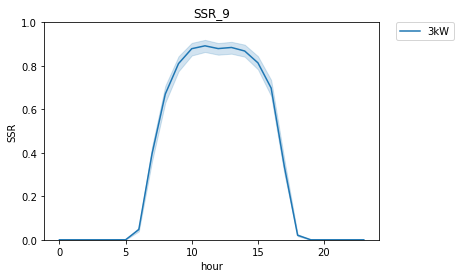

In [106]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_9')
plt.show()

<hr>

### 2021.10

In [107]:
df_all_hour_21_10 = df_all_hour[df_all_hour.ym == '2021/10']

In [108]:
# 총 전력 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   517.0  0.348377  0.231403  0.029968  0.209961  0.299927  0.410156   
     1   518.0  0.325258  0.237474  0.049988  0.199951  0.280029  0.359985   
     2   517.0  0.305040  0.195725  0.040039  0.190063  0.279785  0.350098   
     3   521.0  0.315369  0.292390  0.039978  0.189941  0.260010  0.349854   
     4   516.0  0.284422  0.199560  0.030029  0.170044  0.250000  0.329987   
     5   517.0  0.306423  0.435893  0.039978  0.160034  0.239990  0.339844   
     6   522.0  0.328623  0.371522  0.029968  0.189941  0.260010  0.377411   
     7   518.0  0.414454  0.726666  0.039978  0.229980  0.320068  0.449951   
     8   525.0  0.326203  0.227225  0.039917  0.190063  0.280029  0.399902   
     9   522.0  0.302784  0.277754  0.029968  0.169952  0.260010  0.359985   
     10  526.0  0.277011  0.178727  0.039917  0.160034  0.239990  0.329956   
     11  511.0  0.289978  0.420730  0.030029  0.140015  0.230103  0.329956   
     12  520.0  0.290595  0.219116  0.029968  0.150024  0.240051  0.339966   
     13  518.0  0.301215  0.430174  0.039978  0.150024  0.229980  0.340088   
     14  515.0  0.300812  0.283764  0.039978  0.159973  0.250000  0.339905   
     15  516.0  0.312056  0.307160  0.039978  0.160034  0.260010  0.350098   
     16  512.0  0.349137  0.476819  0.039917  0.177460  0.269775  0.390137   
     17  514.0  0.362630  0.300295  0.029968  0.179962  0.290039  0.430054   
     18  515.0  0.441687  0.383740  0.039978  0.219971  0.340088  0.515015   
     19  514.0  0.492629  0.470123  0.029968  0.250000  0.359985  0.559906   
     20  514.0  0.475059  0.339521  0.059998  0.299927  0.400024  0.550049   
     21  514.0  0.495077  0.317608  0.039978  0.309937  0.420044  0.597412   
     22  516.0  0.431047  0.258599  0.039978  0.280029  0.370117  0.520020   
     23  515.0  0.378935  0.240986  0.050049  0.230042  0.329956  0.465088   
use  0   245.0  0.515551  0.291498  0.149902  0.280029  0.439941  0.650024   
     1   240.0  0.479847  0.258959  0.159973  0.260010  0.410095  0.620026   
     2   241.0  0.450649  0.306773  0.140015  0.269897  0.399902  0.570068   
     3   239.0  0.424728  0.232211  0.130005  0.250000  0.389893  0.535034   
     4   240.0  0.415184  0.264265  0.140015  0.240036  0.375061  0.520020   
     5   241.0  0.412492  0.219674  0.130005  0.250000  0.379883  0.520020   
     6   239.0  0.438097  0.227688  0.140015  0.250000  0.409912  0.569824   
     7   240.0  0.550374  0.437955  0.139893  0.310059  0.450073  0.659943   
     8   244.0  0.578364  0.318546  0.169922  0.340149  0.509949  0.732635   
     9   245.0  0.499039  0.335327  0.099976  0.269775  0.420166  0.619995   
     10  243.0  0.463653  0.307194  0.079956  0.239990  0.389893  0.604858   
     11  240.0  0.475437  0.378737  0.109863  0.230164  0.374878  0.599976   
     12  239.0  0.515089  0.360285  0.109985  0.265015  0.390015  0.684814   
     13  240.0  0.505812  0.329640  0.080078  0.267365  0.435120  0.630035   
     14  244.0  0.469570  0.325385  0.080200  0.249878  0.389954  0.579987   
     15  241.0  0.448904  0.313508  0.119873  0.250122  0.390015  0.520020   
     16  242.0  0.468913  0.267276  0.119751  0.270142  0.410034  0.600098   
     17  244.0  0.550446  0.322149  0.149780  0.309906  0.465027  0.710114   
     18  244.0  0.661594  0.339952  0.189941  0.409912  0.595093  0.794983   
     19  243.0  0.683188  0.381049  0.219971  0.389984  0.579956  0.839966   
     20  244.0  0.658793  0.378387  0.210022  0.390015  0.579895  0.765015   
     21  238.0  0.664120  0.400534  0.200012  0.359985  0.560059  0.857452   
     22  243.0  0.692939  0.555460  0.169983  0.389923  0.530029  0.845032   
     23  244.0  0.596635  0.388341  0.150024  0.310059  0.500000  0.747498   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [109]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   239.0  0.002595  0.006148  0.000000  0.000000  0.000000   
         7   240.0  0.150668  0.123789  0.000000  0.079834  0.119873   
         8   244.0  0.579346  0.311158  0.000000  0.300049  0.554932   
         9   245.0  1.057924  0.530204  0.060059  0.590088  1.080078   
         10  243.0  1.403018  0.621719  0.120117  0.885010  1.510010   
         11  240.0  1.574359  0.680779  0.060059  1.027527  1.744995   
         12  239.0  1.646557  0.768519  0.089844  1.109985  1.829834   
         13  240.0  1.521940  0.772826  0.060059  0.987488  1.709961   
         14  244.0  1.303690  0.910911  0.080078  0.687500  1.380005   
         15  241.0  0.887260  0.528258  0.010010  0.409912  0.920166   
         16  242.0  0.393401  0.302668  0.000000  0.162598  0.314941   
         17  244.0  0.085360  0.313497  0.000000  0.010010  0.030029   
         18  244.0  0.000123  0.001431  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.040039  
         7   0.202637   0.880127  
         8   0.804993   1.419922  
         9   1.469971   2.179932  
         10  1.915039   2.659912  
         11  2.132568   2.969971  
         12  2.180176   4.650146  
         13  2.069885   6.669922  
         14  1.770020  10.650146  
         15  1.290039   3.140137  
         16  0.600098   1.960205  
         17  0.069885   4.459961  
         18  0.000000   0.020020  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [110]:
# 총 전력 수출량
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   240.0  0.018044  0.046498  0.0  0.000000  0.000000  0.010010   
         8   244.0  0.237499  0.229616  0.0  0.020020  0.190063  0.399933   
         9   245.0  0.669987  0.490293  0.0  0.239990  0.700073  1.050049   
         10  243.0  1.003334  0.609422  0.0  0.464966  1.129944  1.489990   
         11  240.0  1.172461  0.658591  0.0  0.642456  1.359985  1.685028   
         12  239.0  1.198330  0.704982  0.0  0.584961  1.349976  1.729980   
         13  240.0  1.091877  0.717256  0.0  0.452484  1.244995  1.614990   
         14  244.0  0.915388  0.813307  0.0  0.357483  0.924988  1.342499   
         15  241.0  0.548670  0.456317  0.0  0.119995  0.510010  0.900024   
         16  242.0  0.166532  0.227466  0.0  0.000000  0.049957  0.305023   
         17  244.0  0.029755  0.242193  0.0  0.000000  0.000000  0.000000   
         18  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.370117  
         8   0.920044  
         9   1.709961  
         10  2.419922  
         11  2.260010  
         12  3.500000  
         13  5.699951  
         14  9.149902  
         15  2.410034  
         16  1.400024  
         17  3.609985  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [111]:
# 총 그리드 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   517.0  0.348377  0.231403  0.029968  0.209961  0.299927  0.410156   
     1   518.0  0.325258  0.237474  0.049988  0.199951  0.280029  0.359985   
     2   517.0  0.305040  0.195725  0.040039  0.190063  0.279785  0.350098   
     3   521.0  0.315369  0.292390  0.039978  0.189941  0.260010  0.349854   
     4   516.0  0.284422  0.199560  0.030029  0.170044  0.250000  0.329987   
     5   517.0  0.306423  0.435893  0.039978  0.160034  0.239990  0.339844   
     6   522.0  0.328623  0.371522  0.029968  0.189941  0.260010  0.377411   
     7   518.0  0.414454  0.726666  0.039978  0.229980  0.320068  0.449951   
     8   525.0  0.326203  0.227225  0.039917  0.190063  0.280029  0.399902   
     9   522.0  0.302784  0.277754  0.029968  0.169952  0.260010  0.359985   
     10  526.0  0.277011  0.178727  0.039917  0.160034  0.239990  0.329956   
     11  511.0  0.289978  0.420730  0.030029  0.140015  0.230103  0.329956   
     12  520.0  0.290595  0.219116  0.029968  0.150024  0.240051  0.339966   
     13  518.0  0.301215  0.430174  0.039978  0.150024  0.229980  0.340088   
     14  515.0  0.300812  0.283764  0.039978  0.159973  0.250000  0.339905   
     15  516.0  0.312056  0.307160  0.039978  0.160034  0.260010  0.350098   
     16  512.0  0.349137  0.476819  0.039917  0.177460  0.269775  0.390137   
     17  514.0  0.362630  0.300295  0.029968  0.179962  0.290039  0.430054   
     18  515.0  0.441687  0.383740  0.039978  0.219971  0.340088  0.515015   
     19  514.0  0.492629  0.470123  0.029968  0.250000  0.359985  0.559906   
     20  514.0  0.475059  0.339521  0.059998  0.299927  0.400024  0.550049   
     21  514.0  0.495077  0.317608  0.039978  0.309937  0.420044  0.597412   
     22  516.0  0.431047  0.258599  0.039978  0.280029  0.370117  0.520020   
     23  515.0  0.378935  0.240986  0.050049  0.230042  0.329956  0.465088   
use  0   245.0  0.515551  0.291498  0.149902  0.280029  0.439941  0.650024   
     1   240.0  0.479847  0.258959  0.159973  0.260010  0.410095  0.620026   
     2   241.0  0.450649  0.306773  0.140015  0.269897  0.399902  0.570068   
     3   239.0  0.424728  0.232211  0.130005  0.250000  0.389893  0.535034   
     4   240.0  0.415184  0.264265  0.140015  0.240036  0.375061  0.520020   
     5   241.0  0.412492  0.219674  0.130005  0.250000  0.379883  0.520020   
     6   239.0  0.435502  0.227561  0.140015  0.250000  0.400024  0.564941   
     7   240.0  0.417750  0.443549  0.050049  0.180023  0.295044  0.502502   
     8   244.0  0.236517  0.277638  0.000000  0.020020  0.140015  0.350006   
     9   245.0  0.111102  0.248113  0.000000  0.000000  0.010010  0.109985   
     10  243.0  0.063969  0.174286  0.000000  0.000000  0.000000  0.030029   
     11  240.0  0.073539  0.276533  0.000000  0.000000  0.000000  0.020020   
     12  239.0  0.066861  0.167877  0.000000  0.000000  0.000000  0.030029   
     13  240.0  0.075749  0.178403  0.000000  0.000000  0.000000  0.039856   
     14  244.0  0.081268  0.226589  0.000000  0.000000  0.000000  0.040039   
     15  241.0  0.110314  0.224516  0.000000  0.000000  0.010010  0.110107   
     16  242.0  0.242044  0.268377  0.000000  0.040039  0.159912  0.369873   
     17  244.0  0.494841  0.327450  0.059998  0.239990  0.420105  0.662567   
     18  244.0  0.661471  0.339826  0.189941  0.409912  0.595093  0.794983   
     19  243.0  0.683188  0.381049  0.219971  0.389984  0.579956  0.839966   
     20  244.0  0.658793  0.378387  0.210022  0.390015  0.579895  0.765015   
     21  238.0  0.664120  0.400534  0.200012  0.359985  0.560059  0.857452   
     22  243.0  0.692939  0.555460  0.169983  0.389923  0.530029  0.845032   
     23  244.0  0.596635  0.388341  0.150024  0.310059  0.500000  0.747498   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [112]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   239.0  0.192469  0.395066  0.000000  0.000000  0.000000   
         7   240.0  0.902494  0.193318  0.000000  0.875000  1.000000   
         8   244.0  0.676967  0.254987  0.000000  0.452134  0.666783   
         9   245.0  0.471790  0.288808  0.057790  0.223063  0.405053   
         10  243.0  0.371441  0.270771  0.040179  0.160478  0.280993   
         11  240.0  0.336603  0.268167  0.044140  0.134519  0.239051   
         12  239.0  0.352494  0.264720  0.017993  0.150822  0.267027   
         13  240.0  0.375813  0.273269  0.045759  0.165316  0.280652   
         14  244.0  0.413141  0.288608  0.047171  0.187235  0.307822   
         15  241.0  0.512528  0.296313  0.085789  0.252388  0.450112   
         16  242.0  0.719403  0.279923  0.000000  0.507927  0.830274   
         17  244.0  0.862668  0.304731  0.000000  0.958313  1.000000   
         18  244.0  0.008197  0.090349  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  1.0  
         7   1.000000  1.0  
         8   0.939152  1.0  
         9   0.691729  1.0  
         10  0.533656  1.0  
         11  0.440602  1.0  
         12  0.491377  1.0  
         13  0.514063  1.0  
         14  0.549480  1.0  
         15  0.742138  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [113]:
# SSR(자가공급률)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   239.0  0.006603  0.016676  0.000000  0.000000  0.000000   
         7   240.0  0.302738  0.206033  0.000000  0.139822  0.285364   
         8   244.0  0.671873  0.278900  0.000000  0.476655  0.703796   
         9   245.0  0.859332  0.226261  0.058089  0.818215  0.974977   
         10  243.0  0.920777  0.172525  0.129134  0.943325  1.000000   
         11  240.0  0.923290  0.180633  0.018380  0.961107  1.000000   
         12  239.0  0.916768  0.179857  0.082180  0.932704  1.000000   
         13  240.0  0.901149  0.198428  0.176597  0.931233  1.000000   
         14  244.0  0.890129  0.209954  0.058781  0.893262  1.000000   
         15  241.0  0.821350  0.257726  0.030325  0.709728  0.964255   
         16  242.0  0.579632  0.308593  0.000000  0.301490  0.600658   
         17  244.0  0.132543  0.164293  0.000000  0.020319  0.060309   
         18  244.0  0.000151  0.001683  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.100122  
         7   0.469338  0.814564  
         8   0.927209  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.875036  1.000000  
         17  0.176951  0.881484  
         18  0.000000  0.021293  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

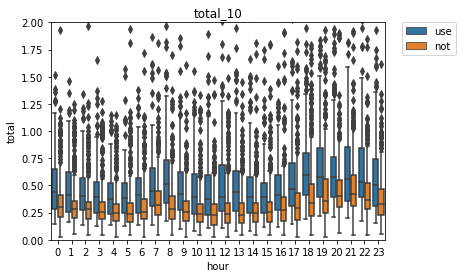

In [114]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

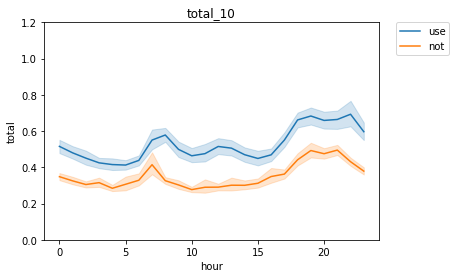

In [115]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

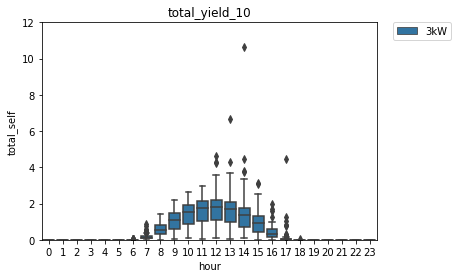

In [116]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

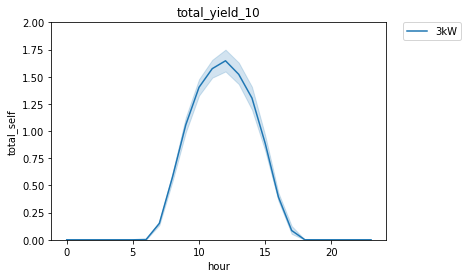

In [117]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

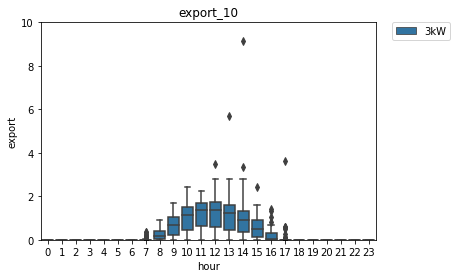

In [118]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

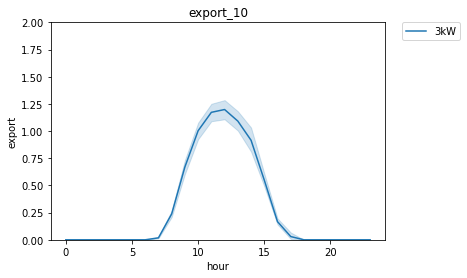

In [119]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

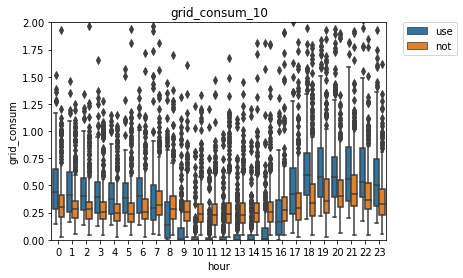

In [120]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

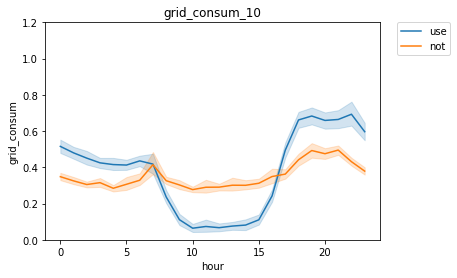

In [121]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

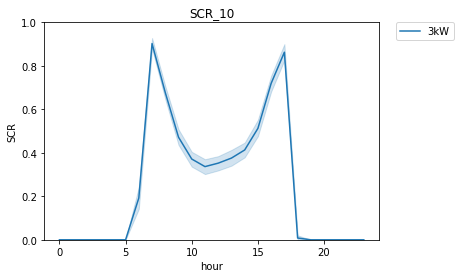

In [122]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_10')
plt.show()

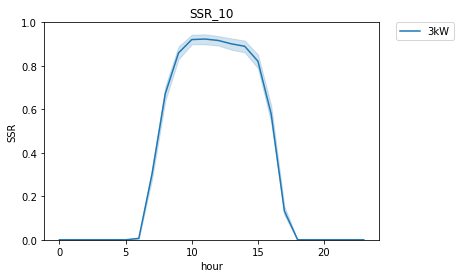

In [123]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_10')
plt.show()

<hr>

### 2021.11

In [124]:
df_all_hour_21_11 = df_all_hour[df_all_hour.ym == '2021/11']

In [125]:
# 총 전력 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   521.0  0.368153  0.212402  0.049988  0.229980  0.320068  0.440186   
     1   521.0  0.347519  0.202099  0.039978  0.219971  0.300049  0.400146   
     2   518.0  0.332352  0.187283  0.030029  0.219971  0.299957  0.380005   
     3   517.0  0.322590  0.194081  0.049988  0.200195  0.280029  0.380005   
     4   518.0  0.318475  0.193069  0.039978  0.190018  0.280029  0.379974   
     5   513.0  0.315847  0.204180  0.030029  0.180054  0.260010  0.380005   
     6   511.0  0.340661  0.208888  0.029968  0.209961  0.290039  0.419922   
     7   510.0  0.396004  0.228281  0.020020  0.239990  0.360107  0.479980   
     8   515.0  0.382909  0.578590  0.019958  0.219971  0.310059  0.439941   
     9   511.0  0.309373  0.205184  0.019958  0.180115  0.279785  0.380127   
     10  513.0  0.304679  0.506135  0.029968  0.179932  0.250000  0.339966   
     11  508.0  0.290274  0.204470  0.030029  0.169922  0.240051  0.342529   
     12  510.0  0.319337  0.316182  0.020020  0.169922  0.239990  0.360107   
     13  511.0  0.318988  0.513260  0.020020  0.160156  0.250000  0.360107   
     14  512.0  0.297304  0.298319  0.019958  0.159912  0.239990  0.349854   
     15  516.0  0.344126  0.792024  0.019958  0.167480  0.250000  0.359985   
     16  517.0  0.328862  0.327481  0.020020  0.189941  0.270020  0.379883   
     17  521.0  0.409667  0.394094  0.029968  0.209961  0.320068  0.479980   
     18  515.0  0.515362  0.501621  0.030029  0.260010  0.389893  0.579956   
     19  518.0  0.544128  0.521597  0.019958  0.289917  0.399902  0.580078   
     20  510.0  0.506887  0.319321  0.049927  0.319946  0.439941  0.589935   
     21  520.0  0.509545  0.412358  0.039978  0.330002  0.429932  0.580078   
     22  518.0  0.475684  0.571500  0.020020  0.300049  0.389893  0.550049   
     23  519.0  0.403357  0.233518  0.030029  0.250000  0.350098  0.489990   
use  0   234.0  0.580169  0.295149  0.150024  0.352478  0.529907  0.739990   
     1   235.0  0.522768  0.278154  0.150024  0.300049  0.475098  0.669922   
     2   237.0  0.473290  0.226019  0.149902  0.300049  0.469971  0.589966   
     3   235.0  0.445101  0.187848  0.149902  0.310059  0.439941  0.570068   
     4   235.0  0.453062  0.197108  0.150024  0.299927  0.440186  0.579956   
     5   236.0  0.457118  0.213272  0.139893  0.277527  0.459961  0.569977   
     6   235.0  0.514700  0.362194  0.140015  0.279968  0.440063  0.619873   
     7   232.0  0.610296  0.469452  0.150024  0.359955  0.504944  0.702576   
     8   232.0  0.646203  0.331530  0.120117  0.399994  0.599976  0.799805   
     9   238.0  0.528952  0.320489  0.109863  0.270020  0.480103  0.717346   
     10  239.0  0.475788  0.306557  0.099854  0.220032  0.419922  0.664917   
     11  235.0  0.478168  0.364307  0.079956  0.219971  0.419800  0.640137   
     12  233.0  0.495494  0.327934  0.109985  0.220093  0.420044  0.670166   
     13  235.0  0.494074  0.335375  0.090088  0.259949  0.430176  0.640137   
     14  235.0  0.475623  0.276410  0.100098  0.249939  0.439941  0.619934   
     15  236.0  0.468547  0.272900  0.089966  0.239990  0.439941  0.630112   
     16  239.0  0.542989  0.655377  0.109985  0.270020  0.449707  0.674927   
     17  236.0  0.637483  0.361635  0.109985  0.369995  0.575012  0.790039   
     18  234.0  0.795430  0.391163  0.239990  0.540039  0.714966  0.947479   
     19  235.0  0.801303  0.440303  0.250000  0.500000  0.669922  0.989990   
     20  237.0  0.779247  0.505343  0.239990  0.459961  0.639893  0.989990   
     21  235.0  0.741124  0.383387  0.230103  0.484985  0.630005  1.005005   
     22  235.0  0.699673  0.359011  0.189941  0.419983  0.630005  0.910095   
     23  233.0  0.643980  0.353407  0.150024  0.399902  0.570068  0.829834   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [126]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   232.0  0.048626  0.044519  0.000000  0.010010  0.040039   
         8   232.0  0.397358  0.266724  0.000000  0.180115  0.375000   
         9   238.0  0.936222  0.502835  0.000000  0.522461  0.979980   
         10  239.0  1.287271  0.596092  0.000000  1.000000  1.419922   
         11  235.0  1.434464  0.654395  0.030029  0.930176  1.629883   
         12  233.0  1.471983  0.681534  0.010010  0.979980  1.699951   
         13  235.0  1.325416  0.657647  0.020020  0.714966  1.529785   
         14  235.0  1.053899  0.585122  0.010010  0.515015  1.139893   
         15  236.0  0.620582  0.388152  0.000000  0.280029  0.640015   
         16  239.0  0.207385  0.495070  0.000000  0.070068  0.120117   
         17  236.0  0.003757  0.007589  0.000000  0.000000  0.000000   
         18  234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.070068  0.270020  
         8   0.542480  1.340088  
         9   1.357544  1.850098  
         10  1.744995  2.179932  
         11  1.949951  2.380127  
         12  2.020020  3.689941  
         13  1.880005  3.179932  
         14  1.510010  3.270020  
         15  0.872375  2.869873  
         16  0.250000  7.390137  
         17  0.010010  0.050049  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [127]:
# 총 전력 수출량
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   234.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   232.0  0.000949  0.005092  0.0  0.000000  0.000000  0.000000   
         8   232.0  0.105553  0.131730  0.0  0.000000  0.059937  0.160034   
         9   238.0  0.557225  0.410402  0.0  0.170044  0.555054  0.870117   
         10  239.0  0.905856  0.533924  0.0  0.527527  0.989990  1.345093   
         11  235.0  1.045105  0.606949  0.0  0.505005  1.190063  1.544983   
         12  233.0  1.063694  0.627016  0.0  0.590027  1.180054  1.570068   
         13  235.0  0.927765  0.596559  0.0  0.309998  1.020020  1.450073   
         14  235.0  0.683617  0.505378  0.0  0.185059  0.660034  1.130066   
         15  236.0  0.329834  0.342028  0.0  0.020020  0.229980  0.522522   
         16  239.0  0.065815  0.202250  0.0  0.000000  0.000000  0.069885   
         17  236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         18  234.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  233.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.059937  
         8   0.719971  
         9   1.489990  
         10  1.930054  
         11  2.030029  
         12  2.589966  
         13  1.989990  
         14  2.309998  
         15  2.159912  
         16  2.790039  
         17  0.000000  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [128]:
# 총 그리드 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   521.0  0.368153  0.212402  0.049988  0.229980  0.320068  0.440186   
     1   521.0  0.347519  0.202099  0.039978  0.219971  0.300049  0.400146   
     2   518.0  0.332352  0.187283  0.030029  0.219971  0.299957  0.380005   
     3   517.0  0.322590  0.194081  0.049988  0.200195  0.280029  0.380005   
     4   518.0  0.318475  0.193069  0.039978  0.190018  0.280029  0.379974   
     5   513.0  0.315847  0.204180  0.030029  0.180054  0.260010  0.380005   
     6   511.0  0.340661  0.208888  0.029968  0.209961  0.290039  0.419922   
     7   510.0  0.396004  0.228281  0.020020  0.239990  0.360107  0.479980   
     8   515.0  0.382909  0.578590  0.019958  0.219971  0.310059  0.439941   
     9   511.0  0.309373  0.205184  0.019958  0.180115  0.279785  0.380127   
     10  513.0  0.304679  0.506135  0.029968  0.179932  0.250000  0.339966   
     11  508.0  0.290274  0.204470  0.030029  0.169922  0.240051  0.342529   
     12  510.0  0.319337  0.316182  0.020020  0.169922  0.239990  0.360107   
     13  511.0  0.318988  0.513260  0.020020  0.160156  0.250000  0.360107   
     14  512.0  0.297304  0.298319  0.019958  0.159912  0.239990  0.349854   
     15  516.0  0.344126  0.792024  0.019958  0.167480  0.250000  0.359985   
     16  517.0  0.328862  0.327481  0.020020  0.189941  0.270020  0.379883   
     17  521.0  0.409667  0.394094  0.029968  0.209961  0.320068  0.479980   
     18  515.0  0.515362  0.501621  0.030029  0.260010  0.389893  0.579956   
     19  518.0  0.544128  0.521597  0.019958  0.289917  0.399902  0.580078   
     20  510.0  0.506887  0.319321  0.049927  0.319946  0.439941  0.589935   
     21  520.0  0.509545  0.412358  0.039978  0.330002  0.429932  0.580078   
     22  518.0  0.475684  0.571500  0.020020  0.300049  0.389893  0.550049   
     23  519.0  0.403357  0.233518  0.030029  0.250000  0.350098  0.489990   
use  0   234.0  0.580169  0.295149  0.150024  0.352478  0.529907  0.739990   
     1   235.0  0.522768  0.278154  0.150024  0.300049  0.475098  0.669922   
     2   237.0  0.473290  0.226019  0.149902  0.300049  0.469971  0.589966   
     3   235.0  0.445101  0.187848  0.149902  0.310059  0.439941  0.570068   
     4   235.0  0.453062  0.197108  0.150024  0.299927  0.440186  0.579956   
     5   236.0  0.457118  0.213272  0.139893  0.277527  0.459961  0.569977   
     6   235.0  0.514700  0.362194  0.140015  0.279968  0.440063  0.619873   
     7   232.0  0.562619  0.468306  0.089966  0.320068  0.469971  0.642517   
     8   232.0  0.354397  0.332595  0.000000  0.099945  0.239990  0.489990   
     9   238.0  0.149956  0.267832  0.000000  0.000000  0.010010  0.209961   
     10  239.0  0.094374  0.220378  0.000000  0.000000  0.000000  0.044922   
     11  235.0  0.088809  0.223555  0.000000  0.000000  0.000000  0.039978   
     12  233.0  0.087205  0.193462  0.000000  0.000000  0.000000  0.060059   
     13  235.0  0.096424  0.215775  0.000000  0.000000  0.000000  0.064880   
     14  235.0  0.105341  0.198913  0.000000  0.000000  0.010010  0.114929   
     15  236.0  0.177800  0.223893  0.000000  0.009979  0.079956  0.270020   
     16  239.0  0.401419  0.429204  0.000000  0.119995  0.349854  0.559998   
     17  236.0  0.633726  0.363340  0.109985  0.369995  0.570068  0.782532   
     18  234.0  0.795430  0.391163  0.239990  0.540039  0.714966  0.947479   
     19  235.0  0.801303  0.440303  0.250000  0.500000  0.669922  0.989990   
     20  237.0  0.779247  0.505343  0.239990  0.459961  0.639893  0.989990   
     21  235.0  0.741124  0.383387  0.230103  0.484985  0.630005  1.005005   
     22  235.0  0.699673  0.359011  0.189941  0.419983  0.630005  0.910095   
     23  233.0  0.643980  0.353407  0.150024  0.399902  0.570068  0.829834   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [129]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   232.0  0.834651  0.361618  0.000000  1.000000  1.000000   
         8   232.0  0.763182  0.247095  0.000000  0.612777  0.836860   
         9   238.0  0.483630  0.288101  0.000000  0.250392  0.416757   
         10  239.0  0.388267  0.284740  0.000000  0.163232  0.297154   
         11  235.0  0.359739  0.271363  0.052951  0.151885  0.271762   
         12  233.0  0.367672  0.272746  0.060822  0.150218  0.282350   
         13  235.0  0.402634  0.283810  0.048694  0.179634  0.313707   
         14  235.0  0.465637  0.283796  0.061511  0.222831  0.429410   
         15  236.0  0.594016  0.301811  0.000000  0.327032  0.601096   
         16  239.0  0.807449  0.272881  0.000000  0.633160  1.000000   
         17  236.0  0.262712  0.441043  0.000000  0.000000  0.000000   
         18  234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   0.983167  1.0  
         9   0.668401  1.0  
         10  0.514112  1.0  
         11  0.464756  1.0  
         12  0.454498  1.0  
         13  0.547435  1.0  
         14  0.619549  1.0  
         15  0.890317  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [130]:
# SSR(자가공급률)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   232.0  0.094592  0.088484  0.000000  0.022984  0.073014   
         8   232.0  0.515193  0.290888  0.000000  0.303162  0.513148   
         9   238.0  0.794834  0.305645  0.000000  0.700409  0.968967   
         10  239.0  0.867857  0.268173  0.000000  0.929979  1.000000   
         11  235.0  0.884931  0.238202  0.050041  0.926413  1.000000   
         12  233.0  0.884833  0.228829  0.014298  0.906075  1.000000   
         13  235.0  0.869490  0.235600  0.032813  0.857268  1.000000   
         14  235.0  0.834662  0.264398  0.020855  0.754510  0.981465   
         15  236.0  0.713117  0.290517  0.000000  0.489677  0.794357   
         16  239.0  0.346109  0.275299  0.000000  0.115169  0.261077   
         17  236.0  0.010636  0.028773  0.000000  0.000000  0.000000   
         18  234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  233.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.139876  0.488504  
         8   0.775624  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  0.975023  1.000000  
         16  0.588193  1.000000  
         17  0.008380  0.217507  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

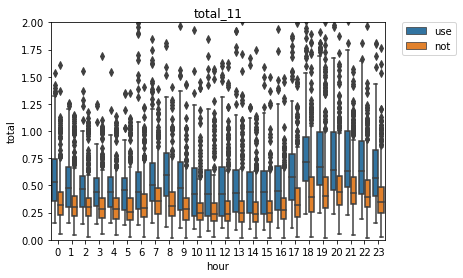

In [131]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

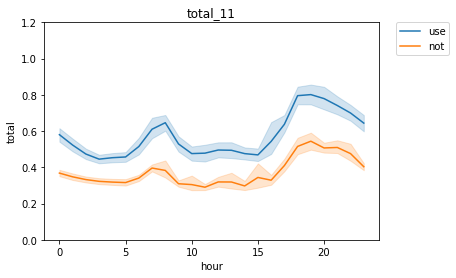

In [132]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

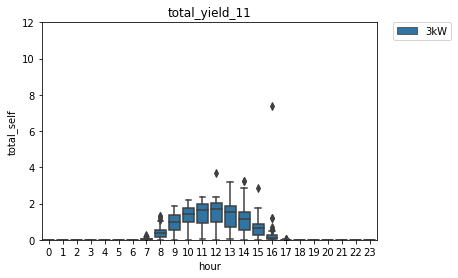

In [133]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

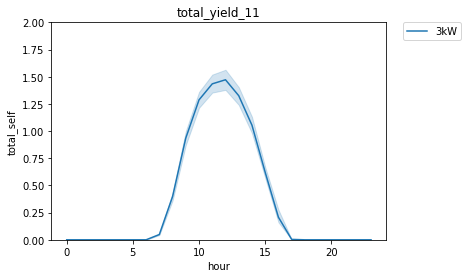

In [134]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

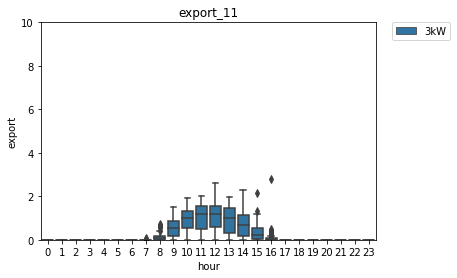

In [135]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

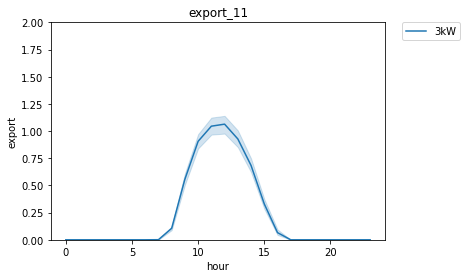

In [136]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

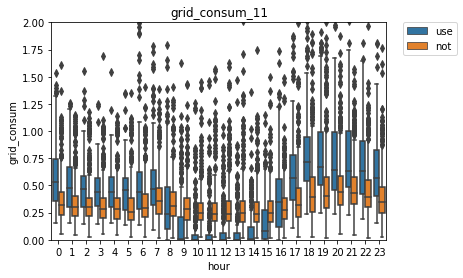

In [137]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

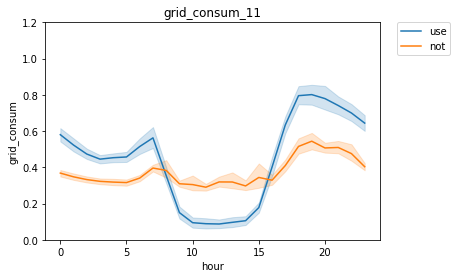

In [138]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

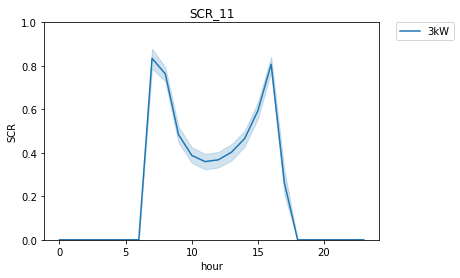

In [139]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_11')
plt.show()

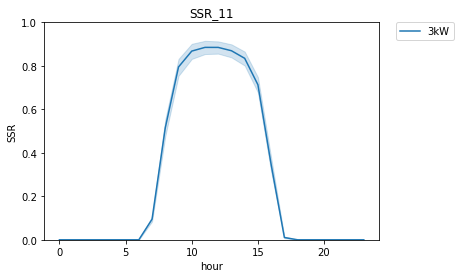

In [140]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_11')
plt.show()

<hr>

### 2021.12

In [141]:
df_all_hour_21_12 = df_all_hour[df_all_hour.ym == '2021/12']

In [142]:
# 총 전력 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   530.0  0.412253  0.393007  0.019897  0.232574  0.349854  0.479980   
     1   531.0  0.378027  0.369279  0.019897  0.219971  0.330078  0.430176   
     2   532.0  0.366806  0.264585  0.040039  0.210175  0.320068  0.419922   
     3   533.0  0.352639  0.200097  0.020020  0.219971  0.320068  0.419922   
     4   533.0  0.351119  0.208502  0.020020  0.210083  0.310059  0.419922   
     5   526.0  0.368707  0.509531  0.049927  0.209961  0.310059  0.420166   
     6   530.0  0.381646  0.318711  0.020020  0.220001  0.329956  0.449951   
     7   527.0  0.419853  0.258902  0.010010  0.270020  0.380127  0.500000   
     8   528.0  0.390013  0.261106  0.019958  0.229980  0.340088  0.472656   
     9   530.0  0.379147  0.683173  0.030029  0.190063  0.310059  0.429932   
     10  532.0  0.344867  0.462706  0.010010  0.179932  0.270020  0.399902   
     11  536.0  0.348845  0.590538  0.020020  0.160126  0.250000  0.379883   
     12  531.0  0.329716  0.243823  0.020020  0.170105  0.270020  0.409973   
     13  527.0  0.333705  0.342651  0.019958  0.169922  0.260010  0.394958   
     14  533.0  0.333620  0.327721  0.019958  0.160156  0.260010  0.389893   
     15  534.0  0.369814  0.897141  0.020020  0.179932  0.270020  0.387268   
     16  537.0  0.418188  0.624577  0.019958  0.189941  0.300049  0.459961   
     17  533.0  0.467784  0.416001  0.029968  0.229980  0.350098  0.570068   
     18  526.0  0.553155  0.494843  0.020020  0.270020  0.409912  0.644897   
     19  534.0  0.587162  0.839483  0.030029  0.310013  0.439941  0.620117   
     20  526.0  0.546519  0.647752  0.020020  0.320068  0.459961  0.627441   
     21  524.0  0.537870  0.455026  0.049927  0.339966  0.460022  0.609894   
     22  530.0  0.497167  0.408332  0.020020  0.309937  0.439941  0.600098   
     23  531.0  0.429640  0.284516  0.020020  0.270020  0.370117  0.500000   
use  0   243.0  0.578503  0.285743  0.150024  0.359985  0.579956  0.760010   
     1   242.0  0.544170  0.443575  0.150024  0.329987  0.505005  0.680115   
     2   244.0  0.491171  0.223814  0.140015  0.310059  0.460205  0.642578   
     3   243.0  0.463530  0.195283  0.169922  0.309937  0.440186  0.589844   
     4   243.0  0.471080  0.207395  0.140015  0.319946  0.449951  0.609985   
     5   244.0  0.466904  0.224756  0.119995  0.289917  0.434937  0.600098   
     6   243.0  0.542729  0.388477  0.099976  0.270020  0.469971  0.649902   
     7   243.0  0.664346  0.750333  0.159912  0.357422  0.539795  0.734985   
     8   243.0  0.725394  0.410065  0.159912  0.430176  0.660156  0.885071   
     9   244.0  0.677285  0.486928  0.090088  0.370056  0.610107  0.899811   
     10  243.0  0.625818  0.867012  0.079834  0.289795  0.520020  0.729858   
     11  242.0  0.551709  0.367995  0.090088  0.250000  0.490112  0.719940   
     12  244.0  0.578180  0.424331  0.080078  0.290039  0.514893  0.740021   
     13  243.0  0.542393  0.343569  0.079834  0.295044  0.499878  0.694824   
     14  238.0  0.538240  0.335382  0.080078  0.272522  0.500000  0.697510   
     15  244.0  0.505664  0.316085  0.090088  0.250000  0.479980  0.650208   
     16  244.0  0.566682  0.379079  0.089844  0.307495  0.520020  0.687622   
     17  242.0  0.723853  0.390005  0.179932  0.429993  0.650085  0.930176   
     18  242.0  0.802544  0.377666  0.200073  0.539825  0.719971  1.039978   
     19  242.0  0.813350  0.411449  0.219971  0.479980  0.729980  1.060059   
     20  241.0  0.791746  0.411781  0.210083  0.489990  0.699951  1.060059   
     21  238.0  0.762290  0.392252  0.200073  0.500000  0.675049  0.927612   
     22  242.0  0.706835  0.337360  0.200195  0.419922  0.667480  0.887390   
     23  242.0  0.649430  0.314281  0.160034  0.419922  0.630127  0.808777   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [143]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.005512  0.008812  0.000000  0.000000  0.000000   
         8   243.0  0.218641  0.179091  0.000000  0.080078  0.179932   
         9   244.0  0.752490  0.484715  0.000000  0.330017  0.699951   
         10  243.0  1.165179  0.615684  0.050049  0.639893  1.209961   
         11  242.0  1.445806  0.647353  0.080078  0.879944  1.630127   
         12  244.0  1.502482  0.682177  0.109863  0.957520  1.689941   
         13  243.0  1.352228  0.662627  0.059814  0.810059  1.529785   
         14  238.0  1.116284  0.722257  0.079834  0.572327  1.170044   
         15  244.0  0.681057  0.492972  0.010010  0.250000  0.659912   
         16  244.0  0.139488  0.145041  0.000000  0.040039  0.080078   
         17  242.0  0.010502  0.114279  0.000000  0.000000  0.000000   
         18  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.010010  0.050049  
         8   0.294922  0.780029  
         9   1.150146  1.780029  
         10  1.689941  2.979980  
         11  1.967468  2.699951  
         12  2.060059  4.080078  
         13  1.939941  2.309814  
         14  1.620117  7.429932  
         15  0.969971  3.100098  
         16  0.169983  0.880127  
         17  0.000000  1.711426  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [144]:
# 총 전력 수출량
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         8   243.0  0.028480  0.052309  0.0  0.000000  0.000000  0.040039   
         9   244.0  0.338033  0.327528  0.0  0.037537  0.239990  0.542511   
         10  243.0  0.703105  0.486656  0.0  0.250000  0.729980  1.100098   
         11  242.0  0.974092  0.569535  0.0  0.492493  1.079956  1.420044   
         12  244.0  1.016107  0.614523  0.0  0.527435  1.140015  1.479980   
         13  243.0  0.904892  0.593513  0.0  0.350037  0.949951  1.399902   
         14  238.0  0.700776  0.648849  0.0  0.185028  0.625000  1.137604   
         15  244.0  0.367808  0.398578  0.0  0.020020  0.239990  0.609894   
         16  244.0  0.041656  0.086499  0.0  0.000000  0.000000  0.030029   
         17  242.0  0.000662  0.010295  0.0  0.000000  0.000000  0.000000   
         18  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.000000  
         8   0.359985  
         9   1.484863  
         10  1.770020  
         11  2.170166  
         12  2.910034  
         13  2.199951  
         14  6.680176  
         15  2.229980  
         16  0.479980  
         17  0.160156  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [145]:
# 총 그리드 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   530.0  0.412253  0.393007  0.019897  0.232574  0.349854  0.479980   
     1   531.0  0.378027  0.369279  0.019897  0.219971  0.330078  0.430176   
     2   532.0  0.366806  0.264585  0.040039  0.210175  0.320068  0.419922   
     3   533.0  0.352639  0.200097  0.020020  0.219971  0.320068  0.419922   
     4   533.0  0.351119  0.208502  0.020020  0.210083  0.310059  0.419922   
     5   526.0  0.368707  0.509531  0.049927  0.209961  0.310059  0.420166   
     6   530.0  0.381646  0.318711  0.020020  0.220001  0.329956  0.449951   
     7   527.0  0.419853  0.258902  0.010010  0.270020  0.380127  0.500000   
     8   528.0  0.390013  0.261106  0.019958  0.229980  0.340088  0.472656   
     9   530.0  0.379147  0.683173  0.030029  0.190063  0.310059  0.429932   
     10  532.0  0.344867  0.462706  0.010010  0.179932  0.270020  0.399902   
     11  536.0  0.348845  0.590538  0.020020  0.160126  0.250000  0.379883   
     12  531.0  0.329716  0.243823  0.020020  0.170105  0.270020  0.409973   
     13  527.0  0.333705  0.342651  0.019958  0.169922  0.260010  0.394958   
     14  533.0  0.333620  0.327721  0.019958  0.160156  0.260010  0.389893   
     15  534.0  0.369814  0.897141  0.020020  0.179932  0.270020  0.387268   
     16  537.0  0.418188  0.624577  0.019958  0.189941  0.300049  0.459961   
     17  533.0  0.467784  0.416001  0.029968  0.229980  0.350098  0.570068   
     18  526.0  0.553155  0.494843  0.020020  0.270020  0.409912  0.644897   
     19  534.0  0.587162  0.839483  0.030029  0.310013  0.439941  0.620117   
     20  526.0  0.546519  0.647752  0.020020  0.320068  0.459961  0.627441   
     21  524.0  0.537870  0.455026  0.049927  0.339966  0.460022  0.609894   
     22  530.0  0.497167  0.408332  0.020020  0.309937  0.439941  0.600098   
     23  531.0  0.429640  0.284516  0.020020  0.270020  0.370117  0.500000   
use  0   243.0  0.578503  0.285743  0.150024  0.359985  0.579956  0.760010   
     1   242.0  0.544170  0.443575  0.150024  0.329987  0.505005  0.680115   
     2   244.0  0.491171  0.223814  0.140015  0.310059  0.460205  0.642578   
     3   243.0  0.463530  0.195283  0.169922  0.309937  0.440186  0.589844   
     4   243.0  0.471080  0.207395  0.140015  0.319946  0.449951  0.609985   
     5   244.0  0.466904  0.224756  0.119995  0.289917  0.434937  0.600098   
     6   243.0  0.542729  0.388477  0.099976  0.270020  0.469971  0.649902   
     7   243.0  0.658835  0.749677  0.159912  0.350037  0.530029  0.734985   
     8   243.0  0.535232  0.405854  0.040039  0.250000  0.459961  0.689941   
     9   244.0  0.262827  0.453016  0.000000  0.020020  0.099854  0.339905   
     10  243.0  0.163745  0.728473  0.000000  0.000000  0.010010  0.120056   
     11  242.0  0.079995  0.195739  0.000000  0.000000  0.000000  0.050018   
     12  244.0  0.091804  0.234253  0.000000  0.000000  0.000000  0.040039   
     13  243.0  0.095058  0.196357  0.000000  0.000000  0.000000  0.080078   
     14  238.0  0.122733  0.232119  0.000000  0.000000  0.020020  0.120087   
     15  244.0  0.192415  0.273538  0.000000  0.010010  0.090210  0.270020   
     16  244.0  0.468850  0.378731  0.000000  0.170044  0.425049  0.639893   
     17  242.0  0.714012  0.371594  0.179932  0.429993  0.644897  0.920105   
     18  242.0  0.802544  0.377666  0.200073  0.539825  0.719971  1.039978   
     19  242.0  0.813350  0.411449  0.219971  0.479980  0.729980  1.060059   
     20  241.0  0.791746  0.411781  0.210083  0.489990  0.699951  1.060059   
     21  238.0  0.762290  0.392252  0.200073  0.500000  0.675049  0.927612   
     22  242.0  0.706835  0.337360  0.200195  0.419922  0.667480  0.887390   
     23  242.0  0.649430  0.314281  0.160034  0.419922  0.630127  0.808777   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [146]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.382716  0.487053  0.000000  0.000000  0.000000   
         8   243.0  0.863452  0.237483  0.000000  0.800024  1.000000   
         9   244.0  0.640460  0.265046  0.000000  0.420058  0.612757   
         10  243.0  0.475521  0.278385  0.061420  0.254006  0.403183   
         11  242.0  0.400637  0.271055  0.059439  0.193226  0.328848   
         12  244.0  0.401584  0.267239  0.051662  0.198663  0.325078   
         13  243.0  0.422421  0.268593  0.035018  0.196747  0.364841   
         14  238.0  0.489501  0.282751  0.058880  0.248572  0.452049   
         15  244.0  0.609904  0.299113  0.072070  0.326691  0.631192   
         16  244.0  0.837950  0.258688  0.000000  0.747437  1.000000   
         17  242.0  0.118484  0.322438  0.000000  0.000000  0.000000   
         18  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.896081  1.0  
         10  0.665772  1.0  
         11  0.534837  1.0  
         12  0.538917  1.0  
         13  0.596946  1.0  
         14  0.684394  1.0  
         15  0.901102  1.0  
         16  1.000000  1.0  
         17  0.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [147]:
# SSR(자가공급률)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.010065  0.015585  0.000000  0.000000  0.000000   
         8   243.0  0.310376  0.225839  0.000000  0.119097  0.291455   
         9   244.0  0.695896  0.313304  0.000000  0.471928  0.838489   
         10  243.0  0.842981  0.242423  0.059683  0.760860  0.983030   
         11  242.0  0.902773  0.198216  0.136515  0.911201  1.000000   
         12  244.0  0.897284  0.196718  0.088086  0.909573  1.000000   
         13  243.0  0.873012  0.211363  0.059814  0.840912  1.000000   
         14  238.0  0.833311  0.233631  0.067169  0.731501  0.949954   
         15  244.0  0.703434  0.292296  0.012208  0.479119  0.810105   
         16  244.0  0.264991  0.251766  0.000000  0.069759  0.140524   
         17  242.0  0.007262  0.049298  0.000000  0.000000  0.000000   
         18  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.018535  0.083418  
         8   0.485953  0.925859  
         9   0.956964  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  0.947702  1.000000  
         16  0.444196  1.000000  
         17  0.000000  0.657845  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

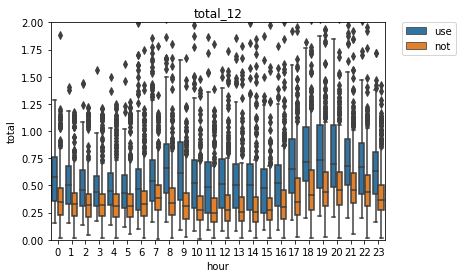

In [148]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

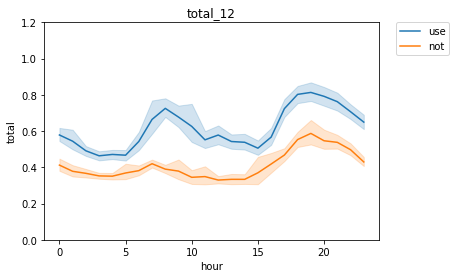

In [149]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

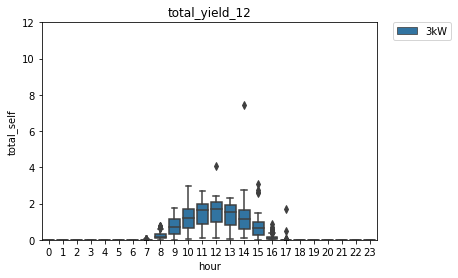

In [150]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

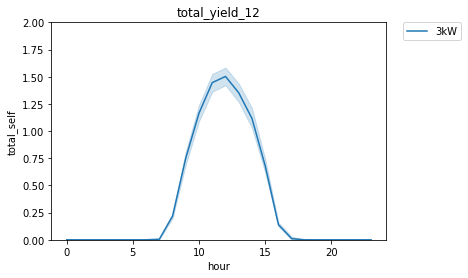

In [151]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

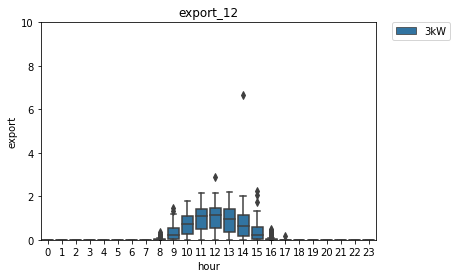

In [152]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

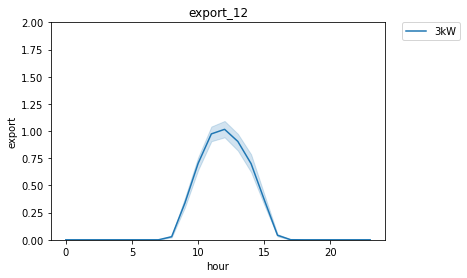

In [153]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

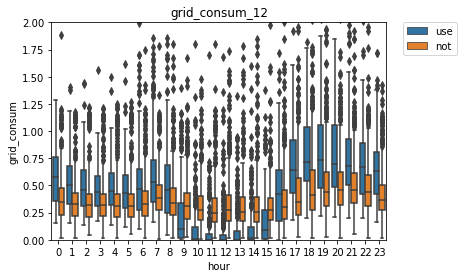

In [154]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

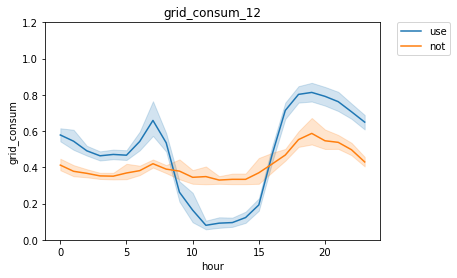

In [155]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

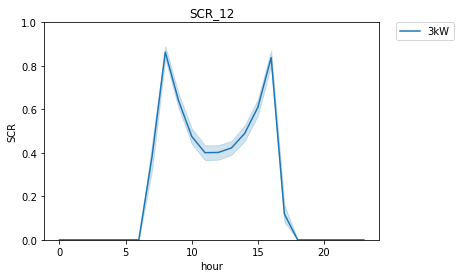

In [156]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_12')
plt.show()

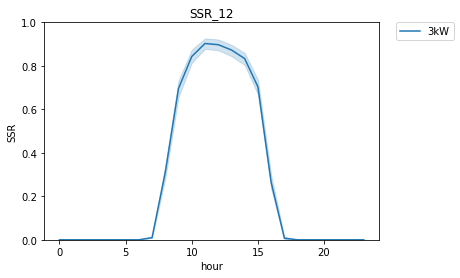

In [157]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_12')
plt.show()

<hr>

### 2022.01

In [158]:
df_all_hour_22_1 = df_all_hour[df_all_hour.ym == '2022/1']

In [159]:
# 총 전력 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   541.0  0.415053  0.259797  0.070068  0.239990  0.360107  0.480103   
     1   540.0  0.380259  0.234227  0.059937  0.220093  0.340088  0.449951   
     2   540.0  0.370964  0.279586  0.059937  0.219971  0.319824  0.419922   
     3   541.0  0.354659  0.216959  0.030029  0.209961  0.319946  0.429932   
     4   538.0  0.349891  0.214953  0.050049  0.209961  0.319824  0.409912   
     5   533.0  0.343145  0.223945  0.040039  0.189941  0.300049  0.409912   
     6   538.0  0.391513  0.412422  0.039917  0.209961  0.330078  0.449951   
     7   538.0  0.454796  0.269974  0.029907  0.282501  0.409912  0.550049   
     8   539.0  0.433970  0.314340  0.020020  0.250000  0.349976  0.510010   
     9   537.0  0.418398  0.598011  0.020020  0.209961  0.310059  0.460205   
     10  540.0  0.421314  0.805443  0.010010  0.190155  0.300049  0.459961   
     11  538.0  0.356708  0.292104  0.020020  0.179932  0.280029  0.430115   
     12  539.0  0.383585  0.568757  0.010010  0.170044  0.280029  0.464966   
     13  537.0  0.358364  0.282015  0.010010  0.180176  0.280029  0.439941   
     14  536.0  0.404815  0.681575  0.019897  0.180176  0.289917  0.422791   
     15  537.0  0.364319  0.323676  0.020020  0.189941  0.290039  0.420166   
     16  538.0  0.418793  0.627197  0.040039  0.199951  0.319824  0.450134   
     17  541.0  0.490890  0.541262  0.020020  0.239990  0.370117  0.550049   
     18  530.0  0.555281  0.476119  0.019897  0.280029  0.430176  0.659912   
     19  536.0  0.580229  0.512320  0.059937  0.310059  0.449951  0.629883   
     20  536.0  0.564359  0.440797  0.099976  0.330078  0.480103  0.630188   
     21  533.0  0.571806  0.665963  0.070068  0.349976  0.479980  0.649902   
     22  539.0  0.516664  0.325917  0.060059  0.309937  0.449951  0.619873   
     23  540.0  0.476421  0.786611  0.099976  0.260010  0.380127  0.530029   
use  0   245.0  0.658685  0.271814  0.189941  0.439941  0.629883  0.830078   
     1   246.0  0.586551  0.210872  0.189941  0.400024  0.579712  0.750000   
     2   245.0  0.574568  0.218443  0.229980  0.409912  0.550049  0.700195   
     3   246.0  0.553027  0.219476  0.209961  0.380127  0.500000  0.700195   
     4   245.0  0.563677  0.370960  0.139893  0.390137  0.510010  0.680176   
     5   246.0  0.541413  0.248664  0.140015  0.352539  0.489990  0.680176   
     6   241.0  0.593811  0.295136  0.189941  0.400024  0.530029  0.770020   
     7   241.0  0.700488  0.407907  0.199951  0.429932  0.589844  0.900146   
     8   241.0  0.798730  0.405760  0.159790  0.490234  0.729980  1.039795   
     9   241.0  0.758732  0.446753  0.089844  0.459717  0.710205  0.959961   
     10  237.0  0.698396  0.474064  0.090088  0.350098  0.639648  0.879883   
     11  241.0  0.693771  0.587616  0.100098  0.339966  0.609863  0.889893   
     12  237.0  0.698666  0.464703  0.079834  0.349976  0.590088  0.940186   
     13  238.0  0.672999  0.423907  0.090088  0.369934  0.590027  0.897461   
     14  238.0  0.644001  0.371921  0.094727  0.392578  0.612366  0.849976   
     15  240.0  0.676692  0.412993  0.070068  0.390137  0.619873  0.899902   
     16  242.0  0.710485  0.886895  0.094971  0.390015  0.609863  0.889648   
     17  240.0  0.811000  0.459333  0.119873  0.509949  0.710144  1.000000   
     18  243.0  0.975458  0.478100  0.209961  0.625000  0.910034  1.189941   
     19  243.0  1.005169  0.753505  0.140137  0.639893  0.930176  1.250000   
     20  243.0  0.915852  0.494830  0.149902  0.600098  0.850098  1.119995   
     21  240.0  0.869903  0.330033  0.260010  0.620056  0.849915  1.072449   
     22  241.0  0.810789  0.292737  0.219971  0.590088  0.800049  0.989990   
     23  243.0  0.764029  0.471441  0.239990  0.515015  0.699951  0.895020   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [160]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   241.0  0.001828  0.003875  0.000000  0.000000  0.000000   
         8   241.0  0.172770  0.140107  0.000000  0.070068  0.139893   
         9   241.0  0.720376  0.419671  0.000000  0.360107  0.699951   
         10  237.0  1.189487  0.547406  0.000000  0.810059  1.260010   
         11  241.0  1.544490  0.660225  0.010010  1.089844  1.779785   
         12  237.0  1.650942  0.629642  0.000000  1.229980  1.860107   
         13  238.0  1.626592  0.683012  0.020020  1.169983  1.820068   
         14  238.0  1.362246  0.631283  0.010010  0.852356  1.550049   
         15  240.0  0.952086  0.603451  0.009766  0.449951  1.010010   
         16  242.0  0.339798  0.552137  0.000000  0.100098  0.229980   
         17  240.0  0.018993  0.028558  0.000000  0.000000  0.010010   
         18  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.000000  0.010010  
         8   0.210205  0.719971  
         9   1.010010  1.649902  
         10  1.629883  2.120117  
         11  2.029785  4.760010  
         12  2.149902  2.439941  
         13  2.119873  4.209961  
         14  1.830017  3.949951  
         15  1.359863  5.250000  
         16  0.457520  7.850098  
         17  0.020020  0.169922  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [161]:
# 총 전력 수출량
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   241.0  0.000035  0.000550  0.0  0.000000  0.000000  0.000000   
         8   241.0  0.014150  0.037053  0.0  0.000000  0.000000  0.010010   
         9   241.0  0.263446  0.266041  0.0  0.049805  0.170044  0.429932   
         10  237.0  0.642367  0.448769  0.0  0.279785  0.609863  1.010010   
         11  241.0  0.957639  0.577409  0.0  0.459961  1.040039  1.399902   
         12  237.0  1.051427  0.592125  0.0  0.579956  1.119873  1.479980   
         13  238.0  1.043403  0.615349  0.0  0.522491  1.174927  1.487488   
         14  238.0  0.823961  0.568669  0.0  0.280029  0.880005  1.237488   
         15  240.0  0.487568  0.464454  0.0  0.107422  0.424927  0.752502   
         16  242.0  0.113739  0.227711  0.0  0.000000  0.019958  0.130066   
         17  240.0  0.000982  0.004933  0.0  0.000000  0.000000  0.000000   
         18  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  240.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  241.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.008545  
         8   0.250000  
         9   1.160156  
         10  1.589844  
         11  2.720215  
         12  2.139893  
         13  3.310059  
         14  3.329834  
         15  3.199951  
         16  2.170044  
         17  0.050049  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [162]:
# 총 그리드 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   541.0  0.415053  0.259797  0.070068  0.239990  0.360107  0.480103   
     1   540.0  0.380259  0.234227  0.059937  0.220093  0.340088  0.449951   
     2   540.0  0.370964  0.279586  0.059937  0.219971  0.319824  0.419922   
     3   541.0  0.354659  0.216959  0.030029  0.209961  0.319946  0.429932   
     4   538.0  0.349891  0.214953  0.050049  0.209961  0.319824  0.409912   
     5   533.0  0.343145  0.223945  0.040039  0.189941  0.300049  0.409912   
     6   538.0  0.391513  0.412422  0.039917  0.209961  0.330078  0.449951   
     7   538.0  0.454796  0.269974  0.029907  0.282501  0.409912  0.550049   
     8   539.0  0.433970  0.314340  0.020020  0.250000  0.349976  0.510010   
     9   537.0  0.418398  0.598011  0.020020  0.209961  0.310059  0.460205   
     10  540.0  0.421314  0.805443  0.010010  0.190155  0.300049  0.459961   
     11  538.0  0.356708  0.292104  0.020020  0.179932  0.280029  0.430115   
     12  539.0  0.383585  0.568757  0.010010  0.170044  0.280029  0.464966   
     13  537.0  0.358364  0.282015  0.010010  0.180176  0.280029  0.439941   
     14  536.0  0.404815  0.681575  0.019897  0.180176  0.289917  0.422791   
     15  537.0  0.364319  0.323676  0.020020  0.189941  0.290039  0.420166   
     16  538.0  0.418793  0.627197  0.040039  0.199951  0.319824  0.450134   
     17  541.0  0.490890  0.541262  0.020020  0.239990  0.370117  0.550049   
     18  530.0  0.555281  0.476119  0.019897  0.280029  0.430176  0.659912   
     19  536.0  0.580229  0.512320  0.059937  0.310059  0.449951  0.629883   
     20  536.0  0.564359  0.440797  0.099976  0.330078  0.480103  0.630188   
     21  533.0  0.571806  0.665963  0.070068  0.349976  0.479980  0.649902   
     22  539.0  0.516664  0.325917  0.060059  0.309937  0.449951  0.619873   
     23  540.0  0.476421  0.786611  0.099976  0.260010  0.380127  0.530029   
use  0   245.0  0.658685  0.271814  0.189941  0.439941  0.629883  0.830078   
     1   246.0  0.586551  0.210872  0.189941  0.400024  0.579712  0.750000   
     2   245.0  0.574568  0.218443  0.229980  0.409912  0.550049  0.700195   
     3   246.0  0.553027  0.219476  0.209961  0.380127  0.500000  0.700195   
     4   245.0  0.563677  0.370960  0.139893  0.390137  0.510010  0.680176   
     5   246.0  0.541413  0.248664  0.140015  0.352539  0.489990  0.680176   
     6   241.0  0.593811  0.295136  0.189941  0.400024  0.530029  0.770020   
     7   241.0  0.698696  0.407918  0.199951  0.420166  0.589844  0.900024   
     8   241.0  0.640111  0.406986  0.059814  0.330078  0.560059  0.839844   
     9   241.0  0.301803  0.388869  0.000000  0.040039  0.149902  0.409912   
     10  237.0  0.151276  0.309025  0.000000  0.000000  0.010254  0.130127   
     11  241.0  0.106919  0.273244  0.000000  0.000000  0.000000  0.060059   
     12  237.0  0.099151  0.229532  0.000000  0.000000  0.000000  0.050049   
     13  238.0  0.089810  0.202073  0.000000  0.000000  0.000000  0.060059   
     14  238.0  0.105715  0.224473  0.000000  0.000000  0.000000  0.080078   
     15  240.0  0.212173  0.322271  0.000000  0.000000  0.040039  0.312531   
     16  242.0  0.484426  0.599958  0.000000  0.129883  0.419922  0.650146   
     17  240.0  0.792989  0.463822  0.090088  0.489990  0.709961  0.979980   
     18  243.0  0.975521  0.478115  0.209961  0.625000  0.910034  1.189941   
     19  243.0  0.966343  0.443722  0.140137  0.639893  0.930176  1.244995   
     20  243.0  0.915884  0.494814  0.149902  0.600098  0.850098  1.119995   
     21  240.0  0.869568  0.329768  0.260010  0.620056  0.849915  1.072449   
     22  241.0  0.810682  0.292629  0.219971  0.590088  0.800049  0.989990   
     23  243.0  0.764029  0.471441  0.239990  0.515015  0.699951  0.895020   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [163]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   241.0  0.182573  0.387120  0.000000  0.000000  0.000000   
         8   241.0  0.911845  0.212837  0.000000  0.933225  1.000000   
         9   241.0  0.695292  0.233212  0.000000  0.539164  0.721181   
         10  237.0  0.519619  0.263200  0.000000  0.313989  0.485770   
         11  241.0  0.438333  0.262217  0.058880  0.232306  0.393543   
         12  237.0  0.413649  0.252579  0.000000  0.214905  0.360539   
         13  238.0  0.418191  0.248219  0.048172  0.228001  0.361917   
         14  238.0  0.476482  0.266379  0.055723  0.272598  0.412999   
         15  240.0  0.591753  0.273723  0.054740  0.373466  0.587595   
         16  242.0  0.802131  0.247881  0.000000  0.654468  0.912735   
         17  240.0  0.627174  0.474318  0.000000  0.000000  1.000000   
         18  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   0.000000  1.0  
         8   1.000000  1.0  
         9   0.889040  1.0  
         10  0.697003  1.0  
         11  0.576276  1.0  
         12  0.568734  1.0  
         13  0.561546  1.0  
         14  0.643873  1.0  
         15  0.817619  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [164]:
# SSR(자가공급률)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   241.0  0.003410  0.008192  0.000000  0.000000  0.000000   
         8   241.0  0.233899  0.171895  0.000000  0.105211  0.190846   
         9   241.0  0.676360  0.277328  0.000000  0.474534  0.746084   
         10  237.0  0.855154  0.239593  0.000000  0.804352  0.971389   
         11  241.0  0.901270  0.199298  0.016680  0.898246  1.000000   
         12  237.0  0.908997  0.195343  0.000000  0.918535  1.000000   
         13  238.0  0.910837  0.184646  0.021299  0.920535  1.000000   
         14  238.0  0.884245  0.218242  0.012059  0.894829  1.000000   
         15  240.0  0.762666  0.288364  0.014583  0.548174  0.931170   
         16  242.0  0.410222  0.307141  0.000000  0.158780  0.343018   
         17  240.0  0.033930  0.058074  0.000000  0.000000  0.014250   
         18  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.000000  0.043524  
         8   0.325575  0.793597  
         9   0.898179  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.653696  1.000000  
         17  0.040174  0.375229  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

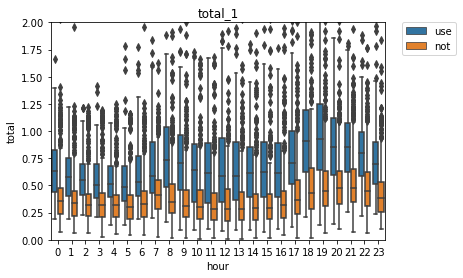

In [165]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

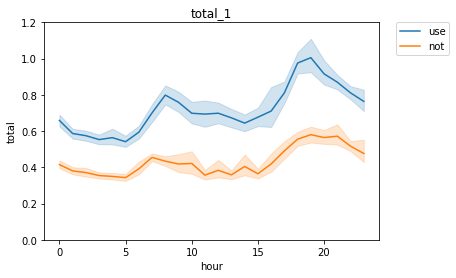

In [166]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

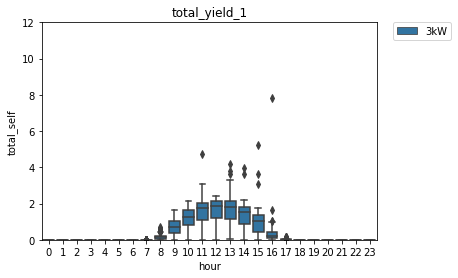

In [167]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

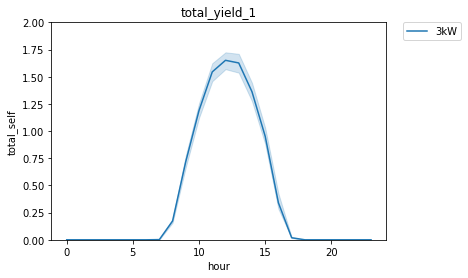

In [168]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

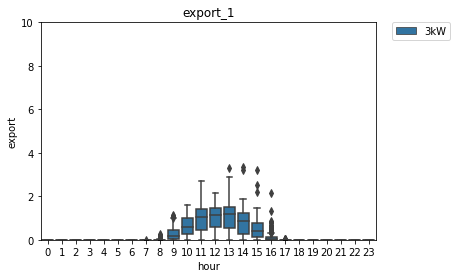

In [169]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

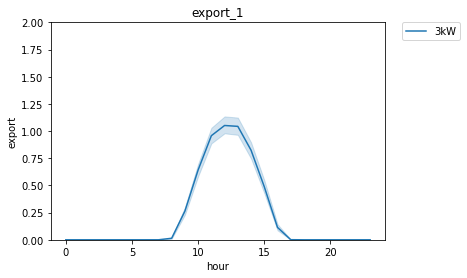

In [170]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

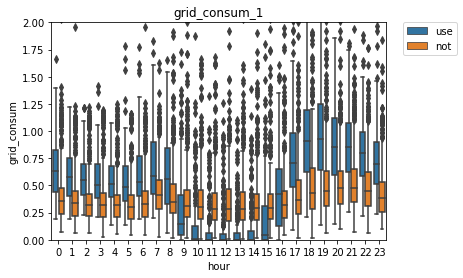

In [171]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

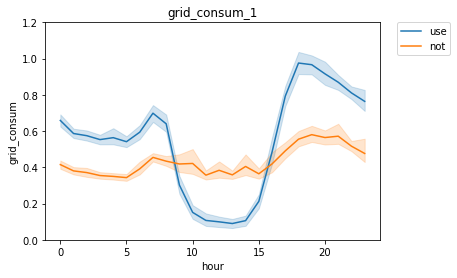

In [172]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

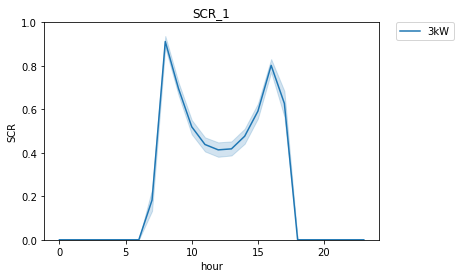

In [173]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_1')
plt.show()

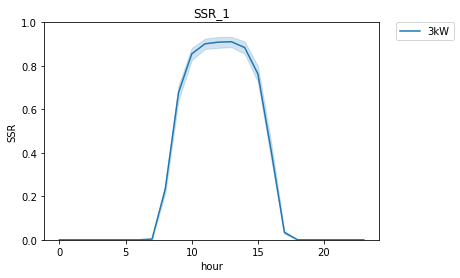

In [174]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_1')
plt.show()

<hr>

### 2022.02

In [175]:
df_all_hour_22_2 = df_all_hour[df_all_hour.ym == '2022/2']

In [176]:
# 총 전력 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['전력소비량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   490.0  0.409492  0.222510  0.099854  0.250000  0.370117  0.479980   
     1   491.0  0.382240  0.225807  0.070068  0.229980  0.339844  0.445068   
     2   490.0  0.366854  0.223065  0.079834  0.220123  0.320068  0.429932   
     3   492.0  0.367200  0.245970  0.039917  0.219971  0.320312  0.429932   
     4   494.0  0.377420  0.433317  0.089966  0.212646  0.310059  0.430176   
     5   491.0  0.366193  0.242044  0.029907  0.200012  0.319824  0.440186   
     6   493.0  0.389777  0.258982  0.020020  0.219971  0.339844  0.469971   
     7   493.0  0.493326  0.623652  0.020020  0.280029  0.410156  0.550049   
     8   491.0  0.484600  0.841782  0.060059  0.250000  0.359863  0.500000   
     9   494.0  0.425995  0.418667  0.020020  0.229980  0.329834  0.489990   
     10  497.0  0.428692  0.662550  0.049927  0.209961  0.309814  0.439941   
     11  497.0  0.393969  0.389973  0.020020  0.190063  0.300049  0.450195   
     12  492.0  0.388524  0.330314  0.020020  0.189941  0.300049  0.452637   
     13  494.0  0.383872  0.329570  0.049927  0.189941  0.290039  0.450195   
     14  490.0  0.378254  0.330973  0.049927  0.199951  0.300049  0.449951   
     15  493.0  0.371586  0.308480  0.030029  0.200195  0.310059  0.439941   
     16  492.0  0.395096  0.358878  0.039917  0.200165  0.320068  0.469971   
     17  489.0  0.474275  0.471643  0.019897  0.220093  0.350098  0.530029   
     18  486.0  0.566856  0.552693  0.020020  0.262451  0.410156  0.600098   
     19  488.0  0.653771  0.790148  0.099976  0.320068  0.459961  0.692627   
     20  492.0  0.616706  0.492129  0.099976  0.349976  0.479980  0.672607   
     21  489.0  0.604294  0.463099  0.109863  0.360107  0.489990  0.649902   
     22  494.0  0.534187  0.409047  0.099976  0.320068  0.459961  0.617432   
     23  495.0  0.462149  0.260331  0.089966  0.280029  0.410156  0.539917   
use  0   218.0  0.607950  0.230751  0.140015  0.422516  0.589966  0.787231   
     1   220.0  0.556082  0.219521  0.160400  0.380005  0.520020  0.690002   
     2   221.0  0.518568  0.209497  0.160400  0.360107  0.489990  0.630371   
     3   220.0  0.489117  0.173085  0.160400  0.360046  0.459961  0.570129   
     4   222.0  0.499550  0.175209  0.149902  0.370026  0.479980  0.597290   
     5   221.0  0.494496  0.194113  0.160400  0.360107  0.469971  0.569824   
     6   217.0  0.513953  0.206880  0.160645  0.370117  0.479980  0.630371   
     7   215.0  0.657472  0.824647  0.160645  0.409851  0.520020  0.744995   
     8   221.0  0.742052  0.368065  0.180176  0.469971  0.659912  0.939819   
     9   218.0  0.763451  0.540444  0.090088  0.439941  0.690063  0.997620   
     10  218.0  0.673965  0.426858  0.109863  0.340149  0.640015  0.880066   
     11  215.0  0.610535  0.372796  0.090088  0.290039  0.579834  0.825073   
     12  219.0  0.576567  0.324903  0.090088  0.324829  0.530396  0.794983   
     13  218.0  0.600620  0.338410  0.100342  0.359924  0.539673  0.827484   
     14  219.0  0.588000  0.388903  0.109863  0.354736  0.520020  0.759888   
     15  221.0  0.555341  0.290345  0.070068  0.329834  0.500000  0.760132   
     16  221.0  0.584157  0.360740  0.099854  0.330078  0.520020  0.760010   
     17  222.0  0.687517  0.385400  0.169922  0.449982  0.619873  0.870117   
     18  220.0  0.834088  0.355740  0.199951  0.570038  0.779907  1.032715   
     19  220.0  0.865728  0.375321  0.280029  0.580078  0.760010  1.122559   
     20  222.0  0.796698  0.357476  0.270020  0.549866  0.739868  0.977722   
     21  220.0  0.763479  0.311001  0.229980  0.550049  0.719971  0.939941   
     22  222.0  0.730387  0.315222  0.164795  0.500000  0.669922  0.949890   
     23  219.0  0.672004  0.254529  0.160400  0.484985  0.640137  0.859863   

               max  
type 시간             
not  0    1.170410  
     1    2.080078  
     2    2.120117  
   

In [177]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   218.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   217.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   215.0  0.031638  0.044294  0.000000  0.010010  0.020020   
         8   221.0  0.352520  0.233807  0.000000  0.189941  0.300049   
         9   218.0  0.945379  0.451515  0.000000  0.622620  0.920044   
         10  218.0  1.440015  0.565981  0.010010  1.055054  1.479980   
         11  215.0  1.749680  0.644767  0.000000  1.424927  1.870117   
         12  219.0  1.872280  0.664657  0.020020  1.525024  2.020020   
         13  218.0  1.787077  0.621175  0.019775  1.327576  1.989990   
         14  219.0  1.584931  0.745673  0.010010  1.104858  1.719971   
         15  221.0  1.173658  0.829617  0.000000  0.689941  1.250000   
         16  221.0  0.570997  0.384755  0.000000  0.260010  0.479980   
         17  222.0  0.149471  0.523119  0.000000  0.042480  0.080078   
         18  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  219.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.000000  
         7   0.035156   0.290039  
         8   0.439941   1.119873  
         9   1.287354   1.940186  
         10  1.840088   3.520020  
         11  2.189941   4.779785  
         12  2.330078   4.949951  
         13  2.239929   3.820068  
         14  2.030029   8.030029  
         15  1.540039  10.969971  
         16  0.870117   2.940186  
         17  0.140076   7.679932  
         18  0.000000   0.000000  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [178]:
# 총 전력 수출량
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   218.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   221.0  0.000296  0.004401  0.0  0.000000  0.000000  0.000000   
         6   217.0  0.000302  0.004442  0.0  0.000000  0.000000  0.000000   
         7   215.0  0.001932  0.010537  0.0  0.000000  0.000000  0.000000   
         8   221.0  0.064421  0.113858  0.0  0.000000  0.010010  0.069824   
         9   218.0  0.430508  0.363197  0.0  0.120117  0.350037  0.697510   
         10  218.0  0.871651  0.544646  0.0  0.439941  0.859924  1.272522   
         11  215.0  1.206162  0.633884  0.0  0.819946  1.260010  1.619873   
         12  219.0  1.343795  0.643867  0.0  0.979980  1.440063  1.779907   
         13  218.0  1.232561  0.607514  0.0  0.804993  1.345032  1.697510   
         14  219.0  1.045003  0.613998  0.0  0.540039  1.120117  1.464966   
         15  221.0  0.703625  0.752881  0.0  0.260010  0.649902  1.040039   
         16  221.0  0.243033  0.305577  0.0  0.010010  0.119873  0.410156   
         17  222.0  0.044451  0.348653  0.0  0.000000  0.000000  0.010010   
         18  220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  222.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  222.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.065430  
         6   0.065430  
         7   0.089844  
         8   0.620117  
         9   1.369873  
         10  3.010010  
         11  4.130127  
         12  4.089844  
         13  3.559814  
         14  4.294922  
         15  9.610107  
         16  2.250000  
         17  5.099976  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [179]:
# 총 그리드 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['수전전력량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   490.0  0.409492  0.222510  0.099854  0.250000  0.370117  0.479980   
     1   491.0  0.382240  0.225807  0.070068  0.229980  0.339844  0.445068   
     2   490.0  0.366854  0.223065  0.079834  0.220123  0.320068  0.429932   
     3   492.0  0.367200  0.245970  0.039917  0.219971  0.320312  0.429932   
     4   494.0  0.377420  0.433317  0.089966  0.212646  0.310059  0.430176   
     5   491.0  0.366193  0.242044  0.029907  0.200012  0.319824  0.440186   
     6   493.0  0.389777  0.258982  0.020020  0.219971  0.339844  0.469971   
     7   493.0  0.493326  0.623652  0.020020  0.280029  0.410156  0.550049   
     8   491.0  0.484600  0.841782  0.060059  0.250000  0.359863  0.500000   
     9   494.0  0.425995  0.418667  0.020020  0.229980  0.329834  0.489990   
     10  497.0  0.428692  0.662550  0.049927  0.209961  0.309814  0.439941   
     11  497.0  0.393969  0.389973  0.020020  0.190063  0.300049  0.450195   
     12  492.0  0.388524  0.330314  0.020020  0.189941  0.300049  0.452637   
     13  494.0  0.383872  0.329570  0.049927  0.189941  0.290039  0.450195   
     14  490.0  0.378254  0.330973  0.049927  0.199951  0.300049  0.449951   
     15  493.0  0.371586  0.308480  0.030029  0.200195  0.310059  0.439941   
     16  492.0  0.395096  0.358878  0.039917  0.200165  0.320068  0.469971   
     17  489.0  0.474275  0.471643  0.019897  0.220093  0.350098  0.530029   
     18  486.0  0.566856  0.552693  0.020020  0.262451  0.410156  0.600098   
     19  488.0  0.653771  0.790148  0.099976  0.320068  0.459961  0.692627   
     20  492.0  0.616706  0.492129  0.099976  0.349976  0.479980  0.672607   
     21  489.0  0.604294  0.463099  0.109863  0.360107  0.489990  0.649902   
     22  494.0  0.534187  0.409047  0.099976  0.320068  0.459961  0.617432   
     23  495.0  0.462149  0.260331  0.089966  0.280029  0.410156  0.539917   
use  0   218.0  0.608249  0.230210  0.140015  0.422516  0.589966  0.787231   
     1   220.0  0.556380  0.219026  0.169922  0.380005  0.520020  0.690002   
     2   221.0  0.518864  0.209035  0.169922  0.360107  0.489990  0.630371   
     3   220.0  0.489414  0.172573  0.170166  0.360046  0.459961  0.570129   
     4   222.0  0.499845  0.174690  0.149902  0.370026  0.479980  0.597290   
     5   221.0  0.494792  0.193650  0.179932  0.360107  0.469971  0.569824   
     6   217.0  0.514254  0.206410  0.170044  0.370117  0.479980  0.630371   
     7   215.0  0.627766  0.825470  0.149902  0.380066  0.489990  0.719971   
     8   221.0  0.453952  0.382073  0.000000  0.170166  0.350098  0.629883   
     9   218.0  0.248580  0.476103  0.000000  0.010010  0.080017  0.340027   
     10  218.0  0.105600  0.227823  0.000000  0.000000  0.009766  0.090210   
     11  215.0  0.067017  0.184554  0.000000  0.000000  0.000000  0.020020   
     12  219.0  0.048081  0.146523  0.000000  0.000000  0.000000  0.015137   
     13  218.0  0.046105  0.127340  0.000000  0.000000  0.000000  0.020020   
     14  219.0  0.048072  0.126752  0.000000  0.000000  0.000000  0.029785   
     15  221.0  0.085308  0.161205  0.000000  0.000000  0.010254  0.100098   
     16  221.0  0.256193  0.338638  0.000000  0.020020  0.140137  0.350098   
     17  222.0  0.582496  0.368010  0.030029  0.330078  0.534912  0.780151   
     18  220.0  0.834088  0.355740  0.199951  0.570038  0.779907  1.032715   
     19  220.0  0.865728  0.375321  0.280029  0.580078  0.760010  1.122559   
     20  222.0  0.796698  0.357476  0.270020  0.549866  0.739868  0.977722   
     21  220.0  0.763479  0.311001  0.229980  0.550049  0.719971  0.939941   
     22  222.0  0.730672  0.314737  0.228027  0.500000  0.669922  0.949890   
     23  219.0  0.672303  0.253964  0.189941  0.484985  0.640137  0.859863   

               max  
type 시간             
not  0    1.170410  
     1    2.080078  
     2    2.120117  
   

In [180]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   218.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   217.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   215.0  0.773153  0.412536  0.000000  0.865914  1.000000   
         8   221.0  0.851894  0.211963  0.000000  0.782378  0.935433   
         9   218.0  0.606780  0.264168  0.000000  0.391982  0.614947   
         10  218.0  0.449619  0.258634  0.052570  0.235737  0.421248   
         11  215.0  0.355528  0.234638  0.000000  0.172106  0.317059   
         12  219.0  0.326461  0.212147  0.057746  0.163576  0.285142   
         13  218.0  0.354377  0.221313  0.054932  0.190963  0.313679   
         14  219.0  0.390109  0.225096  0.060040  0.223372  0.336657   
         15  221.0  0.480365  0.248208  0.000000  0.258189  0.468052   
         16  221.0  0.695390  0.279167  0.000000  0.482481  0.755952   
         17  222.0  0.901043  0.213900  0.000000  0.905067  1.000000   
         18  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  219.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.842025  1.0  
         10  0.622594  1.0  
         11  0.460951  1.0  
         12  0.424576  1.0  
         13  0.451278  1.0  
         14  0.515763  1.0  
         15  0.647868  1.0  
         16  0.958291  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [181]:
# SSR(자가공급률)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   218.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   217.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   215.0  0.055470  0.073145  0.000000  0.009361  0.033926   
         8   221.0  0.456750  0.258407  0.000000  0.268719  0.404651   
         9   218.0  0.772434  0.259474  0.000000  0.648173  0.863036   
         10  218.0  0.896128  0.199177  0.010998  0.889690  0.990223   
         11  215.0  0.935658  0.174043  0.000000  0.975430  1.000000   
         12  219.0  0.946707  0.143390  0.033940  0.975583  1.000000   
         13  218.0  0.948580  0.132034  0.036635  0.961948  1.000000   
         14  219.0  0.941511  0.131840  0.008936  0.947618  1.000000   
         15  221.0  0.880292  0.184285  0.000000  0.819824  0.974969   
         16  221.0  0.658859  0.291966  0.000000  0.416794  0.714369   
         17  222.0  0.192233  0.191701  0.000000  0.060968  0.126423   
         18  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  219.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.071480  0.452787  
         8   0.647614  1.000000  
         9   0.973348  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.949939  1.000000  
         17  0.238904  0.872671  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

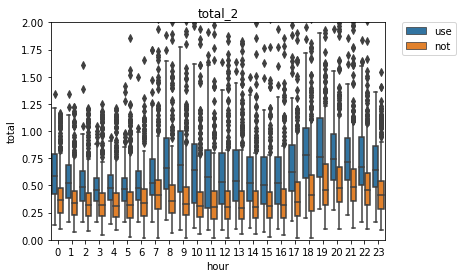

In [182]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_2')
plt.show()

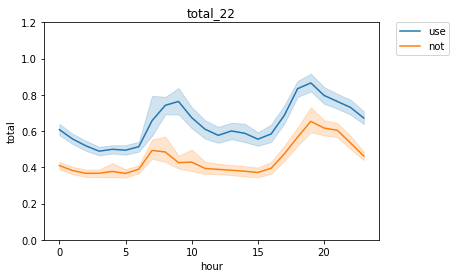

In [183]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_22')
plt.show()

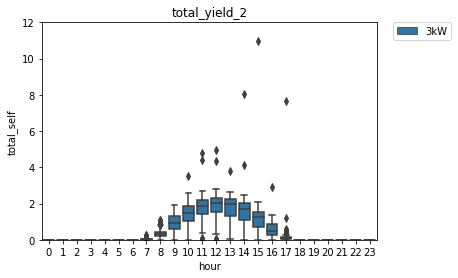

In [184]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

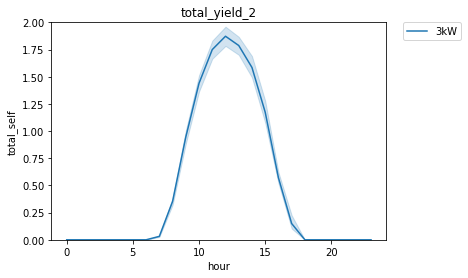

In [185]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

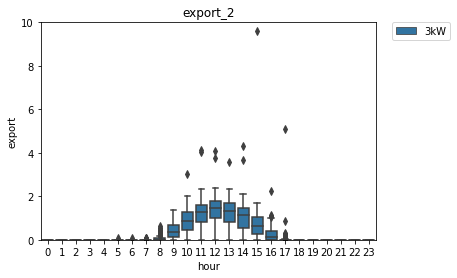

In [186]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

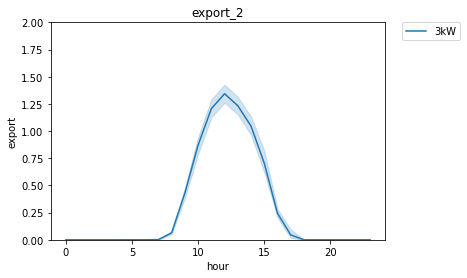

In [187]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

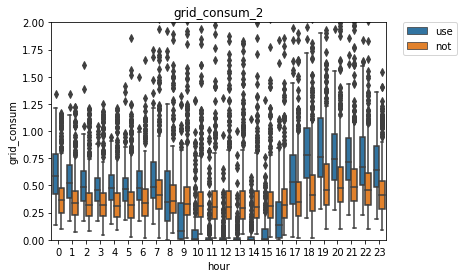

In [188]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

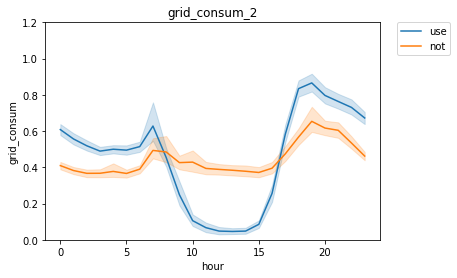

In [189]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

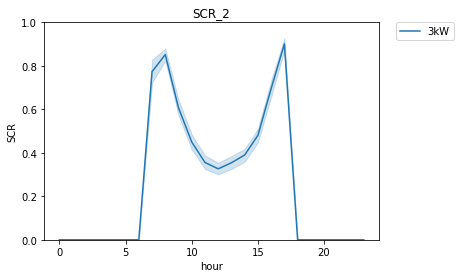

In [190]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_2')
plt.show()

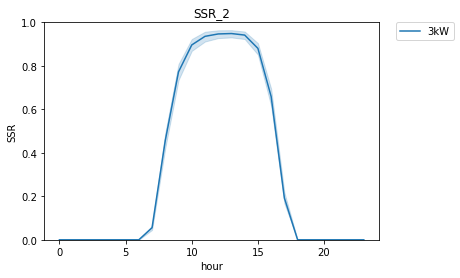

In [191]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_2')
plt.show()

<hr>

### 2022.03

In [192]:
df_all_hour_22_3 = df_all_hour[df_all_hour.ym == '2022/3']

In [193]:
# 총 전력 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   511.0  0.378879  0.373469  0.079834  0.209961  0.330078  0.439941   
     1   513.0  0.341659  0.230773  0.059937  0.199951  0.300049  0.399902   
     2   513.0  0.338154  0.301088  0.059937  0.199951  0.290039  0.390137   
     3   516.0  0.325527  0.225087  0.020020  0.189941  0.280029  0.389893   
     4   517.0  0.323115  0.219471  0.069946  0.180054  0.280029  0.380127   
     5   513.0  0.331498  0.266168  0.040039  0.180176  0.290039  0.399902   
     6   515.0  0.392923  0.659524  0.020020  0.209961  0.310059  0.445068   
     7   518.0  0.407259  0.223520  0.010010  0.270020  0.369934  0.500000   
     8   522.0  0.357239  0.239117  0.010010  0.209961  0.300049  0.429932   
     9   522.0  0.340614  0.634182  0.020020  0.179993  0.270020  0.390076   
     10  523.0  0.303511  0.210856  0.020020  0.169922  0.260010  0.385010   
     11  522.0  0.292305  0.201728  0.020020  0.149902  0.250000  0.380127   
     12  519.0  0.321580  0.467295  0.029907  0.160156  0.259766  0.380005   
     13  522.0  0.297309  0.209378  0.039917  0.159912  0.250000  0.379883   
     14  517.0  0.305244  0.264350  0.020020  0.159912  0.250000  0.369873   
     15  518.0  0.309163  0.317877  0.019897  0.160065  0.260010  0.350098   
     16  516.0  0.325378  0.288263  0.020020  0.179932  0.270020  0.370117   
     17  512.0  0.389927  0.408853  0.020020  0.199951  0.280029  0.450195   
     18  512.0  0.459915  0.411807  0.020020  0.229980  0.350098  0.550049   
     19  513.0  0.580802  1.240528  0.040039  0.280029  0.410034  0.570068   
     20  512.0  0.545724  0.444678  0.040039  0.310059  0.449951  0.580078   
     21  511.0  0.527417  0.453881  0.109985  0.334961  0.449951  0.595093   
     22  515.0  0.476295  0.309810  0.080078  0.290039  0.429932  0.569946   
     23  512.0  0.407517  0.262229  0.050049  0.239990  0.370117  0.489990   
use  0   245.0  0.539429  0.349961  0.149902  0.339966  0.479980  0.669922   
     1   243.0  0.491233  0.248890  0.140137  0.320068  0.459961  0.604980   
     2   246.0  0.456546  0.201354  0.139893  0.309937  0.439941  0.570251   
     3   244.0  0.429302  0.158122  0.140137  0.300049  0.420166  0.540039   
     4   242.0  0.433676  0.171819  0.140015  0.299957  0.430176  0.549805   
     5   246.0  0.424583  0.174617  0.149902  0.282532  0.409912  0.537170   
     6   242.0  0.468077  0.260528  0.140137  0.279816  0.449829  0.580078   
     7   244.0  0.616832  0.397787  0.149902  0.370087  0.530090  0.730042   
     8   243.0  0.639015  0.311865  0.140137  0.399902  0.600098  0.780029   
     9   243.0  0.534767  0.299239  0.080078  0.315186  0.479980  0.705078   
     10  241.0  0.468756  0.275766  0.079834  0.249756  0.400391  0.629639   
     11  242.0  0.446136  0.281726  0.070068  0.239807  0.389893  0.587219   
     12  243.0  0.516084  0.636774  0.119873  0.250122  0.399902  0.640137   
     13  243.0  0.468020  0.277118  0.060059  0.255127  0.400146  0.614868   
     14  245.0  0.455462  0.253511  0.120117  0.260010  0.399902  0.580078   
     15  241.0  0.455237  0.261732  0.089844  0.259766  0.389893  0.570068   
     16  241.0  0.487745  0.271665  0.090088  0.290039  0.439941  0.620117   
     17  243.0  0.558751  0.294611  0.109985  0.345215  0.490234  0.714844   
     18  243.0  0.732289  0.315294  0.150146  0.500122  0.689941  0.895020   
     19  243.0  0.756043  0.348846  0.169922  0.470093  0.679932  0.949951   
     20  244.0  0.725928  0.346173  0.159912  0.440033  0.640015  0.959961   
     21  244.0  0.692579  0.351240  0.160156  0.447510  0.629883  0.882690   
     22  242.0  0.657627  0.316011  0.199951  0.422455  0.595093  0.827576   
     23  244.0  0.585324  0.299814  0.159912  0.350067  0.530029  0.742493   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [194]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   242.0  0.004167  0.012157  0.000000  0.000000  0.000000   
         7   244.0  0.125262  0.135578  0.000000  0.030029  0.089844   
         8   243.0  0.471140  0.350991  0.000000  0.209961  0.419922   
         9   243.0  0.921183  0.584837  0.000000  0.390137  0.929932   
         10  241.0  1.263349  0.725215  0.000000  0.590088  1.370117   
         11  242.0  1.519527  0.878815  0.000000  0.682617  1.695068   
         12  243.0  1.623097  0.822400  0.020020  0.839966  1.859863   
         13  243.0  1.529422  0.806771  0.009766  0.760010  1.790039   
         14  245.0  1.377268  0.758376  0.000000  0.640137  1.590332   
         15  241.0  1.053294  0.620815  0.009766  0.479980  1.180176   
         16  241.0  0.664638  0.471917  0.009766  0.280029  0.609863   
         17  243.0  0.209441  0.160575  0.000000  0.084961  0.179932   
         18  243.0  0.011894  0.015544  0.000000  0.000000  0.009766   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.109863  
         7   0.169922  0.890137  
         8   0.684937  1.700195  
         9   1.370117  2.240234  
         10  1.879883  2.700195  
         11  2.167480  6.339844  
         12  2.279907  3.689941  
         13  2.265137  2.754883  
         14  2.029785  3.699951  
         15  1.609863  2.350098  
         16  1.010254  3.290039  
         17  0.310059  0.810059  
         18  0.020020  0.089844  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [195]:
# 총 전력 수출량
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   242.0  0.000041  0.000643  0.0  0.000000  0.000000  0.000000   
         7   244.0  0.011763  0.044523  0.0  0.000000  0.000000  0.000000   
         8   243.0  0.151614  0.216771  0.0  0.000000  0.059814  0.239990   
         9   243.0  0.535544  0.497672  0.0  0.054993  0.449951  0.895020   
         10  241.0  0.879812  0.665503  0.0  0.219971  0.830078  1.469971   
         11  242.0  1.133927  0.814168  0.0  0.362366  1.135132  1.780029   
         12  243.0  1.213320  0.790311  0.0  0.475098  1.329834  1.840088   
         13  243.0  1.129009  0.764084  0.0  0.369995  1.239990  1.784973   
         14  245.0  0.990084  0.718952  0.0  0.229980  1.100098  1.639893   
         15  241.0  0.692498  0.582578  0.0  0.110107  0.649902  1.179932   
         16  241.0  0.350578  0.398676  0.0  0.010010  0.200195  0.590088   
         17  243.0  0.047946  0.086595  0.0  0.000000  0.000000  0.060059   
         18  243.0  0.000124  0.001108  0.0  0.000000  0.000000  0.000000   
         19  243.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.010010  
         7   0.409912  
         8   1.189941  
         9   1.880127  
         10  2.229980  
         11  4.829834  
         12  3.020020  
         13  2.550049  
         14  3.060059  
         15  2.130127  
         16  2.330078  
         17  0.429932  
         18  0.010010  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [196]:
# 총 그리드 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   511.0  0.378879  0.373469  0.079834  0.209961  0.330078  0.439941   
     1   513.0  0.341659  0.230773  0.059937  0.199951  0.300049  0.399902   
     2   513.0  0.338154  0.301088  0.059937  0.199951  0.290039  0.390137   
     3   516.0  0.325527  0.225087  0.020020  0.189941  0.280029  0.389893   
     4   517.0  0.323115  0.219471  0.069946  0.180054  0.280029  0.380127   
     5   513.0  0.331498  0.266168  0.040039  0.180176  0.290039  0.399902   
     6   515.0  0.392923  0.659524  0.020020  0.209961  0.310059  0.445068   
     7   518.0  0.407259  0.223520  0.010010  0.270020  0.369934  0.500000   
     8   522.0  0.357239  0.239117  0.010010  0.209961  0.300049  0.429932   
     9   522.0  0.340614  0.634182  0.020020  0.179993  0.270020  0.390076   
     10  523.0  0.303511  0.210856  0.020020  0.169922  0.260010  0.385010   
     11  522.0  0.292305  0.201728  0.020020  0.149902  0.250000  0.380127   
     12  519.0  0.321580  0.467295  0.029907  0.160156  0.259766  0.380005   
     13  522.0  0.297309  0.209378  0.039917  0.159912  0.250000  0.379883   
     14  517.0  0.305244  0.264350  0.020020  0.159912  0.250000  0.369873   
     15  518.0  0.309163  0.317877  0.019897  0.160065  0.260010  0.350098   
     16  516.0  0.325378  0.288263  0.020020  0.179932  0.270020  0.370117   
     17  512.0  0.389927  0.408853  0.020020  0.199951  0.280029  0.450195   
     18  512.0  0.459915  0.411807  0.020020  0.229980  0.350098  0.550049   
     19  513.0  0.580802  1.240528  0.040039  0.280029  0.410034  0.570068   
     20  512.0  0.545724  0.444678  0.040039  0.310059  0.449951  0.580078   
     21  511.0  0.527417  0.453881  0.109985  0.334961  0.449951  0.595093   
     22  515.0  0.476295  0.309810  0.080078  0.290039  0.429932  0.569946   
     23  512.0  0.407517  0.262229  0.050049  0.239990  0.370117  0.489990   
use  0   245.0  0.539429  0.349961  0.149902  0.339966  0.479980  0.669922   
     1   243.0  0.491233  0.248890  0.140137  0.320068  0.459961  0.604980   
     2   246.0  0.456546  0.201354  0.139893  0.309937  0.439941  0.570251   
     3   244.0  0.429302  0.158122  0.140137  0.300049  0.420166  0.540039   
     4   242.0  0.433676  0.171819  0.140015  0.299957  0.430176  0.549805   
     5   246.0  0.424583  0.174617  0.149902  0.282532  0.409912  0.537170   
     6   242.0  0.463952  0.260017  0.140137  0.272491  0.449707  0.580078   
     7   244.0  0.503332  0.402623  0.040039  0.250000  0.400146  0.602539   
     8   243.0  0.319489  0.319861  0.000000  0.064941  0.229980  0.460083   
     9   243.0  0.149128  0.257097  0.000000  0.000000  0.029785  0.190186   
     10  241.0  0.085219  0.185656  0.000000  0.000000  0.000000  0.040039   
     11  242.0  0.060536  0.150034  0.000000  0.000000  0.000000  0.020020   
     12  243.0  0.106307  0.530612  0.000000  0.000000  0.000000  0.040039   
     13  243.0  0.067606  0.181356  0.000000  0.000000  0.000000  0.030151   
     14  245.0  0.068278  0.153427  0.000000  0.000000  0.000000  0.040039   
     15  241.0  0.094441  0.189168  0.000000  0.000000  0.009766  0.080078   
     16  241.0  0.173685  0.247701  0.000000  0.000000  0.050293  0.270020   
     17  243.0  0.397257  0.305644  0.000000  0.149902  0.340088  0.579956   
     18  243.0  0.720519  0.318213  0.150146  0.495117  0.689941  0.877752   
     19  243.0  0.756043  0.348846  0.169922  0.470093  0.679932  0.949951   
     20  244.0  0.725928  0.346173  0.159912  0.440033  0.640015  0.959961   
     21  244.0  0.692579  0.351240  0.160156  0.447510  0.629883  0.882690   
     22  242.0  0.657627  0.316011  0.199951  0.422455  0.595093  0.827576   
     23  244.0  0.585324  0.299814  0.159912  0.350067  0.530029  0.742493   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [197]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   242.0  0.206235  0.405016  0.000000  0.000000  0.000000   
         7   244.0  0.840744  0.327060  0.000000  0.893098  1.000000   
         8   243.0  0.758111  0.252479  0.000000  0.579718  0.833333   
         9   243.0  0.554636  0.303498  0.000000  0.282599  0.500530   
         10  241.0  0.426915  0.301366  0.000000  0.179845  0.338147   
         11  242.0  0.368453  0.287967  0.000000  0.138813  0.285365   
         12  243.0  0.366629  0.285402  0.049387  0.138803  0.273066   
         13  243.0  0.385096  0.288552  0.030180  0.151062  0.301328   
         14  245.0  0.411839  0.297368  0.000000  0.165760  0.325784   
         15  241.0  0.494358  0.306894  0.059896  0.219037  0.425774   
         16  241.0  0.638220  0.299841  0.085170  0.368705  0.665761   
         17  243.0  0.828688  0.257727  0.000000  0.739287  0.971409   
         18  243.0  0.578399  0.493384  0.000000  0.000000  1.000000   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  1.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.845296  1.0  
         10  0.622017  1.0  
         11  0.507211  1.0  
         12  0.498610  1.0  
         13  0.515268  1.0  
         14  0.598860  1.0  
         15  0.755157  1.0  
         16  0.964223  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [198]:
# SSR(자가공급률)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   242.0  0.009305  0.025208  0.000000  0.000000  0.000000   
         7   244.0  0.220147  0.201833  0.000000  0.046501  0.181330   
         8   243.0  0.560036  0.319055  0.000000  0.296522  0.589671   
         9   243.0  0.784338  0.296287  0.000000  0.673127  0.945853   
         10  241.0  0.869358  0.251114  0.000000  0.885555  1.000000   
         11  242.0  0.901347  0.218673  0.000000  0.949893  1.000000   
         12  243.0  0.897106  0.223825  0.053385  0.936527  1.000000   
         13  243.0  0.896219  0.215744  0.011778  0.923149  1.000000   
         14  245.0  0.883291  0.229803  0.000000  0.897653  1.000000   
         15  241.0  0.841830  0.260552  0.027913  0.787722  0.988898   
         16  241.0  0.719053  0.321832  0.018198  0.447301  0.863092   
         17  243.0  0.365560  0.267620  0.000000  0.117691  0.316855   
         18  243.0  0.020357  0.029066  0.000000  0.000000  0.012511   
         19  243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  244.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.204218  
         7   0.335002  0.833164  
         8   0.853107  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.558777  1.000000  
         18  0.027636  0.171862  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

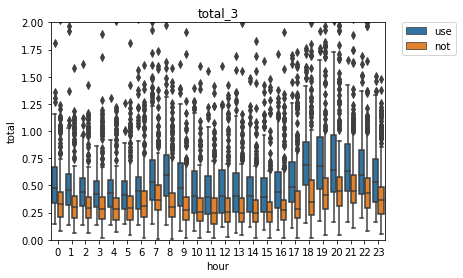

In [199]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

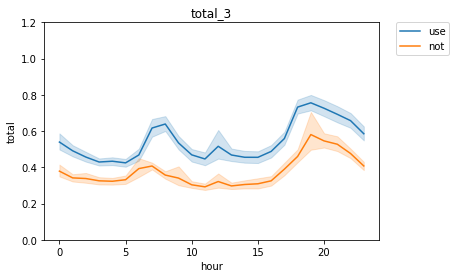

In [200]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

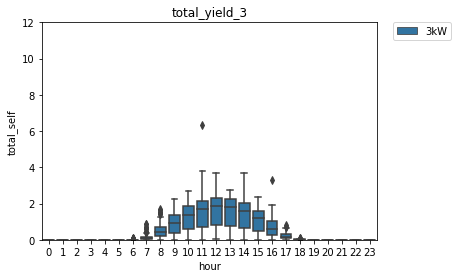

In [201]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

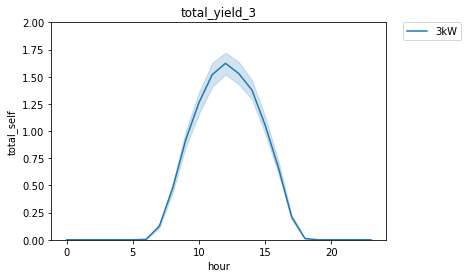

In [202]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

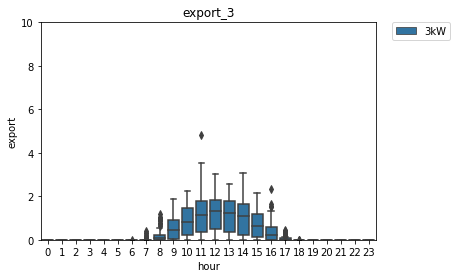

In [203]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

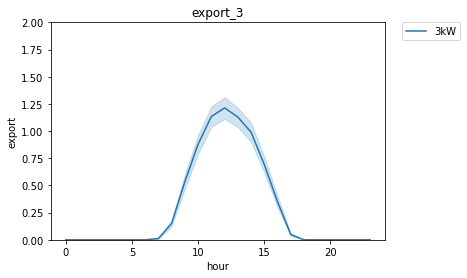

In [204]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

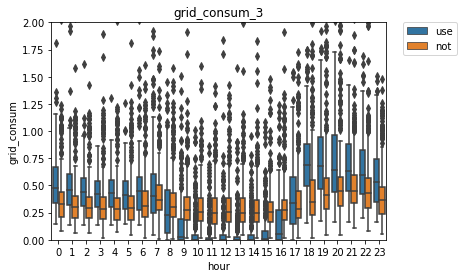

In [205]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

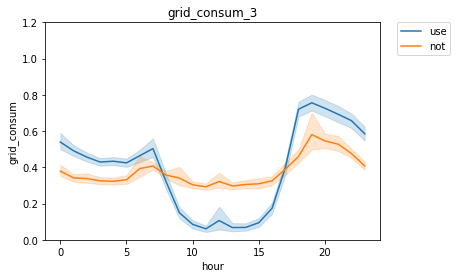

In [206]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

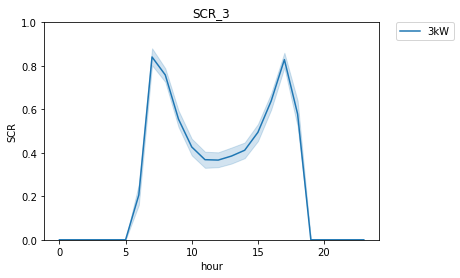

In [207]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_3')
plt.show()

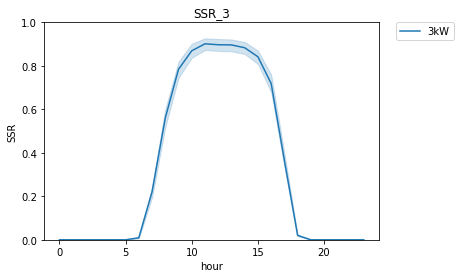

In [208]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_3')
plt.show()

<hr>

### 2022.04

In [209]:
df_all_hour_22_4 = df_all_hour[df_all_hour.ym == '2022/4']

In [210]:
# 총 전력 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   486.0  0.328102  0.215158  0.040039  0.189941  0.279785  0.399902   
     1   492.0  0.354345  0.550788  0.049927  0.189941  0.260010  0.369629   
     2   492.0  0.303512  0.206978  0.050049  0.180176  0.260010  0.359863   
     3   488.0  0.295957  0.214842  0.030029  0.179932  0.250000  0.349670   
     4   492.0  0.298408  0.229734  0.039917  0.179932  0.250000  0.342529   
     5   491.0  0.307269  0.297143  0.040039  0.175049  0.250000  0.350098   
     6   489.0  0.345353  0.207400  0.020020  0.219971  0.290039  0.410156   
     7   488.0  0.388524  0.283686  0.029907  0.240173  0.340088  0.459961   
     8   492.0  0.338577  0.364880  0.039917  0.180176  0.280029  0.380127   
     9   491.0  0.315992  0.652136  0.020020  0.160156  0.250000  0.349854   
     10  487.0  0.298667  0.555172  0.039795  0.159912  0.239990  0.330078   
     11  492.0  0.282955  0.362856  0.029907  0.140137  0.225098  0.319824   
     12  490.0  0.268272  0.189406  0.049927  0.140137  0.229980  0.320068   
     13  491.0  0.268798  0.212438  0.050049  0.149902  0.229980  0.309692   
     14  493.0  0.262755  0.184696  0.049805  0.159912  0.229980  0.300049   
     15  493.0  0.278808  0.322126  0.049927  0.160156  0.229980  0.310059   
     16  485.0  0.285108  0.221603  0.040039  0.170166  0.240234  0.330078   
     17  490.0  0.329302  0.376195  0.029907  0.179932  0.250000  0.340088   
     18  488.0  0.372799  0.328427  0.040039  0.199951  0.300049  0.419983   
     19  485.0  0.430862  0.358840  0.050049  0.239990  0.340088  0.500000   
     20  489.0  0.488374  0.483556  0.059937  0.280029  0.379883  0.520020   
     21  480.0  0.472336  0.486414  0.050049  0.290039  0.380127  0.510010   
     22  485.0  0.410165  0.241983  0.049927  0.259766  0.359863  0.510010   
     23  485.0  0.360083  0.248676  0.030029  0.209961  0.300049  0.449707   
use  0   236.0  0.488338  0.294650  0.159912  0.320038  0.444946  0.629883   
     1   238.0  0.449909  0.189800  0.159912  0.302551  0.439941  0.580078   
     2   238.0  0.428692  0.181215  0.150146  0.290039  0.400024  0.549988   
     3   239.0  0.433337  0.221568  0.100098  0.280029  0.400146  0.530029   
     4   239.0  0.423137  0.175630  0.139893  0.290039  0.400146  0.529785   
     5   236.0  0.423914  0.198567  0.150024  0.280029  0.400146  0.520020   
     6   237.0  0.492480  0.340064  0.140015  0.290039  0.420166  0.560303   
     7   238.0  0.588128  0.363879  0.109863  0.322693  0.494873  0.757385   
     8   236.0  0.574266  0.326317  0.100098  0.357422  0.530029  0.715210   
     9   236.0  0.491504  0.275457  0.099854  0.267578  0.429932  0.679932   
     10  236.0  0.430618  0.249164  0.070312  0.229980  0.359863  0.600159   
     11  234.0  0.447466  0.335224  0.050537  0.239746  0.354858  0.540039   
     12  236.0  0.458205  0.312897  0.080078  0.239990  0.354858  0.612305   
     13  236.0  0.455212  0.336991  0.089844  0.240234  0.375000  0.579773   
     14  235.0  0.429116  0.266133  0.079834  0.244995  0.369629  0.539673   
     15  236.0  0.431401  0.307367  0.099609  0.237549  0.379822  0.530029   
     16  235.0  0.442407  0.293311  0.110107  0.239746  0.389893  0.559814   
     17  237.0  0.487289  0.318049  0.109863  0.250000  0.419922  0.620117   
     18  237.0  0.607083  0.371530  0.169922  0.349854  0.529785  0.790039   
     19  238.0  0.737577  0.384401  0.169922  0.439941  0.659912  0.950195   
     20  236.0  0.706526  0.399959  0.179932  0.427490  0.620117  0.878418   
     21  237.0  0.634899  0.281416  0.209961  0.430176  0.590088  0.799805   
     22  235.0  0.583249  0.244317  0.150146  0.399902  0.540039  0.744995   
     23  236.0  0.537675  0.250815  0.159912  0.357422  0.510010  0.682617   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [211]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000043  0.000667  0.000000  0.000000  0.000000   
         6   237.0  0.056200  0.061540  0.000000  0.020020  0.040039   
         7   238.0  0.312240  0.239851  0.000000  0.152527  0.270020   
         8   236.0  0.785681  0.441575  0.000000  0.517456  0.714844   
         9   236.0  1.265834  0.587050  0.010010  0.902222  1.274902   
         10  236.0  1.673022  0.642550  0.040039  1.370117  1.885010   
         11  234.0  1.880500  0.672234  0.049805  1.690002  2.060059   
         12  236.0  1.931491  0.721552  0.020020  1.610229  2.184937   
         13  236.0  1.891271  0.771445  0.040039  1.567383  2.130127   
         14  235.0  1.629518  0.635443  0.049805  1.239990  1.899902   
         15  236.0  1.357035  0.765158  0.029785  0.962646  1.479980   
         16  235.0  0.886412  0.402558  0.020020  0.620117  0.919922   
         17  237.0  0.384837  0.210591  0.009766  0.229980  0.400391   
         18  237.0  0.058287  0.049149  0.000000  0.029785  0.060059   
         19  238.0  0.000547  0.005049  0.000000  0.000000  0.000000   
         20  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.010254  
         6   0.070068  0.390137  
         7   0.399902  1.180176  
         8   1.042480  1.909668  
         9   1.662598  2.929688  
         10  2.122559  2.689941  
         11  2.367188  3.430176  
         12  2.450195  3.939941  
         13  2.349731  7.680176  
         14  2.069946  2.579590  
         15  1.679993  9.335205  
         16  1.169922  2.979980  
         17  0.520020  2.000000  
         18  0.080078  0.599854  
         19  0.000000  0.060059  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [212]:
# 총 전력 수출량
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   237.0  0.003209  0.011609  0.0  0.000000  0.000000  0.000000   
         7   238.0  0.077100  0.147326  0.0  0.000000  0.020020  0.080078   
         8   236.0  0.386114  0.381218  0.0  0.050049  0.284912  0.590088   
         9   236.0  0.842462  0.558722  0.0  0.347504  0.874878  1.262512   
         10  236.0  1.270962  0.643705  0.0  0.875061  1.405029  1.790039   
         11  234.0  1.463168  0.660593  0.0  1.082550  1.579956  2.017334   
         12  236.0  1.502901  0.712758  0.0  1.107574  1.684937  2.049866   
         13  236.0  1.471310  0.740198  0.0  1.037537  1.634888  1.940002   
         14  235.0  1.238052  0.625366  0.0  0.815063  1.380005  1.709961   
         15  236.0  0.969451  0.657319  0.0  0.565002  1.000000  1.349854   
         16  235.0  0.527100  0.408766  0.0  0.195068  0.469971  0.799927   
         17  237.0  0.133095  0.156490  0.0  0.009766  0.060059  0.239990   
         18  237.0  0.001773  0.006850  0.0  0.000000  0.000000  0.000000   
         19  238.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.100098  
         7   0.859863  
         8   1.550049  
         9   2.030029  
         10  2.330078  
         11  2.399902  
         12  3.570068  
         13  6.439941  
         14  2.350098  
         15  6.420044  
         16  2.760010  
         17  0.819946  
         18  0.070068  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [213]:
# 총 그리드 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   486.0  0.328102  0.215158  0.040039  0.189941  0.279785  0.399902   
     1   492.0  0.354345  0.550788  0.049927  0.189941  0.260010  0.369629   
     2   492.0  0.303512  0.206978  0.050049  0.180176  0.260010  0.359863   
     3   488.0  0.295957  0.214842  0.030029  0.179932  0.250000  0.349670   
     4   492.0  0.298408  0.229734  0.039917  0.179932  0.250000  0.342529   
     5   491.0  0.307269  0.297143  0.040039  0.175049  0.250000  0.350098   
     6   489.0  0.345353  0.207400  0.020020  0.219971  0.290039  0.410156   
     7   488.0  0.388524  0.283686  0.029907  0.240173  0.340088  0.459961   
     8   492.0  0.338577  0.364880  0.039917  0.180176  0.280029  0.380127   
     9   491.0  0.315992  0.652136  0.020020  0.160156  0.250000  0.349854   
     10  487.0  0.298667  0.555172  0.039795  0.159912  0.239990  0.330078   
     11  492.0  0.282955  0.362856  0.029907  0.140137  0.225098  0.319824   
     12  490.0  0.268272  0.189406  0.049927  0.140137  0.229980  0.320068   
     13  491.0  0.268798  0.212438  0.050049  0.149902  0.229980  0.309692   
     14  493.0  0.262755  0.184696  0.049805  0.159912  0.229980  0.300049   
     15  493.0  0.278808  0.322126  0.049927  0.160156  0.229980  0.310059   
     16  485.0  0.285108  0.221603  0.040039  0.170166  0.240234  0.330078   
     17  490.0  0.329302  0.376195  0.029907  0.179932  0.250000  0.340088   
     18  488.0  0.372799  0.328427  0.040039  0.199951  0.300049  0.419983   
     19  485.0  0.430862  0.358840  0.050049  0.239990  0.340088  0.500000   
     20  489.0  0.488374  0.483556  0.059937  0.280029  0.379883  0.520020   
     21  480.0  0.472336  0.486414  0.050049  0.290039  0.380127  0.510010   
     22  485.0  0.410165  0.241983  0.049927  0.259766  0.359863  0.510010   
     23  485.0  0.360083  0.248676  0.030029  0.209961  0.300049  0.449707   
use  0   236.0  0.488338  0.294650  0.159912  0.320038  0.444946  0.629883   
     1   238.0  0.449909  0.189800  0.159912  0.302551  0.439941  0.580078   
     2   238.0  0.428692  0.181215  0.150146  0.290039  0.400024  0.549988   
     3   239.0  0.433337  0.221568  0.100098  0.280029  0.400146  0.530029   
     4   239.0  0.423137  0.175630  0.139893  0.290039  0.400146  0.529785   
     5   236.0  0.423871  0.198551  0.150024  0.280029  0.400146  0.520020   
     6   237.0  0.439489  0.343465  0.079834  0.239990  0.350098  0.520020   
     7   238.0  0.352988  0.372774  0.000000  0.080078  0.219971  0.497559   
     8   236.0  0.174699  0.300805  0.000000  0.010010  0.060059  0.222656   
     9   236.0  0.068132  0.150951  0.000000  0.000000  0.000000  0.050293   
     10  236.0  0.028558  0.086038  0.000000  0.000000  0.000000  0.000000   
     11  234.0  0.030134  0.103938  0.000000  0.000000  0.000000  0.000000   
     12  236.0  0.029615  0.089772  0.000000  0.000000  0.000000  0.010010   
     13  236.0  0.035251  0.146028  0.000000  0.000000  0.000000  0.000000   
     14  235.0  0.037650  0.118167  0.000000  0.000000  0.000000  0.004883   
     15  236.0  0.043818  0.117664  0.000000  0.000000  0.000000  0.012695   
     16  235.0  0.083095  0.184450  0.000000  0.000000  0.010010  0.069946   
     17  237.0  0.235547  0.287605  0.000000  0.030029  0.149902  0.350098   
     18  237.0  0.550569  0.377442  0.069824  0.280029  0.459961  0.750000   
     19  238.0  0.737030  0.383914  0.169922  0.439941  0.659912  0.950195   
     20  236.0  0.706526  0.399959  0.179932  0.427490  0.620117  0.878418   
     21  237.0  0.634899  0.281416  0.209961  0.430176  0.590088  0.799805   
     22  235.0  0.583249  0.244317  0.150146  0.399902  0.540039  0.744995   
     23  236.0  0.537675  0.250815  0.159912  0.357422  0.510010  0.682617   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [214]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.004237  0.065094  0.000000  0.000000  0.000000   
         6   237.0  0.829100  0.356151  0.000000  0.916667  1.000000   
         7   238.0  0.836124  0.211394  0.000000  0.708361  0.925384   
         8   236.0  0.616774  0.276639  0.000000  0.367265  0.588309   
         9   236.0  0.424632  0.275942  0.059576  0.195485  0.352478   
         10  236.0  0.310044  0.249128  0.033164  0.130911  0.210630   
         11  234.0  0.275608  0.226031  0.021231  0.115796  0.198025   
         12  236.0  0.284543  0.237126  0.040649  0.118292  0.197568   
         13  236.0  0.281527  0.234683  0.037751  0.123707  0.202987   
         14  235.0  0.310871  0.247181  0.040942  0.144165  0.221068   
         15  236.0  0.360458  0.251073  0.062271  0.155332  0.298972   
         16  235.0  0.491554  0.270818  0.073816  0.229236  0.457462   
         17  237.0  0.741982  0.254047  0.180144  0.500185  0.840088   
         18  237.0  0.917004  0.252227  0.000000  1.000000  1.000000   
         19  238.0  0.012605  0.111797  0.000000  0.000000  0.000000   
         20  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.887277  1.0  
         9   0.620875  1.0  
         10  0.397634  1.0  
         11  0.363893  1.0  
         12  0.354588  1.0  
         13  0.333742  1.0  
         14  0.359552  1.0  
         15  0.465102  1.0  
         16  0.666802  1.0  
         17  0.974969  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [215]:
# SSR(자가공급률)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000087  0.001334  0.000000  0.000000  0.000000   
         6   237.0  0.130115  0.133695  0.000000  0.032378  0.097677   
         7   238.0  0.503212  0.300286  0.000000  0.219509  0.516345   
         8   236.0  0.767278  0.268737  0.000000  0.630653  0.880199   
         9   236.0  0.897599  0.200042  0.011120  0.897511  1.000000   
         10  236.0  0.950533  0.148615  0.079779  1.000000  1.000000   
         11  234.0  0.955407  0.137725  0.160156  1.000000  1.000000   
         12  236.0  0.947955  0.145440  0.083418  0.988487  1.000000   
         13  236.0  0.950457  0.148273  0.117732  1.000000  1.000000   
         14  235.0  0.940961  0.163790  0.096668  0.995789  1.000000   
         15  236.0  0.930995  0.170024  0.043806  0.961529  1.000000   
         16  235.0  0.876910  0.206364  0.033940  0.844876  0.979895   
         17  237.0  0.623793  0.276397  0.017138  0.396211  0.629134   
         18  237.0  0.133616  0.122813  0.000000  0.046563  0.101779   
         19  238.0  0.000516  0.005014  0.000000  0.000000  0.000000   
         20  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  236.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.020488  
         6   0.175610  0.743429  
         7   0.765115  1.000000  
         8   0.978182  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.888788  1.000000  
         18  0.176597  0.607864  
         19  0.000000  0.066730  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

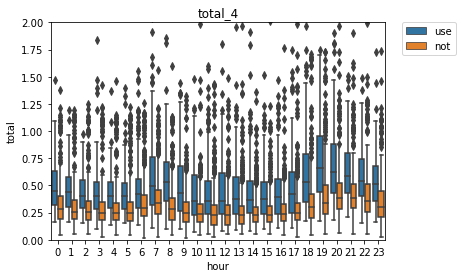

In [216]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

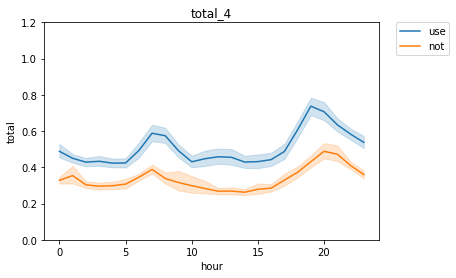

In [217]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

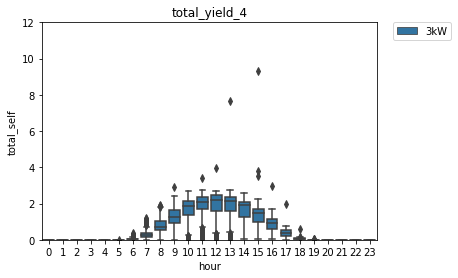

In [218]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

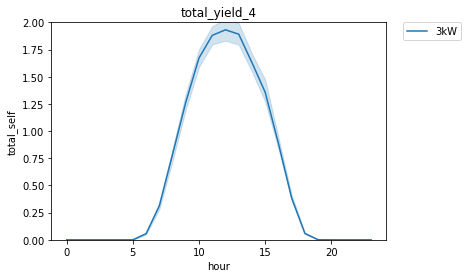

In [219]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

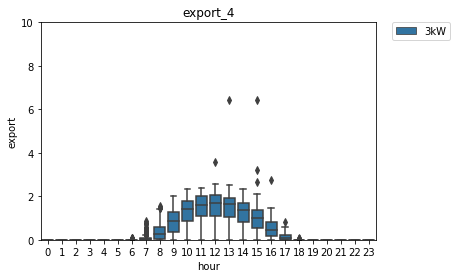

In [220]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

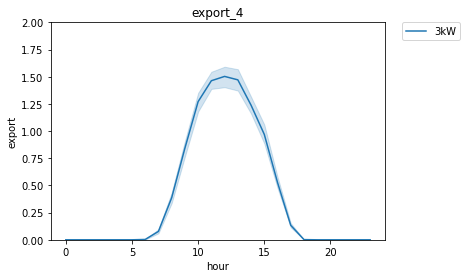

In [221]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

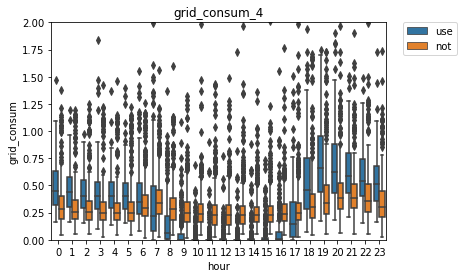

In [222]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

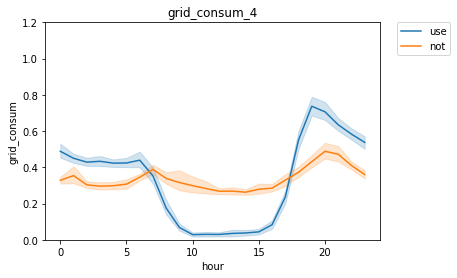

In [223]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

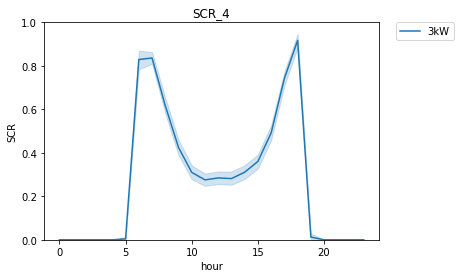

In [224]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_4')
plt.show()

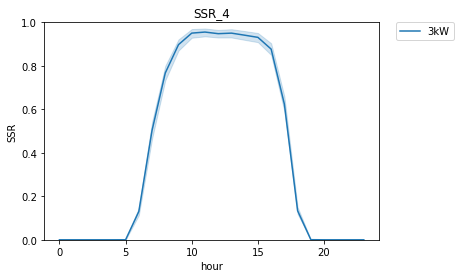

In [225]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_4')
plt.show()

<hr>

## **<계절>**

### 봄(Spring)

In [226]:
df_all_hour_spring = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [227]:
# 총 전력 소비량
pd.set_option('display.max_rows', 500)
df_all_hour_spring.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    726.0  0.498528  0.300854  0.149902  0.309998  0.450012  0.630096   
     1    721.0  0.461710  0.354205  0.140015  0.290039  0.429993  0.580017   
     2    725.0  0.426867  0.190477  0.130005  0.280029  0.400146  0.549805   
     3    727.0  0.417383  0.204420  0.100098  0.279999  0.390137  0.520020   
     4    720.0  0.407397  0.171480  0.130005  0.270020  0.390137  0.520020   
     5    725.0  0.414589  0.189350  0.129944  0.270020  0.390137  0.520020   
     6    721.0  0.464339  0.291406  0.119995  0.270020  0.419922  0.569824   
     7    720.0  0.575077  0.363307  0.109863  0.320251  0.490021  0.709961   
     8    719.0  0.600599  0.453160  0.100037  0.369995  0.549988  0.730347   
     9    719.0  0.499978  0.305686  0.080078  0.279907  0.429993  0.669937   
     10   719.0  0.439227  0.263449  0.070312  0.229980  0.369995  0.594910   
     11   716.0  0.434084  0.290572  0.050537  0.229980  0.360046  0.569870   
     12   721.0  0.467248  0.440604  0.079956  0.239990  0.369934  0.590088   
     13   720.0  0.450672  0.291555  0.060059  0.249756  0.380066  0.582520   
     14   720.0  0.430410  0.247466  0.026428  0.247375  0.380127  0.549805   
     15   718.0  0.442632  0.394318  0.089844  0.239799  0.369934  0.549805   
     16   722.0  0.468051  0.426606  0.090088  0.242615  0.390289  0.587402   
     17   725.0  0.504260  0.303269  0.109863  0.279968  0.439941  0.630005   
     18   725.0  0.632764  0.344330  0.150146  0.380005  0.580078  0.790039   
     19   726.0  0.708816  0.374330  0.130005  0.420044  0.639893  0.900330   
     20   720.0  0.691189  0.366500  0.159912  0.429932  0.600098  0.879906   
     21   723.0  0.651778  0.311945  0.149994  0.429932  0.599976  0.850098   
     22   719.0  0.605645  0.276862  0.150146  0.390137  0.559998  0.779877   
     23   722.0  0.551387  0.274546  0.140015  0.339996  0.509766  0.700195   

               max  
type 시간             
not  0    6.80004

In [228]:
# 총 전력 생산량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.001601  0.005388  0.000000  0.000000  0.000000   
         6   721.0  0.055136  0.083162  0.000000  0.000000  0.029785   
         7   720.0  0.261558  0.251046  0.000000  0.079956  0.189941   
         8   719.0  0.664396  0.461635  0.000000  0.294922  0.580078   
         9   719.0  1.083985  0.630402  0.000000  0.530029  1.109863   
         10  719.0  1.445551  0.752446  0.000000  0.819885  1.590088   
         11  716.0  1.645871  0.811539  0.000000  0.977539  1.830078   
         12  721.0  1.719404  0.803595  0.020020  1.070312  1.989990   
         13  720.0  1.647269  0.809149  0.009766  0.980164  1.929688   
         14  720.0  1.469725  0.731090  0.000000  0.817749  1.739990   
         15  718.0  1.192508  0.744795  0.009766  0.619904  1.320007   
         16  722.0  0.803851  0.695652  0.009766  0.422455  0.779877   
         17  725.0  0.322616  0.216840  0.000000  0.150146  0.290039   
         18  725.0  0.055146  0.073037  0.000000  0.010010  0.040039   
         19  726.0  0.001552  0.009611  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.050903  
         6   0.080017   0.750000  
         7   0.370117   1.449951  
         8   0.964844   2.059998  
         9   1.590210   3.239990  
         10  2.039886   4.100037  
         11  2.290039   6.339844  
         12  2.359863   4.200012  
         13  2.279785   7.680176  
         14  2.030090   4.799988  
         15  1.639832   9.350037  
         16  1.130005  11.000000  
         17  0.480225   2.000000  
         18  0.080078   1.336487  
         19  0.000000   0.226501  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [229]:
# 총 전력 수출량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   726.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   725.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   721.0  0.005826  0.026483  0.0  0.000000  0.000000  0.000000   
         7   720.0  0.068362  0.149254  0.0  0.000000  0.000000  0.069824   
         8   719.0  0.303928  0.357419  0.0  0.010010  0.170013  0.479980   
         9   719.0  0.696784  0.566895  0.0  0.140137  0.669983  1.130127   
         10  719.0  1.070309  0.712045  0.0  0.409943  1.149963  1.669922   
         11  716.0  1.264163  0.775005  0.0  0.547546  1.429962  1.892578   
         12  721.0  1.319162  0.780478  0.0  0.659912  1.519775  1.969971   
         13  720.0  1.252594  0.772040  0.0  0.590012  1.430054  1.862549   
         14  720.0  1.093614  0.697862  0.0  0.457520  1.239990  1.649963   
         15  718.0  0.826020  0.653244  0.0  0.239990  0.850098  1.280029   
         16  722.0  0.462206  0.529197  0.0  0.090088  0.349991  0.719971   
         17  725.0  0.102385  0.147448  0.0  0.000000  0.029999  0.159912   
         18  725.0  0.002312  0.008706  0.0  0.000000  0.000000  0.000000   
         19  726.0  0.000008  0.000221  0.0  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.349976  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  3.770020  
         13  6.439941  
         14  4.059998  
         15  6.670013  
         16  6.940002  
         17  0.819946  
         18  0.099976  
         19  0.005951  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [230]:
# 총 그리드 소비량
df_all_hour_spring.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    726.0  0.498528  0.300854  0.149902  0.309998  0.450012  0.630096   
     1    721.0  0.458187  0.284623  0.140015  0.290039  0.429993  0.580017   
     2    725.0  0.426867  0.190477  0.130005  0.280029  0.400146  0.549805   
     3    727.0  0.417383  0.204420  0.100098  0.279999  0.390137  0.520020   
     4    720.0  0.407396  0.171476  0.130005  0.270020  0.390137  0.520020   
     5    725.0  0.412988  0.189259  0.129944  0.270020  0.390015  0.520020   
     6    721.0  0.415029  0.299690  0.010010  0.220001  0.360107  0.529785   
     7    720.0  0.381881  0.377350  0.000000  0.130005  0.280029  0.512512   
     8    719.0  0.240132  0.424621  0.000000  0.019989  0.119995  0.349915   
     9    719.0  0.112777  0.229139  0.000000  0.000000  0.010010  0.119934   
     10   719.0  0.063985  0.162334  0.000000  0.000000  0.000000  0.020020   
     11   716.0  0.052376  0.150861  0.000000  0.000000  0.000000  0.010254   
     12   721.0  0.067007  0.326682  0.000000  0.000000  0.000000  0.020020   
     13   720.0  0.055997  0.158697  0.000000  0.000000  0.000000  0.020020   
     14   720.0  0.054299  0.134398  0.000000  0.000000  0.000000  0.029785   
     15   718.0  0.076144  0.237303  0.000000  0.000000  0.000000  0.040031   
     16   722.0  0.126406  0.252848  0.000000  0.000000  0.020020  0.140137   
     17   725.0  0.284030  0.297828  0.000000  0.060059  0.209961  0.410156   
     18   725.0  0.579930  0.357972  0.039978  0.329987  0.530029  0.760010   
     19   726.0  0.707273  0.374868  0.130005  0.419998  0.639893  0.900330   
     20   720.0  0.691189  0.366500  0.159912  0.429932  0.600098  0.879906   
     21   723.0  0.651778  0.311945  0.149994  0.429932  0.599976  0.850098   
     22   719.0  0.605645  0.276862  0.150146  0.390137  0.559998  0.779877   
     23   722.0  0.551387  0.274546  0.140015  0.339996  0.509766  0.700195   

               max  
type 시간             
not  0    6.80004

In [231]:
# SCR(자가소비율)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.110345  0.313535  0.000000  0.000000  0.000000   
         6   721.0  0.632012  0.462334  0.000000  0.000000  1.000000   
         7   720.0  0.824182  0.264732  0.000000  0.716534  0.975282   
         8   719.0  0.669721  0.278795  0.000000  0.447020  0.694915   
         9   719.0  0.487356  0.301994  0.000000  0.214294  0.419112   
         10  719.0  0.374994  0.293416  0.000000  0.144326  0.273567   
         11  716.0  0.332674  0.277686  0.000000  0.123529  0.225583   
         12  721.0  0.331129  0.273212  0.038257  0.126027  0.233303   
         13  720.0  0.342481  0.274425  0.030180  0.133541  0.248205   
         14  720.0  0.364326  0.280373  0.000000  0.150587  0.268108   
         15  718.0  0.425726  0.288473  0.059896  0.175642  0.347874   
         16  722.0  0.555635  0.292168  0.073816  0.298850  0.544565   
         17  725.0  0.779946  0.257445  0.000000  0.590027  0.888814   
         18  725.0  0.795929  0.386544  0.000000  0.888587  1.000000   
         19  726.0  0.090090  0.285927  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.949280  1.0  
         9   0.722721  1.0  
         10  0.513114  1.0  
         11  0.453565  1.0  
         12  0.438047  1.0  
         13  0.458702  1.0  
         14  0.479759  1.0  
         15  0.616742  1.0  
         16  0.798995  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [232]:
# SSR(자가공급률)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.004335  0.014917  0.000000  0.000000  0.000000   
         6   721.0  0.136604  0.188889  0.000000  0.000000  0.056834   
         7   720.0  0.416697  0.310933  0.000000  0.138385  0.359587   
         8   719.0  0.675906  0.312577  0.000000  0.438543  0.769267   
         9   719.0  0.832432  0.264112  0.000000  0.777659  0.972919   
         10  719.0  0.899063  0.221037  0.000000  0.948729  1.000000   
         11  716.0  0.918515  0.195111  0.000000  0.958300  1.000000   
         12  721.0  0.916092  0.189847  0.053385  0.948702  1.000000   
         13  720.0  0.913261  0.192019  0.011778  0.954533  1.000000   
         14  720.0  0.905608  0.203206  0.000000  0.938054  1.000000   
         15  718.0  0.882901  0.224719  0.027913  0.898738  1.000000   
         16  722.0  0.803852  0.274422  0.013000  0.708940  0.938425   
         17  725.0  0.535202  0.305225  0.000000  0.280942  0.532573   
         18  725.0  0.125344  0.160329  0.000000  0.013957  0.062500   
         19  726.0  0.003230  0.017697  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.123886  
         6   0.190642  0.975588  
         7   0.681132  1.000000  
         8   0.957243  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.809534  1.000000  
         18  0.170637  0.917613  
         19  0.000000  0.392906  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

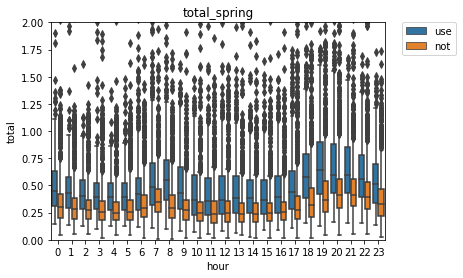

In [233]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

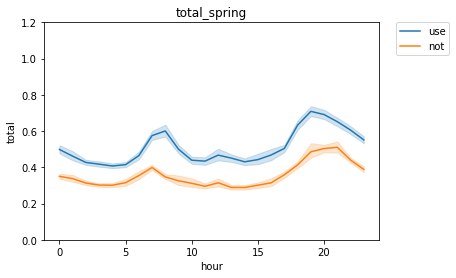

In [234]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

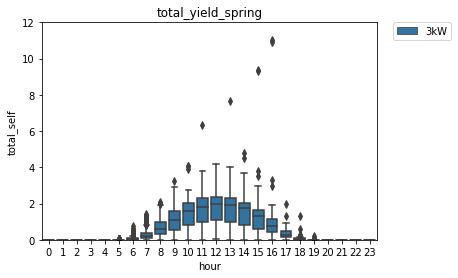

In [235]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

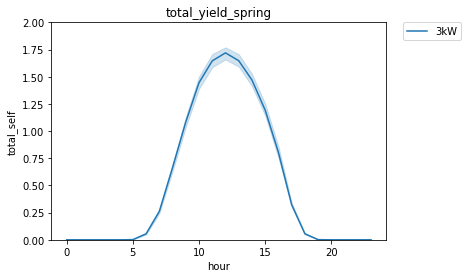

In [236]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

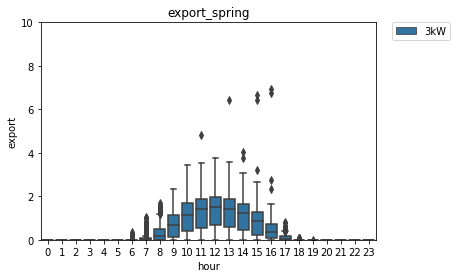

In [237]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

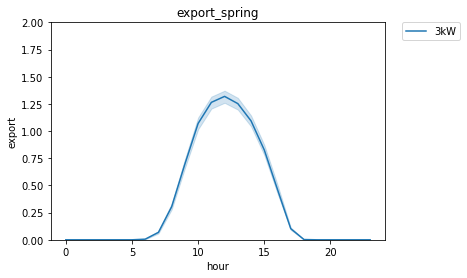

In [238]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

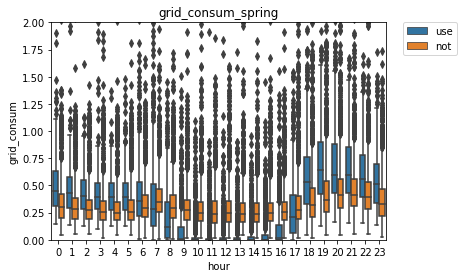

In [239]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

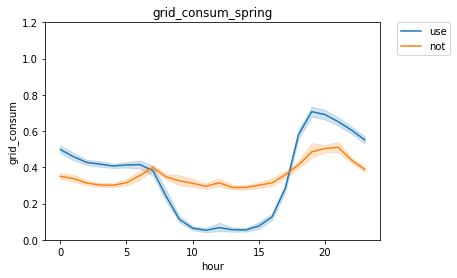

In [240]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

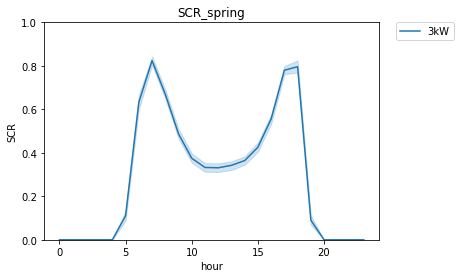

In [241]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_spring')
plt.show()

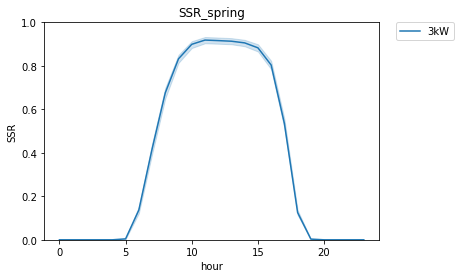

In [242]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_spring')
plt.show()

<hr>

### 여름(Summer)

In [243]:
df_all_hour_summer = df_all_hour[(df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') | (df_all_hour.ym == '2021/8')]

In [244]:
# 총 전력 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.349570  0.274540  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.371986  0.547047  0.049988  0.200012  0.309998  0.440063   
     11  1551.0  0.397156  0.608184  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.419358  0.606087  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    719.0  0.525786  0.324318  0.159973  0.290039  0.430054  0.660095   
     1    722.0  0.490083  0.311531  0.139984  0.270020  0.409973  0.609985   
     2    721.0  0.431287  0.219780  0.140015  0.259949  0.380005  0.559937   
     3    721.0  0.414564  0.222955  0.140015  0.240051  0.350037  0.549927   
     4    713.0  0.395910  0.198321  0.139984  0.230011  0.339966  0.540039   
     5    706.0  0.408922  0.220954  0.140015  0.239990  0.340027  0.530029   
     6    706.0  0.456744  0.377321  0.129944  0.259895  0.364990  0.587311   
     7    705.0  0.538318  0.491275  0.169952  0.299988  0.429993  0.670044   
     8    710.0  0.601797  0.545127  0.150024  0.350128  0.480103  0.700096   
     9    707.0  0.554486  0.431766  0.110107  0.319824  0.459961  0.670029   
     10   715.0  0.528004  0.379535  0.129944  0.275009  0.440063  0.639938   
     11   710.0  0.590769  0.580635  0.110046  0.280029  0.460068  0.707504   
     12   708.0  0.641619  0.521053  0.109985  0.297470  0.500031  0.779976   
     13   707.0  0.656531  0.545545  0.119934  0.320068  0.500000  0.755066   
     14   709.0  0.642463  0.561913  0.130005  0.290039  0.480042  0.710022   
     15   710.0  0.658321  0.749030  0.120026  0.300049  0.479980  0.749939   
     16   717.0  0.644493  0.538677  0.119873  0.309937  0.489929  0.740051   
     17   717.0  0.697749  0.511479  0.149872  0.369995  0.529907  0.879883   
     18   714.0  0.783024  0.545761  0.160004  0.390015  0.599869  1.017426   
     19   718.0  0.861349  0.623816  0.129944  0.432487  0.639984  1.099976   
     20   718.0  0.827754  0.533436  0.169983  0.459999  0.670013  1.047455   
     21   721.0  0.778439  0.445953  0.169983  0.469971  0.660034  0.979980   
     22   717.0  0.723550  0.454093  0.179993  0.430054  0.609985  0.880005   
     23   715.0  0.613494  0.391605  0.140015  0.359985  0.520020  0.739990   

               max  
type 시간             
not  0   10.59997

In [245]:
# 총 전력 생산량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.005469  0.017677  0.0  0.000000  0.000000  0.010010   
         6   706.0  0.094219  0.093289  0.0  0.030029  0.069946  0.130005   
         7   705.0  0.325845  0.236465  0.0  0.150024  0.300049  0.440063   
         8   710.0  0.658331  0.412814  0.0  0.349976  0.599976  0.937500   
         9   707.0  1.006877  0.568302  0.0  0.570068  0.969971  1.460083   
         10  715.0  1.253565  0.638758  0.0  0.760010  1.339966  1.764954   
         11  710.0  1.394491  0.666149  0.0  0.892517  1.524963  1.950043   
         12  708.0  1.467595  0.763507  0.0  0.947479  1.559998  2.000000   
         13  707.0  1.429270  0.740757  0.0  0.929993  1.540039  1.920044   
         14  709.0  1.306509  0.805676  0.0  0.789917  1.410034  1.779907   
         15  710.0  1.074225  0.736696  0.0  0.630005  1.139893  1.460052   
         16  717.0  0.741194  0.510193  0.0  0.419922  0.729980  1.020020   
         17  717.0  0.394804  0.421663  0.0  0.209961  0.350098  0.540039   
         18  714.0  0.118340  0.111015  0.0  0.049805  0.110107  0.169922   
         19  718.0  0.010661  0.031409  0.0  0.000000  0.000000  0.010010   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.309937  
         8    1.940063  
         9    3.270020  
         10   3.660034  
         11   4.231323  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16   8.569946  
         17   9.150024  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [246]:
# 총 전력 수출량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.000014  0.000377  0.0  0.000000  0.000000  0.000000   
         6   706.0  0.008459  0.030278  0.0  0.000000  0.000000  0.000000   
         7   705.0  0.087184  0.143965  0.0  0.000000  0.020020  0.119995   
         8   710.0  0.294368  0.324199  0.0  0.010010  0.209961  0.450012   
         9   707.0  0.593177  0.503148  0.0  0.125000  0.510010  0.949982   
         10  715.0  0.820579  0.598039  0.0  0.280029  0.780029  1.300049   
         11  710.0  0.916450  0.629779  0.0  0.352501  0.889954  1.420029   
         12  708.0  0.955398  0.697732  0.0  0.399986  0.919952  1.492584   
         13  707.0  0.909399  0.672949  0.0  0.340057  0.880005  1.400024   
         14  709.0  0.808089  0.696296  0.0  0.270020  0.729980  1.290039   
         15  710.0  0.601094  0.589765  0.0  0.130005  0.520020  0.979980   
         16  717.0  0.333568  0.358753  0.0  0.040039  0.229980  0.520020   
         17  717.0  0.099918  0.268459  0.0  0.000000  0.020020  0.130005   
         18  714.0  0.004523  0.021067  0.0  0.000000  0.000000  0.000000   
         19  718.0  0.000237  0.004586  0.0  0.000000  0.000000  0.000000   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   0.890015  
         8   1.589966  
         9   2.109985  
         10  3.140015  
         11  2.300049  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  8.160034  
         16  3.589966  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [247]:
# 총 그리드 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.349570  0.274540  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.371986  0.547047  0.049988  0.200012  0.309998  0.440063   
     11  1551.0  0.397156  0.608184  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.419358  0.606087  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    719.0  0.526274  0.324904  0.159973  0.290039  0.430054  0.660095   
     1    722.0  0.490251  0.311577  0.139984  0.270020  0.409973  0.610077   
     2    721.0  0.431381  0.219816  0.140015  0.259949  0.380005  0.559937   
     3    721.0  0.414564  0.222955  0.140015  0.240051  0.350037  0.549927   
     4    713.0  0.395910  0.198321  0.139984  0.230011  0.339966  0.540039   
     5    706.0  0.403468  0.220053  0.130005  0.239990  0.339966  0.530029   
     6    706.0  0.370984  0.384249  0.010010  0.180054  0.269958  0.500000   
     7    705.0  0.299657  0.487939  0.000000  0.059998  0.199951  0.409912   
     8    710.0  0.237835  0.514075  0.000000  0.010010  0.080078  0.317474   
     9    707.0  0.140787  0.320651  0.000000  0.000000  0.020020  0.150024   
     10   715.0  0.095018  0.227992  0.000000  0.000000  0.000000  0.069977   
     11   710.0  0.112729  0.390884  0.000000  0.000000  0.000000  0.070000   
     12   708.0  0.129422  0.303912  0.000000  0.000000  0.000000  0.090027   
     13   707.0  0.136660  0.306117  0.000000  0.000000  0.010010  0.119995   
     14   709.0  0.144042  0.314631  0.000000  0.000000  0.010010  0.140015   
     15   710.0  0.185190  0.457982  0.000000  0.000000  0.020020  0.217529   
     16   717.0  0.236866  0.393221  0.000000  0.000000  0.059998  0.309998   
     17   717.0  0.402864  0.460098  0.000000  0.080078  0.239990  0.570007   
     18   714.0  0.669207  0.545183  0.029968  0.280029  0.485016  0.890015   
     19   718.0  0.850926  0.624303  0.129944  0.420044  0.630005  1.087494   
     20   718.0  0.827923  0.533356  0.169983  0.459999  0.670013  1.047455   
     21   721.0  0.779657  0.446841  0.169983  0.469971  0.660034  0.989990   
     22   717.0  0.723017  0.447580  0.179993  0.430054  0.609985  0.880005   
     23   715.0  0.614927  0.398245  0.140015  0.359985  0.520020  0.739990   

               max  
type 시간             
not  0   10.59997

In [248]:
# SCR(자가소비율)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   706.0  0.298630  0.457766  0.0  0.000000  0.000000  1.000000  1.0
         6   706.0  0.842449  0.328805  0.0  0.899878  1.000000  1.000000  1.0
         7   705.0  0.786551  0.259952  0.0  0.657886  0.876524  1.000000  1.0
         8   710.0  0.654107  0.278897  0.0  0.426679  0.660538  0.942338  1.0
         9   707.0  0.513415  0.296570  0.0  0.257562  0.447687  0.772353  1.0
         10  715.0  0.435210  0.286627  0.0  0.197656  0.339163  0.650010  1.0
         11  710.0  0.420521  0.279843  0.0  0.189056  0.335125  0.615154  1.0
         12  708.0  0.422796  0.275612  0.0  0.206863  0.342120  0.594045  1.0
         13  707.0  0.433601  0.274969  0.0  0.207500  0.360348  0.625637  1.0
         14  709.0  0.463562  0.287035  0.0  0.217804  0.392213  0.687488  1.0
         15  710.0  0.528545  0.294498  0.0  0.273904  0.482842  0.795426  1.0
         16  717.0  0.632031  0.281129  0.0  0.399897  0.656369  0.891322  1.0
         17  717.0  0.816140  0.234319  0.0  0.694134  0.919922  1.000000  1.0
         18  714.0  0.910673  0.258309  0.0  1.000000  1.000000  1.000000  1.0
         19  718.0  0.457914  0.498045  0.0  0.000000  0.000000  1.000000  1.0
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [249]:
# SSR(자가공급률)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.014464  0.032152  0.0  0.000000  0.000000  0.017184   
         6   706.0  0.235508  0.219309  0.0  0.058026  0.166780  0.358798   
         7   705.0  0.536388  0.307348  0.0  0.274947  0.568933  0.810953   
         8   710.0  0.706927  0.303547  0.0  0.500068  0.817622  0.975587   
         9   707.0  0.818700  0.269645  0.0  0.729146  0.956476  1.000000   
         10  715.0  0.875683  0.234881  0.0  0.879944  1.000000  1.000000   
         11  710.0  0.886170  0.219766  0.0  0.889587  1.000000  1.000000   
         12  708.0  0.876537  0.222570  0.0  0.852504  1.000000  1.000000   
         13  707.0  0.871044  0.221337  0.0  0.832487  0.984833  1.000000   
         14  709.0  0.856495  0.239503  0.0  0.797833  0.980750  1.000000   
         15  710.0  0.816919  0.259698  0.0  0.717847  0.959959  1.000000   
         16  717.0  0.740668  0.290215  0.0  0.572493  0.860488  1.000000   
         17  717.0  0.533205  0.297868  0.0  0.278480  0.531235  0.783770   
         18  714.0  0.207672  0.191394  0.0  0.064658  0.149655  0.308985   
         19  718.0  0.018220  0.037992  0.0  0.000000  0.000000  0.020638   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.947318  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.903533  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

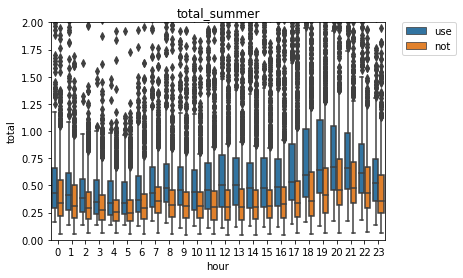

In [250]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

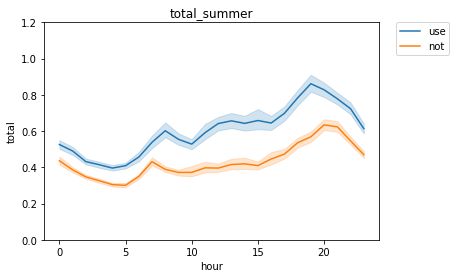

In [251]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

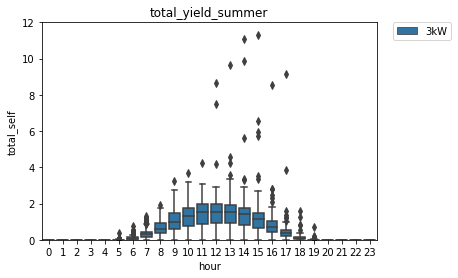

In [252]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

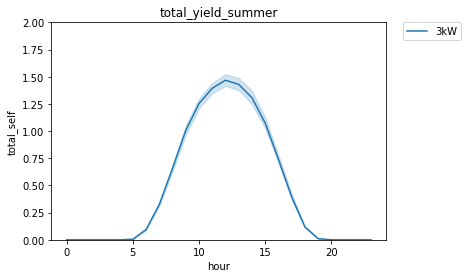

In [253]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

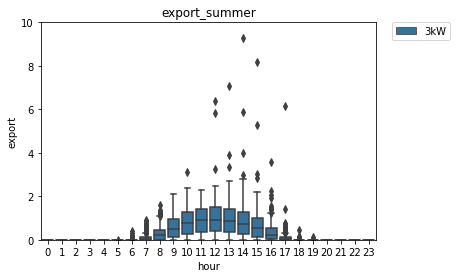

In [254]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

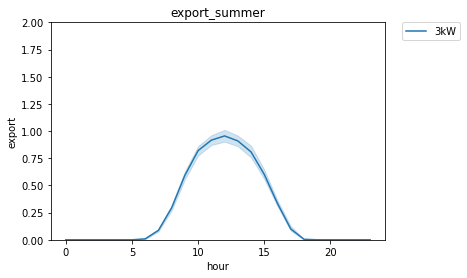

In [255]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

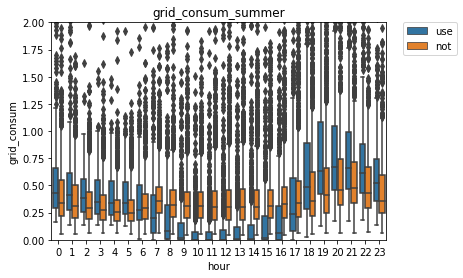

In [256]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

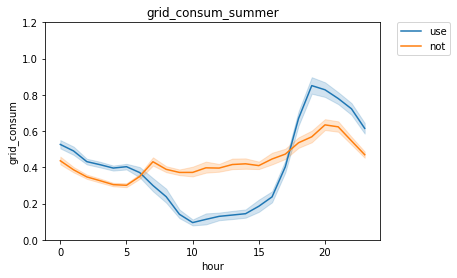

In [257]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

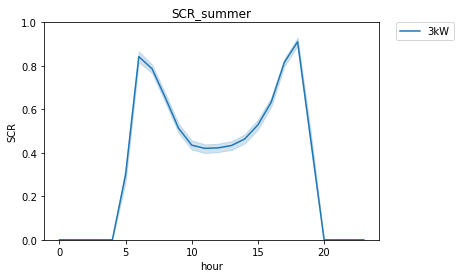

In [258]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_summer')
plt.show()

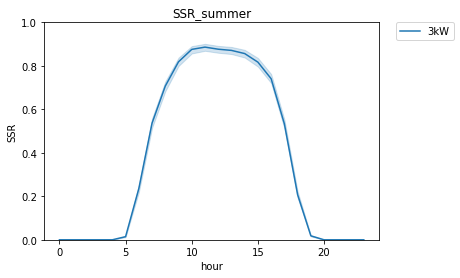

In [259]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_summer')
plt.show()

<hr>

### 가을(Autumn)

In [260]:
df_all_hour_autumn = df_all_hour[(df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') | (df_all_hour.ym == '2021/11')]

In [261]:
# 총 전력 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.320027  0.414269  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.322095  0.307980  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    714.0  0.528374  0.287001  0.149902  0.299942  0.465088  0.680115   
     1    711.0  0.484823  0.269099  0.139954  0.270020  0.429932  0.620117   
     2    715.0  0.448100  0.252168  0.140015  0.270020  0.410034  0.570068   
     3    706.0  0.423092  0.221317  0.130005  0.260010  0.389893  0.540039   
     4    710.0  0.415402  0.221706  0.140015  0.250000  0.385010  0.530029   
     5    710.0  0.417477  0.210857  0.130005  0.250000  0.394958  0.530029   
     6    708.0  0.470854  0.328262  0.140015  0.250000  0.410034  0.580078   
     7    708.0  0.565456  0.434049  0.139893  0.320068  0.460083  0.669922   
     8    709.0  0.589000  0.313590  0.120117  0.349976  0.519775  0.739990   
     9    718.0  0.510927  0.326056  0.099976  0.270020  0.430176  0.670044   
     10   716.0  0.469294  0.296809  0.079956  0.239990  0.389954  0.630035   
     11   709.0  0.473433  0.354499  0.079956  0.239990  0.380005  0.619751   
     12   706.0  0.516637  0.377863  0.109985  0.260040  0.410217  0.667480   
     13   708.0  0.500679  0.316518  0.080078  0.269867  0.449829  0.640091   
     14   715.0  0.487483  0.338210  0.080200  0.250122  0.419922  0.600098   
     15   714.0  0.468838  0.301563  0.089966  0.250122  0.409912  0.589966   
     16   718.0  0.499821  0.444352  0.109985  0.270035  0.424927  0.619873   
     17   714.0  0.596315  0.524348  0.109985  0.330078  0.509918  0.730072   
     18   711.0  0.699217  0.371412  0.189941  0.430054  0.630005  0.860046   
     19   710.0  0.727135  0.399228  0.219971  0.420044  0.625000  0.900116   
     20   712.0  0.704741  0.426881  0.200012  0.420044  0.590088  0.879944   
     21   706.0  0.691194  0.383113  0.200012  0.412506  0.589966  0.880096   
     22   713.0  0.677192  0.430908  0.169983  0.399902  0.560059  0.860107   
     23   713.0  0.600208  0.352408  0.140015  0.334961  0.529907  0.760010   

               max  
type 시간             
not  0   12.57006

In [262]:
# 총 전력 생산량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.000014  0.000376  0.000000  0.000000  0.000000   
         6   708.0  0.007246  0.020787  0.000000  0.000000  0.000000   
         7   708.0  0.136364  0.146288  0.000000  0.040039  0.099854   
         8   709.0  0.516817  0.342955  0.000000  0.260010  0.469971   
         9   718.0  0.979558  0.546083  0.000000  0.520020  1.010010   
         10  716.0  1.297916  0.625721  0.000000  0.797363  1.414917   
         11  709.0  1.459050  0.691698  0.019897  0.880127  1.640137   
         12  706.0  1.498552  0.737933  0.010010  0.869934  1.704956   
         13  708.0  1.390943  0.729340  0.010010  0.750000  1.489990   
         14  715.0  1.185248  0.756828  0.000000  0.610107  1.220215   
         15  714.0  0.793063  0.500280  0.000000  0.362549  0.780029   
         16  718.0  0.387909  0.429267  0.000000  0.120026  0.269897   
         17  714.0  0.106617  0.514571  0.000000  0.000000  0.020020   
         18  711.0  0.003544  0.013409  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.010010  
         6   0.010010   0.270020  
         7   0.189941   1.129883  
         8   0.730225   1.879883  
         9   1.419922   2.510010  
         10  1.822510   3.020020  
         11  2.030029   2.969971  
         12  2.080078   4.650146  
         13  1.949982   6.669922  
         14  1.665039  10.650146  
         15  1.169922   3.140137  
         16  0.550049   7.390137  
         17  0.110107  12.609985  
         18  0.000000   0.260010  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [263]:
# 총 전력 수출량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   714.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   708.0  0.000268  0.003413  0.0  0.000000  0.000000  0.000000   
         7   708.0  0.018921  0.065073  0.0  0.000000  0.000000  0.010010   
         8   709.0  0.196457  0.241656  0.0  0.009766  0.109985  0.299927   
         9   718.0  0.600190  0.477377  0.0  0.140137  0.550049  0.950043   
         10  716.0  0.907773  0.585638  0.0  0.360077  0.979980  1.369995   
         11  709.0  1.063587  0.657861  0.0  0.469971  1.189941  1.580078   
         12  706.0  1.069111  0.690862  0.0  0.420044  1.169952  1.609985   
         13  708.0  0.975209  0.677833  0.0  0.327393  1.040039  1.510010   
         14  715.0  0.795298  0.681875  0.0  0.244995  0.760010  1.244995   
         15  714.0  0.463689  0.446656  0.0  0.050049  0.340027  0.819946   
         16  718.0  0.163150  0.266829  0.0  0.000000  0.030029  0.250000   
         17  714.0  0.026586  0.230079  0.0  0.000000  0.000000  0.000000   
         18  711.0  0.000056  0.001502  0.0  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.750000  
         8   1.419922  
         9   1.949951  
         10  2.419922  
         11  2.310059  
         12  3.500000  
         13  5.699951  
         14  9.149902  
         15  2.630493  
         16  2.790039  
         17  4.760010  
         18  0.040039  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [264]:
# 총 그리드 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.320027  0.414269  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.322095  0.307980  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    714.0  0.528374  0.287001  0.149902  0.299942  0.465088  0.680115   
     1    711.0  0.484823  0.269099  0.139954  0.270020  0.429932  0.620117   
     2    715.0  0.448100  0.252168  0.140015  0.270020  0.410034  0.570068   
     3    706.0  0.423092  0.221317  0.130005  0.260010  0.389893  0.540039   
     4    710.0  0.415402  0.221706  0.140015  0.250000  0.385010  0.530029   
     5    710.0  0.417463  0.210831  0.130005  0.250000  0.394958  0.530029   
     6    708.0  0.463876  0.327911  0.140015  0.250000  0.400024  0.570068   
     7    708.0  0.448013  0.441477  0.000000  0.199951  0.349915  0.552551   
     8    709.0  0.268640  0.300869  0.000000  0.040039  0.170044  0.400024   
     9    718.0  0.131559  0.253919  0.000000  0.000000  0.010010  0.149902   
     10   716.0  0.079150  0.189402  0.000000  0.000000  0.000000  0.042480   
     11   709.0  0.077971  0.226264  0.000000  0.000000  0.000000  0.030029   
     12   706.0  0.087196  0.208159  0.000000  0.000000  0.000000  0.050049   
     13   708.0  0.084945  0.192704  0.000000  0.000000  0.000000  0.059845   
     14   715.0  0.097533  0.224505  0.000000  0.000000  0.009888  0.079956   
     15   714.0  0.139464  0.237723  0.000000  0.000000  0.030029  0.187500   
     16   718.0  0.275063  0.335340  0.000000  0.049927  0.170044  0.410095   
     17   714.0  0.516284  0.366676  0.010010  0.250000  0.440002  0.689941   
     18   711.0  0.695732  0.372164  0.189941  0.429962  0.620117  0.859985   
     19   710.0  0.727138  0.399226  0.219971  0.420044  0.625000  0.900116   
     20   712.0  0.704744  0.426879  0.200012  0.420044  0.590088  0.879944   
     21   706.0  0.691197  0.383111  0.200012  0.412506  0.589966  0.880096   
     22   713.0  0.677195  0.430906  0.169983  0.399902  0.560059  0.860107   
     23   713.0  0.600211  0.352407  0.140015  0.334961  0.529907  0.760010   

               max  
type 시간             
not  0   12.57006

In [265]:
# SCR(자가소비율)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.001408  0.037529  0.000000  0.000000  0.000000   
         6   708.0  0.282421  0.449168  0.000000  0.000000  0.000000   
         7   708.0  0.855686  0.285860  0.000000  0.857008  1.000000   
         8   709.0  0.707109  0.262305  0.000000  0.500185  0.743505   
         9   718.0  0.494782  0.292658  0.000000  0.246023  0.428573   
         10  716.0  0.398418  0.280985  0.000000  0.174827  0.312297   
         11  709.0  0.368724  0.279953  0.044140  0.150743  0.269702   
         12  706.0  0.384600  0.280079  0.017993  0.161574  0.286649   
         13  708.0  0.405208  0.282888  0.045759  0.178491  0.312452   
         14  715.0  0.445452  0.287480  0.000000  0.200015  0.379598   
         15  714.0  0.556074  0.300980  0.000000  0.296092  0.521762   
         16  718.0  0.736535  0.284139  0.000000  0.515185  0.846106   
         17  714.0  0.670624  0.439481  0.000000  0.000000  1.000000   
         18  711.0  0.147463  0.354558  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.962466  1.0  
         9   0.727386  1.0  
         10  0.540485  1.0  
         11  0.500000  1.0  
         12  0.529459  1.0  
         13  0.562015  1.0  
         14  0.623785  1.0  
         15  0.846222  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [266]:
# SSR(자가공급률)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.000017  0.000464  0.000000  0.000000  0.000000   
         6   708.0  0.017862  0.045246  0.000000  0.000000  0.000000   
         7   708.0  0.265499  0.237499  0.000000  0.068377  0.194689   
         8   709.0  0.620077  0.301486  0.000000  0.386766  0.666562   
         9   718.0  0.821925  0.273468  0.000000  0.749946  0.968478   
         10  716.0  0.889438  0.226745  0.000000  0.917645  1.000000   
         11  709.0  0.900286  0.213654  0.018380  0.934158  1.000000   
         12  706.0  0.893841  0.209467  0.014298  0.904903  1.000000   
         13  708.0  0.885170  0.215458  0.012206  0.878942  1.000000   
         14  715.0  0.864679  0.233074  0.000000  0.844503  0.988083   
         15  714.0  0.783095  0.271470  0.000000  0.643855  0.913988   
         16  718.0  0.540942  0.324435  0.000000  0.232221  0.569480   
         17  714.0  0.159144  0.221499  0.000000  0.000000  0.048425   
         18  711.0  0.006911  0.022455  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.012357  
         6   0.018536  0.500000  
         7   0.420969  1.000000  
         8   0.896465  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.853173  1.000000  
         17  0.218584  0.961502  
         18  0.000000  0.209511  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

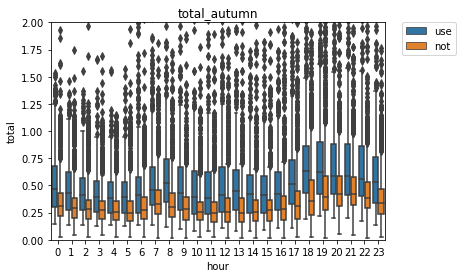

In [267]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

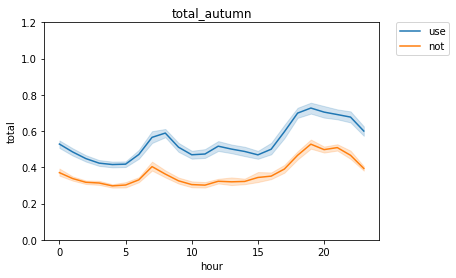

In [268]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

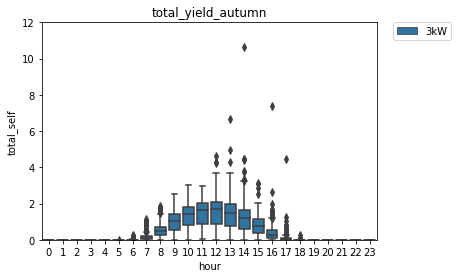

In [269]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

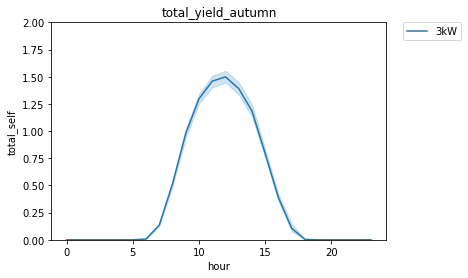

In [270]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

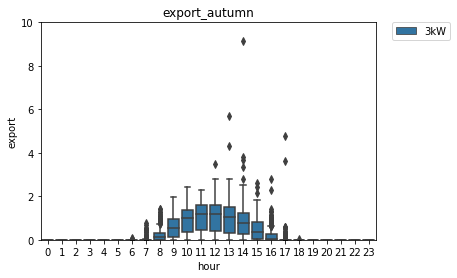

In [271]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

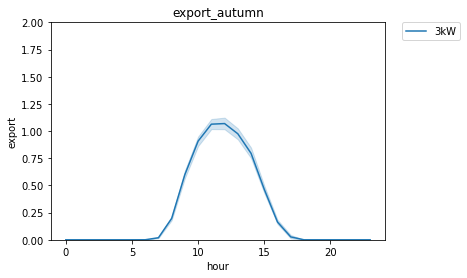

In [272]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

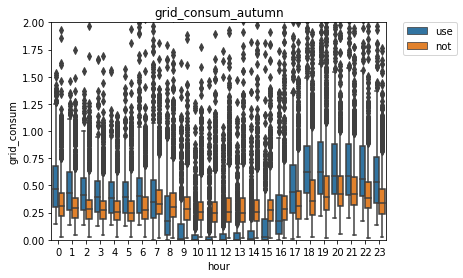

In [273]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

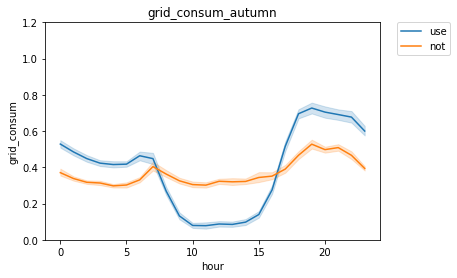

In [274]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

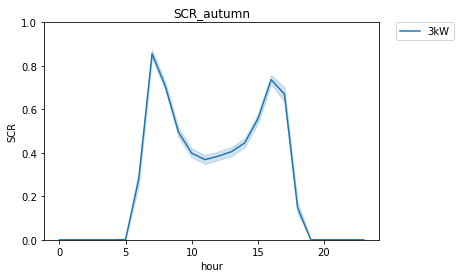

In [275]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_autumn')
plt.show()

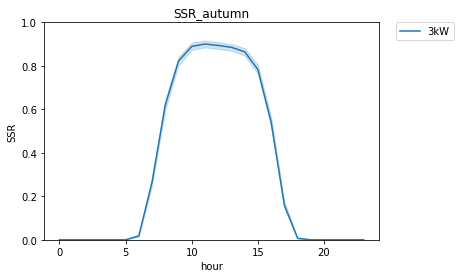

In [276]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_autumn')
plt.show()

<hr>

### 겨울(Winter)

In [277]:
df_all_hour_winter = df_all_hour[(df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') | (df_all_hour.ym == '2022/2')]

In [278]:
# 총 전력 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['전력소비량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.358111  0.319136  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    706.0  0.615421  0.266692  0.140015  0.410156  0.599854  0.790039   
     1    708.0  0.562597  0.312628  0.150024  0.379974  0.539917  0.700012   
     2    710.0  0.528477  0.220120  0.140015  0.360016  0.489990  0.659912   
     3    709.0  0.502522  0.201084  0.160400  0.359863  0.469971  0.609863   
     4    710.0  0.511935  0.270470  0.139893  0.359985  0.479980  0.629883   
     5    711.0  0.501260  0.226451  0.119995  0.340088  0.469971  0.619873   
     6    701.0  0.551383  0.310362  0.099976  0.350098  0.489990  0.669922   
     7    699.0  0.674693  0.679160  0.159912  0.391724  0.540039  0.820068   
     8    705.0  0.755685  0.396578  0.159790  0.469971  0.679932  0.950195   
     9    703.0  0.731926  0.492126  0.089844  0.429749  0.669922  0.955017   
     10   698.0  0.665498  0.628297  0.079834  0.319824  0.590088  0.859711   
     11   698.0  0.618879  0.460344  0.090088  0.290070  0.559814  0.820160   
     12   700.0  0.618468  0.414396  0.079834  0.320160  0.549927  0.829742   
     13   699.0  0.605022  0.374820  0.079834  0.330078  0.539917  0.820068   
     14   695.0  0.590137  0.367532  0.080078  0.340088  0.539917  0.769897   
     15   705.0  0.579459  0.352175  0.070068  0.319824  0.520020  0.759766   
     16   707.0  0.621367  0.602254  0.089844  0.340088  0.540283  0.790039   
     17   704.0  0.742104  0.416225  0.119873  0.460175  0.669922  0.940186   
     18   705.0  0.871988  0.415417  0.199951  0.570068  0.800049  1.094971   
     19   705.0  0.895811  0.551083  0.140137  0.560059  0.800049  1.149902   
     20   706.0  0.836019  0.430333  0.149902  0.559814  0.759888  1.067383   
     21   698.0  0.799666  0.350208  0.200073  0.559814  0.750000  0.990173   
     22   705.0  0.749788  0.318426  0.164795  0.520020  0.709961  0.930176   
     23   704.0  0.696009  0.364672  0.160034  0.479980  0.660034  0.860107   

               max  
type 시간             
not  0    5.16992

In [279]:
# 총 전력 생산량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.012278  0.028332  0.000000  0.000000  0.000000   
         8   705.0  0.244928  0.201135  0.000000  0.100098  0.189941   
         9   703.0  0.801296  0.462691  0.000000  0.399902  0.770020   
         10  698.0  1.259270  0.589716  0.000000  0.819885  1.349976   
         11  698.0  1.573479  0.661937  0.000000  1.149902  1.765015   
         12  700.0  1.668440  0.675384  0.000000  1.217468  1.834961   
         13  699.0  1.581263  0.680279  0.019775  1.055054  1.790039   
         14  695.0  1.348187  0.724635  0.010010  0.819946  1.469971   
         15  705.0  0.927741  0.680345  0.000000  0.450195  0.880127   
         16  707.0  0.342937  0.433620  0.000000  0.080078  0.219971   
         17  704.0  0.057219  0.307765  0.000000  0.000000  0.010010   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.000000  
         7   0.010010   0.290039  
         8   0.339844   1.119873  
         9   1.164917   1.940186  
         10  1.729980   3.520020  
         11  2.030029   4.779785  
         12  2.170166   4.949951  
         13  2.119873   4.209961  
         14  1.830078   8.030029  
         15  1.320068  10.969971  
         16  0.479980   7.850098  
         17  0.050049   7.679932  
         18  0.000000   0.000000  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [280]:
# 총 전력 수출량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   711.0  0.000092  0.002454  0.0  0.000000  0.000000  0.000000   
         6   701.0  0.000093  0.002471  0.0  0.000000  0.000000  0.000000   
         7   699.0  0.000606  0.005910  0.0  0.000000  0.000000  0.000000   
         8   705.0  0.034848  0.076779  0.0  0.000000  0.000000  0.030029   
         9   703.0  0.341140  0.326593  0.0  0.060059  0.250000  0.540039   
         10  698.0  0.735122  0.501883  0.0  0.312531  0.724976  1.129974   
         11  698.0  1.039894  0.602242  0.0  0.595093  1.119934  1.489990   
         12  700.0  1.130585  0.632369  0.0  0.647400  1.239990  1.599915   
         13  699.0  1.054245  0.619011  0.0  0.529968  1.169922  1.529907   
         14  695.0  0.851429  0.626495  0.0  0.315002  0.880127  1.284973   
         15  705.0  0.513848  0.569330  0.0  0.099854  0.419922  0.839844   
         16  707.0  0.129278  0.236981  0.0  0.000000  0.019775  0.159912   
         17  704.0  0.014579  0.196648  0.0  0.000000  0.000000  0.000000   
         18  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.065430  
         6   0.065430  
         7   0.089844  
         8   0.620117  
         9   1.484863  
         10  3.010010  
         11  4.130127  
         12  4.089844  
         13  3.559814  
         14  6.680176  
         15  9.610107  
         16  2.250000  
         17  5.099976  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [281]:
# 총 그리드 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['수전전력량(kWh)']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.358111  0.319136  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    706.0  0.615513  0.266545  0.140015  0.410156  0.599854  0.790039   
     1    708.0  0.562689  0.312518  0.150024  0.379974  0.539917  0.700012   
     2    710.0  0.528569  0.219979  0.140015  0.360016  0.489990  0.659912   
     3    709.0  0.502614  0.200941  0.169922  0.359863  0.469971  0.609863   
     4    710.0  0.512027  0.270361  0.139893  0.359985  0.479980  0.629883   
     5    711.0  0.501352  0.226325  0.119995  0.340088  0.469971  0.619873   
     6    701.0  0.551476  0.310254  0.099976  0.350098  0.489990  0.669922   
     7    699.0  0.663021  0.679564  0.149902  0.380005  0.530029  0.810059   
     8    705.0  0.545605  0.405511  0.000000  0.250000  0.449951  0.740234   
     9    703.0  0.271771  0.439671  0.000000  0.020020  0.119873  0.359985   
     10   698.0  0.141351  0.483066  0.000000  0.000000  0.010010  0.119629   
     11   698.0  0.085294  0.222909  0.000000  0.000000  0.000000  0.040039   
     12   700.0  0.080613  0.209885  0.000000  0.000000  0.000000  0.040039   
     13   699.0  0.078004  0.180942  0.000000  0.000000  0.000000  0.059875   
     14   695.0  0.093379  0.204081  0.000000  0.000000  0.000000  0.080017   
     15   705.0  0.165566  0.268736  0.000000  0.000000  0.040039  0.229980   
     16   707.0  0.407707  0.467411  0.000000  0.090088  0.330078  0.589966   
     17   704.0  0.699464  0.412832  0.030029  0.410095  0.639893  0.910156   
     18   705.0  0.872009  0.415428  0.199951  0.570068  0.800049  1.094971   
     19   705.0  0.882429  0.416669  0.140137  0.560059  0.800049  1.140137   
     20   706.0  0.836030  0.430328  0.149902  0.559814  0.759888  1.067383   
     21   698.0  0.799551  0.350099  0.200073  0.559814  0.750000  0.990173   
     22   705.0  0.749841  0.318229  0.200195  0.520020  0.709961  0.930176   
     23   704.0  0.696102  0.364544  0.160034  0.479980  0.660034  0.860107   

               max  
type 시간             
not  0    5.16992

In [282]:
# SCR(자가소비율)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.433803  0.494089  0.000000  0.000000  0.000000   
         8   705.0  0.876372  0.222591  0.000000  0.835934  1.000000   
         9   703.0  0.648813  0.256510  0.000000  0.444466  0.654882   
         10  698.0  0.482405  0.268352  0.000000  0.267646  0.432278   
         11  698.0  0.399758  0.259039  0.000000  0.194789  0.348083   
         12  700.0  0.382166  0.248682  0.000000  0.188457  0.320099   
         13  699.0  0.399760  0.249193  0.035018  0.200950  0.348437   
         14  695.0  0.453723  0.263332  0.055723  0.244133  0.401679   
         15  705.0  0.563118  0.280639  0.000000  0.320503  0.546197   
         16  707.0  0.781127  0.268070  0.000000  0.620318  0.899919   
         17  704.0  0.538674  0.481072  0.000000  0.000000  0.856893   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.874474  1.0  
         10  0.663645  1.0  
         11  0.535057  1.0  
         12  0.504583  1.0  
         13  0.541289  1.0  
         14  0.628135  1.0  
         15  0.796649  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [283]:
# SSR(자가공급률)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.021736  0.047555  0.000000  0.000000  0.000000   
         8   705.0  0.330117  0.238349  0.000000  0.135846  0.290272   
         9   703.0  0.712933  0.287653  0.000000  0.534556  0.828360   
         10  698.0  0.863713  0.229556  0.000000  0.827652  0.981248   
         11  698.0  0.912383  0.191844  0.000000  0.933408  1.000000   
         12  700.0  0.916712  0.182161  0.000000  0.940880  1.000000   
         13  699.0  0.909459  0.182827  0.021299  0.916582  1.000000   
         14  695.0  0.884848  0.205644  0.008936  0.872245  1.000000   
         15  705.0  0.779039  0.271337  0.000000  0.639683  0.908990   
         16  707.0  0.437821  0.326284  0.000000  0.129210  0.375573   
         17  704.0  0.074683  0.141520  0.000000  0.000000  0.015284   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.026346  0.452787  
         8   0.484826  1.000000  
         9   0.952707  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.731874  1.000000  
         17  0.079263  0.872671  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

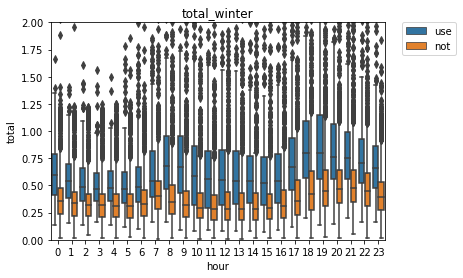

In [284]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

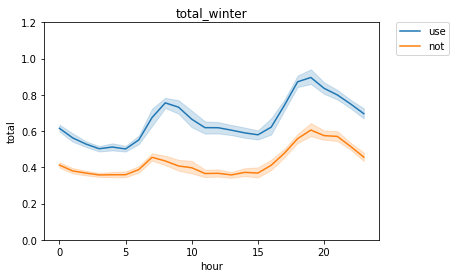

In [285]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

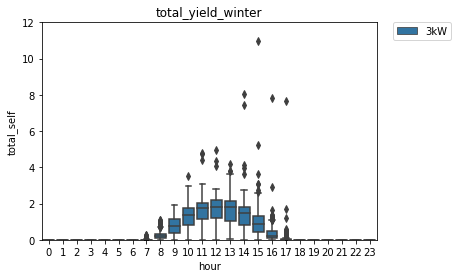

In [286]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

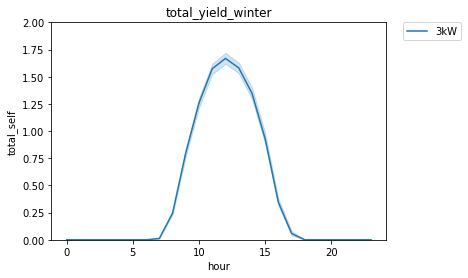

In [287]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

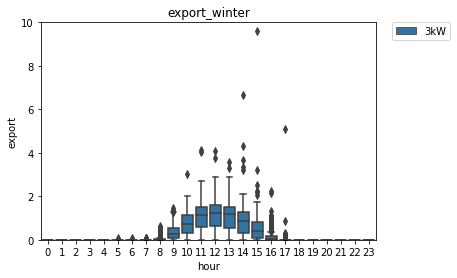

In [288]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

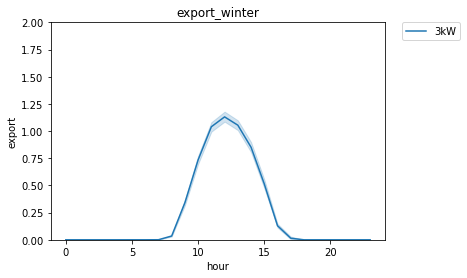

In [289]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

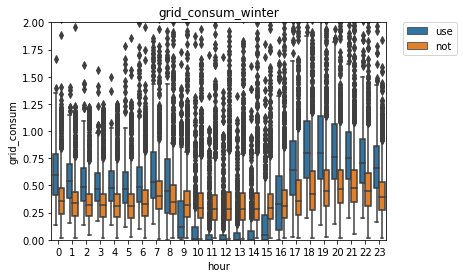

In [290]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

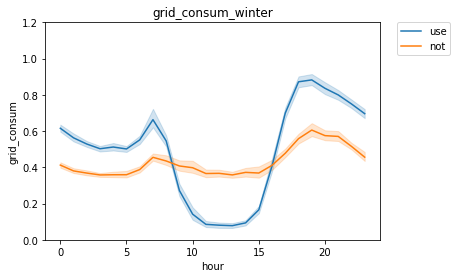

In [291]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

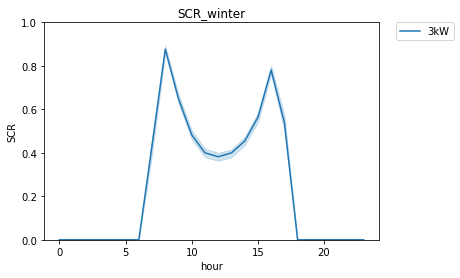

In [292]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_winter')
plt.show()

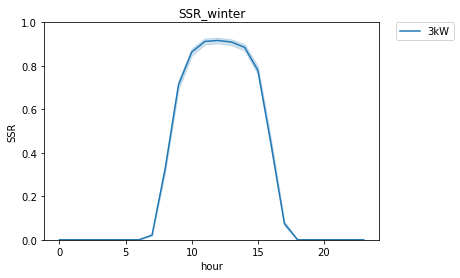

In [293]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_winter')
plt.show()

<hr>

## **<1년(total)>**

### 2021.05 ~ 2022.04

In [294]:
df_all_hour_year = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') |
                              (df_all_hour.ym == '2021/8') | (df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') |
                              (df_all_hour.ym == '2021/11') | (df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') |
                              (df_all_hour.ym == '2022/2') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [295]:
# 총 전력 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.355613  0.341862  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.346754  0.515099  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.340406  0.432850  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.345974  0.420417  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.350928  0.437561  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   2865.0  0.541612  0.298690  0.140015  0.320068  0.489990  0.699951   
     1   2862.0  0.499567  0.315556  0.139954  0.299988  0.449951  0.630127   
     2   2871.0  0.458393  0.225248  0.130005  0.289917  0.420166  0.589966   
     3   2863.0  0.439165  0.215650  0.100098  0.270020  0.409912  0.559967   
     4   2853.0  0.432534  0.223103  0.130005  0.260010  0.409912  0.559570   
     5   2852.0  0.435512  0.215522  0.119995  0.260010  0.400146  0.549805   
     6   2836.0  0.485590  0.330263  0.099976  0.270020  0.420044  0.596069   
     7   2832.0  0.588108  0.506909  0.109863  0.329956  0.489807  0.709961   
     8   2843.0  0.636464  0.440665  0.100037  0.379898  0.550049  0.780121   
     9   2847.0  0.573550  0.406183  0.080078  0.300049  0.489929  0.740112   
     10  2848.0  0.524529  0.424120  0.070312  0.260010  0.439972  0.679932   
     11  2833.0  0.528730  0.441918  0.050537  0.250244  0.430054  0.679810   
     12  2835.0  0.560432  0.447315  0.079834  0.270020  0.459839  0.710144   
     13  2834.0  0.552591  0.402549  0.060059  0.279968  0.460083  0.689941   
     14  2839.0  0.536843  0.403813  0.026428  0.270020  0.440063  0.669739   
     15  2847.0  0.536876  0.489831  0.070068  0.270020  0.440186  0.650055   
     16  2864.0  0.558035  0.512879  0.089844  0.289917  0.459961  0.670021   
     17  2860.0  0.634295  0.456611  0.109863  0.359985  0.529846  0.790283   
     18  2855.0  0.745964  0.435248  0.150146  0.439957  0.649902  0.930176   
     19  2859.0  0.797783  0.504138  0.129944  0.459961  0.660156  1.030014   
     20  2856.0  0.764702  0.448238  0.149902  0.459961  0.640137  0.979980   
     21  2848.0  0.729860  0.380862  0.149994  0.460205  0.640015  0.939941   
     22  2854.0  0.688746  0.381310  0.150146  0.429993  0.610107  0.860107   
     23  2854.0  0.614817  0.351978  0.140015  0.369995  0.550049  0.779953   

               max  
type 시간             
not  0   12.57006

In [296]:
# 총 전력 생산량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.001764  0.009467  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.039281  0.074039  0.0  0.000000  0.000000  0.050049   
         7   2832.0  0.184735  0.223253  0.0  0.010010  0.109863  0.289978   
         8   2843.0  0.522059  0.405585  0.0  0.189941  0.440186  0.770020   
         9   2847.0  0.968697  0.564786  0.0  0.500000  0.959961  1.409912   
         10  2848.0  1.314582  0.659293  0.0  0.800018  1.410034  1.839844   
         11  2833.0  1.518280  0.717223  0.0  0.959961  1.689941  2.060059   
         12  2835.0  1.588936  0.754363  0.0  1.030029  1.760010  2.160156   
         13  2834.0  1.512568  0.748922  0.0  0.950027  1.670044  2.079834   
         14  2839.0  1.327566  0.761777  0.0  0.750000  1.439941  1.839844   
         15  2847.0  0.997269  0.689136  0.0  0.489990  0.989990  1.439941   
         16  2864.0  0.570109  0.567150  0.0  0.170166  0.471802  0.889893   
         17  2860.0  0.221461  0.407217  0.0  0.010010  0.129883  0.350037   
         18  2855.0  0.044482  0.082321  0.0  0.000000  0.000000  0.069946   
         19  2859.0  0.003071  0.017049  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.449951  
         8    2.059998  
         9    3.270020  
         10   4.100037  
         11   6.339844  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16  11.000000  
         17  12.609985  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [297]:
# 총 전력 수출량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.000026  0.001239  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.003677  0.020578  0.0  0.000000  0.000000  0.000000   
         7   2832.0  0.043963  0.114523  0.0  0.000000  0.000000  0.029907   
         8   2843.0  0.208013  0.293540  0.0  0.000000  0.069946  0.320038   
         9   2847.0  0.558877  0.494810  0.0  0.100098  0.459961  0.909912   
         10  2848.0  0.884602  0.617020  0.0  0.330063  0.900024  1.359985   
         11  2833.0  1.071567  0.681228  0.0  0.469971  1.160034  1.590088   
         12  2835.0  1.119485  0.714917  0.0  0.500000  1.210083  1.675049   
         13  2834.0  1.048757  0.699974  0.0  0.430054  1.119934  1.599976   
         14  2839.0  0.887889  0.687098  0.0  0.299927  0.889954  1.379883   
         15  2847.0  0.601755  0.586262  0.0  0.119873  0.510010  0.970032   
         16  2864.0  0.272843  0.390469  0.0  0.000000  0.120056  0.430054   
         17  2860.0  0.061230  0.218873  0.0  0.000000  0.000000  0.040039   
         18  2855.0  0.001732  0.011582  0.0  0.000000  0.000000  0.000000   
         19  2859.0  0.000062  0.002302  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.065430  
         6   0.400024  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  9.610107  
         16  6.940002  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [298]:
# 총 그리드 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.355613  0.341862  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.346754  0.515099  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.340406  0.432850  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.345974  0.420417  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.350928  0.437561  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   2865.0  0.541757  0.298817  0.140015  0.320068  0.489990  0.699951   
     1   2862.0  0.498745  0.297407  0.139954  0.299988  0.449951  0.630127   
     2   2871.0  0.458440  0.225228  0.130005  0.289917  0.420166  0.589966   
     3   2863.0  0.439188  0.215624  0.100098  0.270020  0.409912  0.559967   
     4   2853.0  0.432556  0.223078  0.130005  0.260010  0.409912  0.559570   
     5   2852.0  0.433774  0.215460  0.119995  0.260010  0.400024  0.549805   
     6   2836.0  0.449986  0.338480  0.010010  0.239990  0.390076  0.569977   
     7   2832.0  0.447337  0.525273  0.000000  0.170044  0.349976  0.579956   
     8   2843.0  0.322418  0.437428  0.000000  0.040039  0.199982  0.469971   
     9   2847.0  0.163729  0.326510  0.000000  0.000000  0.029999  0.190247   
     10  2848.0  0.094550  0.294369  0.000000  0.000000  0.000000  0.059998   
     11  2833.0  0.082017  0.263611  0.000000  0.000000  0.000000  0.039917   
     12  2835.0  0.090981  0.268970  0.000000  0.000000  0.000000  0.049927   
     13  2834.0  0.088780  0.218988  0.000000  0.000000  0.000000  0.059814   
     14  2839.0  0.097166  0.230556  0.000000  0.000000  0.000000  0.070007   
     15  2847.0  0.141362  0.316481  0.000000  0.000000  0.020020  0.160156   
     16  2864.0  0.260769  0.383255  0.000000  0.010010  0.114990  0.392578   
     17  2860.0  0.474064  0.417492  0.000000  0.160034  0.380005  0.689941   
     18  2855.0  0.703221  0.441578  0.029968  0.390015  0.610107  0.904907   
     19  2859.0  0.791474  0.470626  0.129944  0.459961  0.660034  1.029785   
     20  2856.0  0.764748  0.448219  0.149902  0.459961  0.640137  0.979980   
     21  2848.0  0.730141  0.381135  0.149994  0.460205  0.640015  0.939941   
     22  2854.0  0.688626  0.379321  0.150146  0.429993  0.610107  0.860107   
     23  2854.0  0.615200  0.353809  0.140015  0.369995  0.550049  0.779953   

               max  
type 시간             
not  0   12.57006

In [299]:
# SCR(자가소비율)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.102326  0.303049  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.440904  0.485043  0.0  0.000000  0.000000  1.000000   
         7   2832.0  0.726336  0.379279  0.0  0.580983  0.949939  1.000000   
         8   2843.0  0.726390  0.276127  0.0  0.513162  0.805763  1.000000   
         9   2847.0  0.535568  0.294841  0.0  0.273293  0.494500  0.800918   
         10  2848.0  0.422325  0.285325  0.0  0.184347  0.339413  0.608553   
         11  2833.0  0.380241  0.276202  0.0  0.155953  0.293896  0.526350   
         12  2835.0  0.379939  0.271576  0.0  0.161512  0.298137  0.521158   
         13  2834.0  0.395011  0.272635  0.0  0.177542  0.317489  0.551665   
         14  2839.0  0.431425  0.282471  0.0  0.197888  0.357597  0.613884   
         15  2847.0  0.518080  0.296297  0.0  0.258130  0.465178  0.772326   
         16  2864.0  0.675776  0.294937  0.0  0.430403  0.714628  1.000000   
         17  2860.0  0.702338  0.383706  0.0  0.448100  0.916815  1.000000   
         18  2855.0  0.466590  0.491819  0.0  0.000000  0.000000  1.000000   
         19  2859.0  0.137876  0.344516  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

             max  
설비용량(kW) 시간       
3kW      0   0.0  
         1   0.0  
         2   0.0  
         3   0.0  
         4   0.0  
         5   1.0  
         6   1.0  
         7   1.0  
         8   1.0  
         9   1.0  
         10  1.0  
         11  1.0  
         12  1.0  
         13  1.0  
         14  1.0  
         15  1.0  
         16  1.0  
         17  1.0  
         18  1.0  
         19  1.0  
         20  0.0  
         21  0.0  
         22  0.0  
         23  0.0

In [300]:
# SSR(자가공급률)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.004687  0.018622  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.097816  0.174925  0.0  0.000000  0.000000  0.115493   
         7   2832.0  0.311208  0.315211  0.0  0.024358  0.200000  0.559406   
         8   2843.0  0.583982  0.326516  0.0  0.297114  0.615493  0.907364   
         9   2847.0  0.796865  0.277888  0.0  0.686774  0.939483  1.000000   
         10  2848.0  0.882110  0.228364  0.0  0.894900  1.000000  1.000000   
         11  2833.0  0.904336  0.205733  0.0  0.935338  1.000000  1.000000   
         12  2835.0  0.900826  0.202226  0.0  0.913994  1.000000  1.000000   
         13  2834.0  0.894774  0.204183  0.0  0.896934  1.000000  1.000000   
         14  2839.0  0.877952  0.221687  0.0  0.864392  1.000000  1.000000   
         15  2847.0  0.815696  0.260649  0.0  0.714370  0.956476  1.000000   
         16  2864.0  0.631765  0.338286  0.0  0.324757  0.722095  0.959971   
         17  2860.0  0.327460  0.327630  0.0  0.022752  0.207571  0.591178   
         18  2855.0  0.085487  0.152577  0.0  0.000000  0.000000  0.109891   
         19  2859.0  0.005396  0.022327  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.975588  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.917613  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

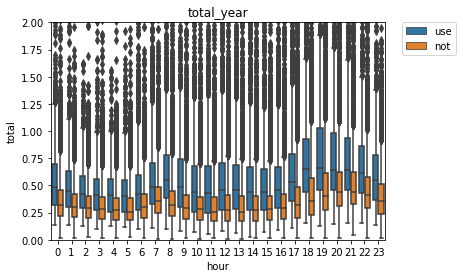

In [301]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

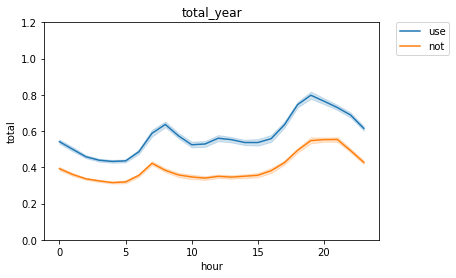

In [302]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

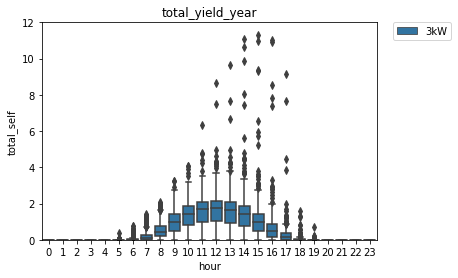

In [303]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

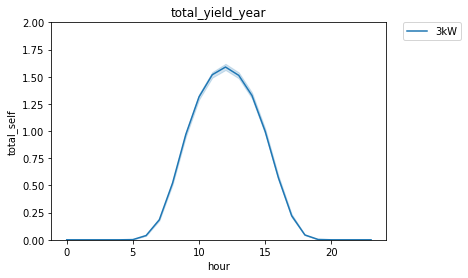

In [304]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

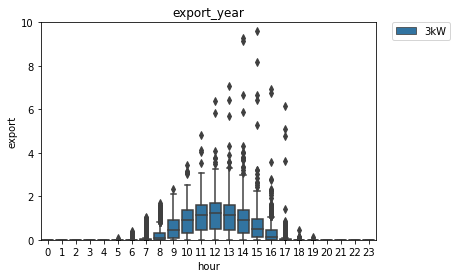

In [305]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

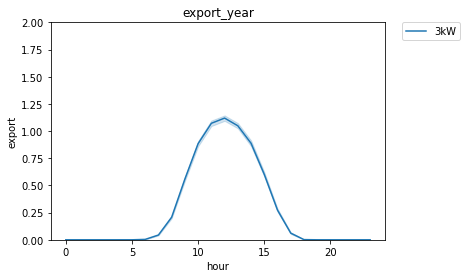

In [306]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

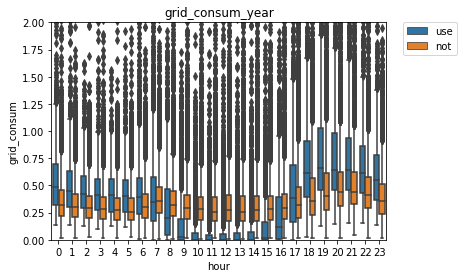

In [307]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

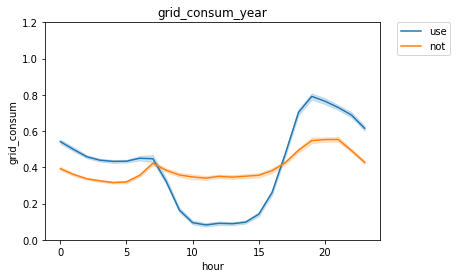

In [308]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

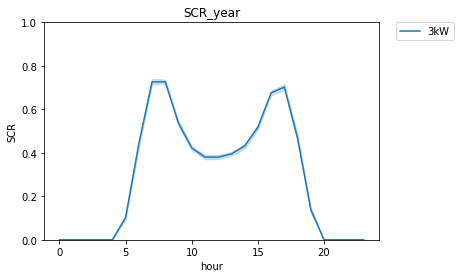

In [309]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_year')
plt.show()

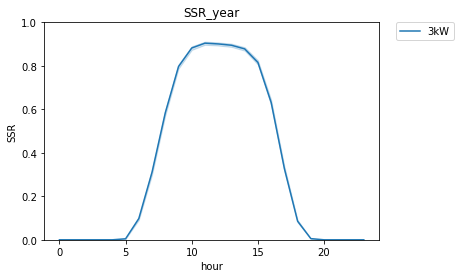

In [310]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_year')
plt.show()